In [1]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib.pyplot as plt
#matplotlib.use("Agg")
import import_ipynb
# import the necessary packages
# pip install --upgrade import-ipynb
#from imagesearch.learning_rate_schedulers import StepDecay
from imagesearch.hactivitynet import HactivityNet
from imagesearch.LearningRateSchedulers import PolynomialDecay
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import SGD
#from keras.datasets import fashion_mnist
from keras.utils import np_utils
from tensorflow.keras import backend as K
from imutils import build_montages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm
import pickle

importing Jupyter notebook from C:\Users\abssa\Thesis\Proposed_Model\imagesearch\hactivitynet.ipynb


Using TensorFlow backend.


importing Jupyter notebook from C:\Users\abssa\Thesis\Proposed_Model\imagesearch\LearningRateSchedulers.ipynb


In [2]:
# initialize the number of epochs to train for, base learning rate,
# and batch size
NUM_EPOCHS = 30
INIT_LR = 0.01
BS = 32

## load pickledata from disk

trainX = pickle.loads(open("trainX.pickle", "rb").read())
trainY = pickle.loads(open("trainY.pickle", "rb").read())
testX = pickle.loads(open("testX.pickle", "rb").read())
testY = pickle.loads(open("testY.pickle", "rb").read())

# if we are using "channels first" ordering, then reshape the design
# matrix such that the matrix is:
# 	num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	trainX = trainX.reshape((trainX.shape[0], 1, 48, 48))
	testX = testX.reshape((testX.shape[0], 1, 48, 48))
 
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainX = trainX.reshape((trainX.shape[0], 48, 48, 1))
	testX = testX.reshape((testX.shape[0], 48, 48, 1))

In [3]:
# store the number of epochs to train for in a convenience variable,
# then initialize the list of callbacks and learning rate scheduler
# to be used
from keras.callbacks import LearningRateScheduler
epochs = 30 #args["epochs"]
callbacks = []
schedule = 'poly' #None
 
# initialize the decay for the optimizer
decay = 0.0

# check to see if step-based learning rate decay should be used
if schedule == "step":
	print("[INFO] using 'step-based' learning rate decay...")
	schedule = StepDecay(initAlpha=1e-1, factor=0.25, dropEvery=1)
 
# check to see if linear learning rate decay should should be used
elif schedule == "linear":
	print("[INFO] using 'linear' learning rate decay...")
	schedule = PolynomialDecay(maxEpochs=epochs, initAlpha=1e-1, power=1)
 
# check to see if a polynomial learning rate decay should be used
elif schedule == "poly":
	print("[INFO] using 'polynomial' learning rate decay...")
	schedule = PolynomialDecay(maxEpochs=epochs, initAlpha=1e-1, power=5)
 
# if the learning rate schedule is not empty, add it to the list of
# callbacks
if schedule is not None:
	callbacks = [LearningRateScheduler(schedule)]

[INFO] using 'polynomial' learning rate decay...


In [4]:
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
 
# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(trainY, 7)
testY = np_utils.to_categorical(testY, 7)
 
# initialize the label names
labelNames = ["Boxing", "HandClapping", "HandWaving", "Jogging", "Running", "Standig", "Walking"]


In [5]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=decay)
model = HactivityNet.build(width=48, height=48, depth=1, classes=7)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])
 
# train the network
print("[INFO] training model...")
H = model.fit(trainX, trainY,
	validation_data=(testX, testY),
	batch_size=BS, epochs=NUM_EPOCHS, callbacks=callbacks, verbose=1)

[INFO] compiling model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[INFO] training model...
Instructions for updating:
Use tf.cast instead.
Train on 45952 samples, validate on 11489 samples
Epoch 1/30


 6528/45952 [===>..........................] - ETA: 1:31:21 - loss: 2.5992 - acc: 0.21 - ETA: 50:15 - loss: 2.8934 - acc: 0.2969 - ETA: 36:31 - loss: 3.0036 - acc: 0.26 - ETA: 29:45 - loss: 2.9575 - acc: 0.28 - ETA: 25:37 - loss: 3.0793 - acc: 0.30 - ETA: 22:51 - loss: 3.3541 - acc: 0.33 - ETA: 20:52 - loss: 3.4999 - acc: 0.33 - ETA: 19:23 - loss: 3.4311 - acc: 0.33 - ETA: 18:14 - loss: 3.6101 - acc: 0.33 - ETA: 17:19 - loss: 3.7945 - acc: 0.33 - ETA: 16:33 - loss: 3.9136 - acc: 0.33 - ETA: 15:53 - loss: 3.9722 - acc: 0.34 - ETA: 15:21 - loss: 4.2298 - acc: 0.33 - ETA: 14:57 - loss: 4.1797 - acc: 0.34 - ETA: 14:33 - loss: 4.2862 - acc: 0.34 - ETA: 14:12 - loss: 4.4266 - acc: 0.34 - ETA: 13:53 - loss: 4.5449 - acc: 0.34 - ETA: 13:37 - loss: 4.5115 - acc: 0.35 - ETA: 13:21 - loss: 4.5590 - acc: 0.35 - ETA: 13:08 - loss: 4.7063 - acc: 0.35 - ETA: 12:56 - loss: 4.8623 - acc: 0.35 - ETA: 12:45 - loss: 4.9050 - acc: 0.35 - ETA: 12:36 - loss: 5.0288 - acc: 0.35 - ETA: 12:29 - loss: 5.1391 - a

19584/45952 [===========>..................] - ETA: 6:45 - loss: 3.9084 - acc: 0.479 - ETA: 6:44 - loss: 3.9018 - acc: 0.479 - ETA: 6:44 - loss: 3.8957 - acc: 0.480 - ETA: 6:43 - loss: 3.8930 - acc: 0.480 - ETA: 6:43 - loss: 3.8906 - acc: 0.480 - ETA: 6:43 - loss: 3.8877 - acc: 0.480 - ETA: 6:42 - loss: 3.8844 - acc: 0.480 - ETA: 6:42 - loss: 3.8812 - acc: 0.480 - ETA: 6:42 - loss: 3.8782 - acc: 0.480 - ETA: 6:41 - loss: 3.8731 - acc: 0.480 - ETA: 6:41 - loss: 3.8701 - acc: 0.481 - ETA: 6:41 - loss: 3.8652 - acc: 0.481 - ETA: 6:40 - loss: 3.8597 - acc: 0.481 - ETA: 6:40 - loss: 3.8564 - acc: 0.481 - ETA: 6:39 - loss: 3.8517 - acc: 0.481 - ETA: 6:39 - loss: 3.8485 - acc: 0.481 - ETA: 6:38 - loss: 3.8440 - acc: 0.481 - ETA: 6:38 - loss: 3.8432 - acc: 0.481 - ETA: 6:38 - loss: 3.8372 - acc: 0.481 - ETA: 6:37 - loss: 3.8316 - acc: 0.482 - ETA: 6:37 - loss: 3.8268 - acc: 0.482 - ETA: 6:36 - loss: 3.8230 - acc: 0.482 - ETA: 6:36 - loss: 3.8183 - acc: 0.482 - ETA: 6:36 - loss: 3.8156 - acc: 0

26112/45952 [================>.............] - ETA: 5:22 - loss: 3.1234 - acc: 0.513 - ETA: 5:22 - loss: 3.1192 - acc: 0.513 - ETA: 5:21 - loss: 3.1158 - acc: 0.513 - ETA: 5:21 - loss: 3.1123 - acc: 0.514 - ETA: 5:21 - loss: 3.1100 - acc: 0.514 - ETA: 5:20 - loss: 3.1070 - acc: 0.514 - ETA: 5:20 - loss: 3.1042 - acc: 0.514 - ETA: 5:20 - loss: 3.1021 - acc: 0.514 - ETA: 5:19 - loss: 3.0984 - acc: 0.514 - ETA: 5:19 - loss: 3.0952 - acc: 0.514 - ETA: 5:19 - loss: 3.0915 - acc: 0.515 - ETA: 5:18 - loss: 3.0882 - acc: 0.515 - ETA: 5:18 - loss: 3.0854 - acc: 0.515 - ETA: 5:17 - loss: 3.0831 - acc: 0.515 - ETA: 5:17 - loss: 3.0797 - acc: 0.515 - ETA: 5:17 - loss: 3.0766 - acc: 0.515 - ETA: 5:16 - loss: 3.0725 - acc: 0.516 - ETA: 5:16 - loss: 3.0707 - acc: 0.515 - ETA: 5:15 - loss: 3.0678 - acc: 0.515 - ETA: 5:15 - loss: 3.0648 - acc: 0.515 - ETA: 5:15 - loss: 3.0621 - acc: 0.515 - ETA: 5:14 - loss: 3.0593 - acc: 0.515 - ETA: 5:14 - loss: 3.0563 - acc: 0.516 - ETA: 5:13 - loss: 3.0534 - acc: 0

32640/45952 [====================>.........] - ETA: 4:03 - loss: 2.5933 - acc: 0.540 - ETA: 4:02 - loss: 2.5911 - acc: 0.540 - ETA: 4:02 - loss: 2.5885 - acc: 0.541 - ETA: 4:01 - loss: 2.5862 - acc: 0.541 - ETA: 4:01 - loss: 2.5844 - acc: 0.541 - ETA: 4:01 - loss: 2.5825 - acc: 0.541 - ETA: 4:00 - loss: 2.5806 - acc: 0.541 - ETA: 4:00 - loss: 2.5784 - acc: 0.541 - ETA: 3:59 - loss: 2.5760 - acc: 0.541 - ETA: 3:59 - loss: 2.5742 - acc: 0.541 - ETA: 3:59 - loss: 2.5718 - acc: 0.542 - ETA: 3:58 - loss: 2.5693 - acc: 0.542 - ETA: 3:58 - loss: 2.5669 - acc: 0.542 - ETA: 3:57 - loss: 2.5653 - acc: 0.542 - ETA: 3:57 - loss: 2.5634 - acc: 0.542 - ETA: 3:57 - loss: 2.5612 - acc: 0.543 - ETA: 3:56 - loss: 2.5588 - acc: 0.543 - ETA: 3:56 - loss: 2.5570 - acc: 0.543 - ETA: 3:55 - loss: 2.5552 - acc: 0.543 - ETA: 3:55 - loss: 2.5536 - acc: 0.543 - ETA: 3:54 - loss: 2.5516 - acc: 0.543 - ETA: 3:54 - loss: 2.5494 - acc: 0.543 - ETA: 3:54 - loss: 2.5475 - acc: 0.544 - ETA: 3:53 - loss: 2.5456 - acc: 0

39168/45952 [========================>.....] - ETA: 2:42 - loss: 2.2377 - acc: 0.564 - ETA: 2:41 - loss: 2.2362 - acc: 0.565 - ETA: 2:41 - loss: 2.2344 - acc: 0.565 - ETA: 2:41 - loss: 2.2330 - acc: 0.565 - ETA: 2:40 - loss: 2.2315 - acc: 0.565 - ETA: 2:40 - loss: 2.2301 - acc: 0.565 - ETA: 2:39 - loss: 2.2287 - acc: 0.565 - ETA: 2:39 - loss: 2.2272 - acc: 0.565 - ETA: 2:39 - loss: 2.2263 - acc: 0.566 - ETA: 2:38 - loss: 2.2252 - acc: 0.566 - ETA: 2:38 - loss: 2.2235 - acc: 0.566 - ETA: 2:37 - loss: 2.2221 - acc: 0.566 - ETA: 2:37 - loss: 2.2203 - acc: 0.566 - ETA: 2:37 - loss: 2.2190 - acc: 0.566 - ETA: 2:36 - loss: 2.2178 - acc: 0.566 - ETA: 2:36 - loss: 2.2165 - acc: 0.566 - ETA: 2:35 - loss: 2.2147 - acc: 0.567 - ETA: 2:35 - loss: 2.2131 - acc: 0.567 - ETA: 2:35 - loss: 2.2118 - acc: 0.567 - ETA: 2:34 - loss: 2.2101 - acc: 0.567 - ETA: 2:34 - loss: 2.2087 - acc: 0.568 - ETA: 2:34 - loss: 2.2073 - acc: 0.568 - ETA: 2:33 - loss: 2.2059 - acc: 0.568 - ETA: 2:33 - loss: 2.2041 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 1.9867 - acc: 0.588 - ETA: 1:21 - loss: 1.9855 - acc: 0.588 - ETA: 1:21 - loss: 1.9846 - acc: 0.588 - ETA: 1:21 - loss: 1.9835 - acc: 0.588 - ETA: 1:20 - loss: 1.9822 - acc: 0.589 - ETA: 1:20 - loss: 1.9811 - acc: 0.589 - ETA: 1:19 - loss: 1.9799 - acc: 0.589 - ETA: 1:19 - loss: 1.9788 - acc: 0.589 - ETA: 1:19 - loss: 1.9777 - acc: 0.589 - ETA: 1:18 - loss: 1.9764 - acc: 0.589 - ETA: 1:18 - loss: 1.9752 - acc: 0.589 - ETA: 1:17 - loss: 1.9743 - acc: 0.589 - ETA: 1:17 - loss: 1.9730 - acc: 0.590 - ETA: 1:17 - loss: 1.9718 - acc: 0.590 - ETA: 1:16 - loss: 1.9712 - acc: 0.590 - ETA: 1:16 - loss: 1.9704 - acc: 0.590 - ETA: 1:16 - loss: 1.9694 - acc: 0.590 - ETA: 1:15 - loss: 1.9684 - acc: 0.590 - ETA: 1:15 - loss: 1.9675 - acc: 0.590 - ETA: 1:14 - loss: 1.9664 - acc: 0.590 - ETA: 1:14 - loss: 1.9651 - acc: 0.590 - ETA: 1:14 - loss: 1.9640 - acc: 0.590 - ETA: 1:13 - loss: 1.9633 - acc: 0.590 - ETA: 1:13 - loss: 1.9623 - acc: 0

Epoch 2/30


 6528/45952 [===>..........................] - ETA: 9:45 - loss: 0.8889 - acc: 0.593 - ETA: 9:27 - loss: 0.7479 - acc: 0.671 - ETA: 9:20 - loss: 0.7127 - acc: 0.666 - ETA: 9:12 - loss: 0.6745 - acc: 0.687 - ETA: 9:10 - loss: 0.6787 - acc: 0.712 - ETA: 9:06 - loss: 0.7007 - acc: 0.718 - ETA: 9:06 - loss: 0.7384 - acc: 0.714 - ETA: 9:03 - loss: 0.7086 - acc: 0.726 - ETA: 9:05 - loss: 0.6765 - acc: 0.732 - ETA: 9:03 - loss: 0.7137 - acc: 0.718 - ETA: 9:03 - loss: 0.6879 - acc: 0.724 - ETA: 9:02 - loss: 0.6946 - acc: 0.716 - ETA: 9:02 - loss: 0.6831 - acc: 0.716 - ETA: 9:02 - loss: 0.6734 - acc: 0.721 - ETA: 9:00 - loss: 0.6812 - acc: 0.725 - ETA: 9:00 - loss: 0.6923 - acc: 0.726 - ETA: 8:59 - loss: 0.6744 - acc: 0.729 - ETA: 8:59 - loss: 0.6911 - acc: 0.725 - ETA: 8:58 - loss: 0.6829 - acc: 0.728 - ETA: 8:58 - loss: 0.6746 - acc: 0.731 - ETA: 8:58 - loss: 0.6841 - acc: 0.724 - ETA: 8:58 - loss: 0.6816 - acc: 0.721 - ETA: 8:57 - loss: 0.6782 - acc: 0.722 - ETA: 8:56 - loss: 0.6888 - acc: 0

19584/45952 [===========>..................] - ETA: 6:35 - loss: 0.6113 - acc: 0.745 - ETA: 6:34 - loss: 0.6112 - acc: 0.745 - ETA: 6:34 - loss: 0.6114 - acc: 0.744 - ETA: 6:33 - loss: 0.6119 - acc: 0.744 - ETA: 6:33 - loss: 0.6120 - acc: 0.744 - ETA: 6:33 - loss: 0.6111 - acc: 0.745 - ETA: 6:32 - loss: 0.6112 - acc: 0.745 - ETA: 6:32 - loss: 0.6117 - acc: 0.744 - ETA: 6:31 - loss: 0.6118 - acc: 0.744 - ETA: 6:31 - loss: 0.6112 - acc: 0.745 - ETA: 6:31 - loss: 0.6110 - acc: 0.745 - ETA: 6:30 - loss: 0.6118 - acc: 0.744 - ETA: 6:30 - loss: 0.6117 - acc: 0.744 - ETA: 6:30 - loss: 0.6113 - acc: 0.744 - ETA: 6:29 - loss: 0.6112 - acc: 0.744 - ETA: 6:29 - loss: 0.6118 - acc: 0.744 - ETA: 6:29 - loss: 0.6112 - acc: 0.744 - ETA: 6:28 - loss: 0.6109 - acc: 0.745 - ETA: 6:28 - loss: 0.6105 - acc: 0.745 - ETA: 6:27 - loss: 0.6103 - acc: 0.744 - ETA: 6:27 - loss: 0.6105 - acc: 0.745 - ETA: 6:27 - loss: 0.6106 - acc: 0.744 - ETA: 6:26 - loss: 0.6103 - acc: 0.744 - ETA: 6:26 - loss: 0.6100 - acc: 0

26112/45952 [================>.............] - ETA: 5:17 - loss: 0.6031 - acc: 0.745 - ETA: 5:17 - loss: 0.6029 - acc: 0.746 - ETA: 5:16 - loss: 0.6027 - acc: 0.745 - ETA: 5:16 - loss: 0.6024 - acc: 0.746 - ETA: 5:16 - loss: 0.6025 - acc: 0.746 - ETA: 5:15 - loss: 0.6028 - acc: 0.746 - ETA: 5:15 - loss: 0.6030 - acc: 0.746 - ETA: 5:14 - loss: 0.6027 - acc: 0.746 - ETA: 5:14 - loss: 0.6031 - acc: 0.746 - ETA: 5:14 - loss: 0.6031 - acc: 0.746 - ETA: 5:13 - loss: 0.6027 - acc: 0.746 - ETA: 5:13 - loss: 0.6023 - acc: 0.746 - ETA: 5:12 - loss: 0.6024 - acc: 0.746 - ETA: 5:12 - loss: 0.6024 - acc: 0.746 - ETA: 5:12 - loss: 0.6018 - acc: 0.746 - ETA: 5:11 - loss: 0.6019 - acc: 0.746 - ETA: 5:11 - loss: 0.6022 - acc: 0.746 - ETA: 5:10 - loss: 0.6022 - acc: 0.746 - ETA: 5:10 - loss: 0.6021 - acc: 0.746 - ETA: 5:10 - loss: 0.6016 - acc: 0.746 - ETA: 5:09 - loss: 0.6020 - acc: 0.746 - ETA: 5:09 - loss: 0.6016 - acc: 0.746 - ETA: 5:09 - loss: 0.6022 - acc: 0.746 - ETA: 5:08 - loss: 0.6023 - acc: 0

32640/45952 [====================>.........] - ETA: 4:00 - loss: 0.5885 - acc: 0.751 - ETA: 3:59 - loss: 0.5885 - acc: 0.751 - ETA: 3:59 - loss: 0.5882 - acc: 0.751 - ETA: 3:59 - loss: 0.5881 - acc: 0.751 - ETA: 3:58 - loss: 0.5881 - acc: 0.751 - ETA: 3:58 - loss: 0.5881 - acc: 0.751 - ETA: 3:57 - loss: 0.5881 - acc: 0.751 - ETA: 3:57 - loss: 0.5882 - acc: 0.751 - ETA: 3:57 - loss: 0.5880 - acc: 0.751 - ETA: 3:56 - loss: 0.5877 - acc: 0.752 - ETA: 3:56 - loss: 0.5876 - acc: 0.752 - ETA: 3:55 - loss: 0.5874 - acc: 0.752 - ETA: 3:55 - loss: 0.5873 - acc: 0.752 - ETA: 3:55 - loss: 0.5871 - acc: 0.752 - ETA: 3:54 - loss: 0.5870 - acc: 0.752 - ETA: 3:54 - loss: 0.5865 - acc: 0.752 - ETA: 3:54 - loss: 0.5864 - acc: 0.752 - ETA: 3:53 - loss: 0.5861 - acc: 0.752 - ETA: 3:53 - loss: 0.5862 - acc: 0.752 - ETA: 3:53 - loss: 0.5869 - acc: 0.752 - ETA: 3:52 - loss: 0.5868 - acc: 0.752 - ETA: 3:52 - loss: 0.5866 - acc: 0.752 - ETA: 3:52 - loss: 0.5866 - acc: 0.752 - ETA: 3:51 - loss: 0.5864 - acc: 0

39168/45952 [========================>.....] - ETA: 2:41 - loss: 0.5719 - acc: 0.758 - ETA: 2:40 - loss: 0.5718 - acc: 0.758 - ETA: 2:40 - loss: 0.5718 - acc: 0.758 - ETA: 2:39 - loss: 0.5717 - acc: 0.758 - ETA: 2:39 - loss: 0.5719 - acc: 0.758 - ETA: 2:39 - loss: 0.5719 - acc: 0.758 - ETA: 2:38 - loss: 0.5718 - acc: 0.758 - ETA: 2:38 - loss: 0.5719 - acc: 0.758 - ETA: 2:37 - loss: 0.5717 - acc: 0.758 - ETA: 2:37 - loss: 0.5716 - acc: 0.758 - ETA: 2:37 - loss: 0.5715 - acc: 0.758 - ETA: 2:36 - loss: 0.5717 - acc: 0.758 - ETA: 2:36 - loss: 0.5716 - acc: 0.758 - ETA: 2:35 - loss: 0.5716 - acc: 0.758 - ETA: 2:35 - loss: 0.5719 - acc: 0.758 - ETA: 2:35 - loss: 0.5723 - acc: 0.758 - ETA: 2:34 - loss: 0.5723 - acc: 0.758 - ETA: 2:34 - loss: 0.5721 - acc: 0.758 - ETA: 2:34 - loss: 0.5719 - acc: 0.758 - ETA: 2:33 - loss: 0.5717 - acc: 0.758 - ETA: 2:33 - loss: 0.5715 - acc: 0.758 - ETA: 2:32 - loss: 0.5717 - acc: 0.758 - ETA: 2:32 - loss: 0.5716 - acc: 0.758 - ETA: 2:32 - loss: 0.5715 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.5585 - acc: 0.763 - ETA: 1:21 - loss: 0.5585 - acc: 0.763 - ETA: 1:21 - loss: 0.5584 - acc: 0.763 - ETA: 1:20 - loss: 0.5585 - acc: 0.763 - ETA: 1:20 - loss: 0.5585 - acc: 0.763 - ETA: 1:19 - loss: 0.5584 - acc: 0.763 - ETA: 1:19 - loss: 0.5584 - acc: 0.764 - ETA: 1:19 - loss: 0.5584 - acc: 0.763 - ETA: 1:18 - loss: 0.5583 - acc: 0.763 - ETA: 1:18 - loss: 0.5582 - acc: 0.764 - ETA: 1:17 - loss: 0.5581 - acc: 0.764 - ETA: 1:17 - loss: 0.5581 - acc: 0.764 - ETA: 1:17 - loss: 0.5580 - acc: 0.764 - ETA: 1:16 - loss: 0.5579 - acc: 0.764 - ETA: 1:16 - loss: 0.5578 - acc: 0.764 - ETA: 1:16 - loss: 0.5580 - acc: 0.764 - ETA: 1:15 - loss: 0.5580 - acc: 0.764 - ETA: 1:15 - loss: 0.5584 - acc: 0.764 - ETA: 1:14 - loss: 0.5595 - acc: 0.763 - ETA: 1:14 - loss: 0.5601 - acc: 0.763 - ETA: 1:14 - loss: 0.5618 - acc: 0.763 - ETA: 1:13 - loss: 0.5633 - acc: 0.762 - ETA: 1:13 - loss: 0.5651 - acc: 0.762 - ETA: 1:12 - loss: 0.5666 - acc: 0

Epoch 3/30


 6528/45952 [===>..........................] - ETA: 9:53 - loss: 0.7645 - acc: 0.656 - ETA: 9:32 - loss: 0.9682 - acc: 0.593 - ETA: 9:24 - loss: 0.9731 - acc: 0.562 - ETA: 9:20 - loss: 0.9504 - acc: 0.562 - ETA: 9:13 - loss: 0.8741 - acc: 0.593 - ETA: 9:12 - loss: 0.8543 - acc: 0.604 - ETA: 9:13 - loss: 0.8297 - acc: 0.616 - ETA: 9:10 - loss: 0.8744 - acc: 0.613 - ETA: 9:09 - loss: 0.8985 - acc: 0.621 - ETA: 9:09 - loss: 0.9006 - acc: 0.628 - ETA: 9:08 - loss: 0.8973 - acc: 0.622 - ETA: 9:07 - loss: 0.9073 - acc: 0.619 - ETA: 9:07 - loss: 0.9276 - acc: 0.610 - ETA: 9:10 - loss: 0.9174 - acc: 0.613 - ETA: 9:13 - loss: 0.9189 - acc: 0.618 - ETA: 9:14 - loss: 0.9162 - acc: 0.615 - ETA: 9:16 - loss: 0.9103 - acc: 0.619 - ETA: 9:15 - loss: 0.9148 - acc: 0.619 - ETA: 9:15 - loss: 0.9107 - acc: 0.616 - ETA: 9:15 - loss: 0.8998 - acc: 0.618 - ETA: 9:15 - loss: 0.8942 - acc: 0.622 - ETA: 9:14 - loss: 0.8952 - acc: 0.619 - ETA: 9:13 - loss: 0.8931 - acc: 0.620 - ETA: 9:12 - loss: 0.8866 - acc: 0

19584/45952 [===========>..................] - ETA: 6:34 - loss: 0.8066 - acc: 0.656 - ETA: 6:33 - loss: 0.8058 - acc: 0.657 - ETA: 6:33 - loss: 0.8055 - acc: 0.657 - ETA: 6:33 - loss: 0.8056 - acc: 0.657 - ETA: 6:32 - loss: 0.8057 - acc: 0.657 - ETA: 6:32 - loss: 0.8055 - acc: 0.657 - ETA: 6:31 - loss: 0.8048 - acc: 0.657 - ETA: 6:31 - loss: 0.8050 - acc: 0.657 - ETA: 6:31 - loss: 0.8052 - acc: 0.657 - ETA: 6:30 - loss: 0.8051 - acc: 0.657 - ETA: 6:30 - loss: 0.8046 - acc: 0.657 - ETA: 6:29 - loss: 0.8048 - acc: 0.657 - ETA: 6:29 - loss: 0.8051 - acc: 0.656 - ETA: 6:29 - loss: 0.8046 - acc: 0.657 - ETA: 6:28 - loss: 0.8046 - acc: 0.657 - ETA: 6:28 - loss: 0.8042 - acc: 0.657 - ETA: 6:27 - loss: 0.8044 - acc: 0.656 - ETA: 6:27 - loss: 0.8039 - acc: 0.657 - ETA: 6:27 - loss: 0.8041 - acc: 0.657 - ETA: 6:26 - loss: 0.8038 - acc: 0.657 - ETA: 6:26 - loss: 0.8044 - acc: 0.657 - ETA: 6:25 - loss: 0.8044 - acc: 0.657 - ETA: 6:25 - loss: 0.8047 - acc: 0.656 - ETA: 6:25 - loss: 0.8037 - acc: 0

26112/45952 [================>.............] - ETA: 5:15 - loss: 0.7627 - acc: 0.674 - ETA: 5:15 - loss: 0.7622 - acc: 0.674 - ETA: 5:15 - loss: 0.7616 - acc: 0.674 - ETA: 5:14 - loss: 0.7611 - acc: 0.675 - ETA: 5:14 - loss: 0.7612 - acc: 0.675 - ETA: 5:13 - loss: 0.7618 - acc: 0.674 - ETA: 5:13 - loss: 0.7617 - acc: 0.675 - ETA: 5:13 - loss: 0.7613 - acc: 0.675 - ETA: 5:12 - loss: 0.7607 - acc: 0.675 - ETA: 5:12 - loss: 0.7602 - acc: 0.675 - ETA: 5:11 - loss: 0.7599 - acc: 0.675 - ETA: 5:11 - loss: 0.7598 - acc: 0.676 - ETA: 5:11 - loss: 0.7596 - acc: 0.676 - ETA: 5:10 - loss: 0.7594 - acc: 0.676 - ETA: 5:10 - loss: 0.7594 - acc: 0.676 - ETA: 5:10 - loss: 0.7599 - acc: 0.675 - ETA: 5:09 - loss: 0.7599 - acc: 0.675 - ETA: 5:09 - loss: 0.7597 - acc: 0.675 - ETA: 5:08 - loss: 0.7593 - acc: 0.676 - ETA: 5:08 - loss: 0.7590 - acc: 0.676 - ETA: 5:08 - loss: 0.7587 - acc: 0.676 - ETA: 5:07 - loss: 0.7585 - acc: 0.676 - ETA: 5:07 - loss: 0.7582 - acc: 0.676 - ETA: 5:06 - loss: 0.7581 - acc: 0

32640/45952 [====================>.........] - ETA: 3:57 - loss: 0.7334 - acc: 0.685 - ETA: 3:57 - loss: 0.7332 - acc: 0.685 - ETA: 3:56 - loss: 0.7331 - acc: 0.685 - ETA: 3:56 - loss: 0.7326 - acc: 0.686 - ETA: 3:56 - loss: 0.7326 - acc: 0.685 - ETA: 3:55 - loss: 0.7326 - acc: 0.686 - ETA: 3:55 - loss: 0.7325 - acc: 0.685 - ETA: 3:54 - loss: 0.7322 - acc: 0.686 - ETA: 3:54 - loss: 0.7319 - acc: 0.686 - ETA: 3:54 - loss: 0.7317 - acc: 0.686 - ETA: 3:53 - loss: 0.7318 - acc: 0.686 - ETA: 3:53 - loss: 0.7318 - acc: 0.686 - ETA: 3:53 - loss: 0.7313 - acc: 0.686 - ETA: 3:52 - loss: 0.7312 - acc: 0.686 - ETA: 3:52 - loss: 0.7311 - acc: 0.686 - ETA: 3:51 - loss: 0.7311 - acc: 0.686 - ETA: 3:51 - loss: 0.7310 - acc: 0.686 - ETA: 3:51 - loss: 0.7308 - acc: 0.686 - ETA: 3:50 - loss: 0.7304 - acc: 0.686 - ETA: 3:50 - loss: 0.7303 - acc: 0.686 - ETA: 3:49 - loss: 0.7302 - acc: 0.686 - ETA: 3:49 - loss: 0.7302 - acc: 0.686 - ETA: 3:49 - loss: 0.7307 - acc: 0.686 - ETA: 3:48 - loss: 0.7304 - acc: 0

39168/45952 [========================>.....] - ETA: 2:39 - loss: 0.7070 - acc: 0.698 - ETA: 2:38 - loss: 0.7067 - acc: 0.698 - ETA: 2:38 - loss: 0.7067 - acc: 0.698 - ETA: 2:38 - loss: 0.7066 - acc: 0.698 - ETA: 2:37 - loss: 0.7064 - acc: 0.698 - ETA: 2:37 - loss: 0.7065 - acc: 0.698 - ETA: 2:36 - loss: 0.7062 - acc: 0.698 - ETA: 2:36 - loss: 0.7059 - acc: 0.698 - ETA: 2:36 - loss: 0.7057 - acc: 0.698 - ETA: 2:35 - loss: 0.7055 - acc: 0.698 - ETA: 2:35 - loss: 0.7055 - acc: 0.698 - ETA: 2:34 - loss: 0.7051 - acc: 0.698 - ETA: 2:34 - loss: 0.7050 - acc: 0.698 - ETA: 2:34 - loss: 0.7052 - acc: 0.698 - ETA: 2:33 - loss: 0.7052 - acc: 0.698 - ETA: 2:33 - loss: 0.7050 - acc: 0.699 - ETA: 2:33 - loss: 0.7051 - acc: 0.699 - ETA: 2:32 - loss: 0.7048 - acc: 0.699 - ETA: 2:32 - loss: 0.7047 - acc: 0.699 - ETA: 2:31 - loss: 0.7045 - acc: 0.699 - ETA: 2:31 - loss: 0.7043 - acc: 0.699 - ETA: 2:31 - loss: 0.7042 - acc: 0.699 - ETA: 2:30 - loss: 0.7038 - acc: 0.699 - ETA: 2:30 - loss: 0.7038 - acc: 0

45952/45952 [==============================] - ETA: 1:20 - loss: 0.6866 - acc: 0.706 - ETA: 1:20 - loss: 0.6864 - acc: 0.706 - ETA: 1:20 - loss: 0.6863 - acc: 0.706 - ETA: 1:19 - loss: 0.6863 - acc: 0.706 - ETA: 1:19 - loss: 0.6862 - acc: 0.706 - ETA: 1:18 - loss: 0.6861 - acc: 0.706 - ETA: 1:18 - loss: 0.6861 - acc: 0.706 - ETA: 1:18 - loss: 0.6861 - acc: 0.707 - ETA: 1:17 - loss: 0.6859 - acc: 0.707 - ETA: 1:17 - loss: 0.6858 - acc: 0.707 - ETA: 1:17 - loss: 0.6857 - acc: 0.707 - ETA: 1:16 - loss: 0.6856 - acc: 0.707 - ETA: 1:16 - loss: 0.6855 - acc: 0.707 - ETA: 1:15 - loss: 0.6854 - acc: 0.707 - ETA: 1:15 - loss: 0.6852 - acc: 0.707 - ETA: 1:15 - loss: 0.6852 - acc: 0.707 - ETA: 1:14 - loss: 0.6851 - acc: 0.707 - ETA: 1:14 - loss: 0.6850 - acc: 0.707 - ETA: 1:13 - loss: 0.6847 - acc: 0.707 - ETA: 1:13 - loss: 0.6845 - acc: 0.707 - ETA: 1:13 - loss: 0.6844 - acc: 0.707 - ETA: 1:12 - loss: 0.6843 - acc: 0.707 - ETA: 1:12 - loss: 0.6842 - acc: 0.707 - ETA: 1:12 - loss: 0.6840 - acc: 0

Epoch 4/30


 6528/45952 [===>..........................] - ETA: 9:42 - loss: 0.6442 - acc: 0.781 - ETA: 9:29 - loss: 0.6037 - acc: 0.765 - ETA: 9:22 - loss: 0.5517 - acc: 0.781 - ETA: 9:11 - loss: 0.5198 - acc: 0.796 - ETA: 9:12 - loss: 0.5029 - acc: 0.800 - ETA: 9:11 - loss: 0.5144 - acc: 0.802 - ETA: 9:06 - loss: 0.5555 - acc: 0.772 - ETA: 9:06 - loss: 0.5433 - acc: 0.777 - ETA: 9:04 - loss: 0.5425 - acc: 0.770 - ETA: 9:02 - loss: 0.5443 - acc: 0.771 - ETA: 9:00 - loss: 0.5281 - acc: 0.778 - ETA: 9:02 - loss: 0.5351 - acc: 0.773 - ETA: 9:01 - loss: 0.5388 - acc: 0.774 - ETA: 9:00 - loss: 0.5226 - acc: 0.781 - ETA: 9:02 - loss: 0.5238 - acc: 0.783 - ETA: 9:01 - loss: 0.5124 - acc: 0.791 - ETA: 8:59 - loss: 0.5102 - acc: 0.790 - ETA: 8:59 - loss: 0.5032 - acc: 0.791 - ETA: 8:59 - loss: 0.5014 - acc: 0.794 - ETA: 8:59 - loss: 0.4917 - acc: 0.798 - ETA: 8:58 - loss: 0.4941 - acc: 0.797 - ETA: 8:57 - loss: 0.4810 - acc: 0.804 - ETA: 8:58 - loss: 0.4791 - acc: 0.803 - ETA: 8:58 - loss: 0.4738 - acc: 0

19584/45952 [===========>..................] - ETA: 6:34 - loss: 0.5110 - acc: 0.778 - ETA: 6:34 - loss: 0.5124 - acc: 0.778 - ETA: 6:34 - loss: 0.5121 - acc: 0.778 - ETA: 6:33 - loss: 0.5122 - acc: 0.778 - ETA: 6:33 - loss: 0.5125 - acc: 0.778 - ETA: 6:32 - loss: 0.5130 - acc: 0.777 - ETA: 6:32 - loss: 0.5123 - acc: 0.778 - ETA: 6:32 - loss: 0.5127 - acc: 0.778 - ETA: 6:31 - loss: 0.5127 - acc: 0.778 - ETA: 6:31 - loss: 0.5126 - acc: 0.778 - ETA: 6:30 - loss: 0.5133 - acc: 0.778 - ETA: 6:30 - loss: 0.5137 - acc: 0.778 - ETA: 6:30 - loss: 0.5133 - acc: 0.778 - ETA: 6:29 - loss: 0.5139 - acc: 0.778 - ETA: 6:29 - loss: 0.5140 - acc: 0.778 - ETA: 6:29 - loss: 0.5137 - acc: 0.778 - ETA: 6:28 - loss: 0.5143 - acc: 0.778 - ETA: 6:28 - loss: 0.5139 - acc: 0.778 - ETA: 6:27 - loss: 0.5142 - acc: 0.778 - ETA: 6:27 - loss: 0.5142 - acc: 0.778 - ETA: 6:27 - loss: 0.5142 - acc: 0.778 - ETA: 6:26 - loss: 0.5140 - acc: 0.778 - ETA: 6:26 - loss: 0.5135 - acc: 0.778 - ETA: 6:25 - loss: 0.5136 - acc: 0

26112/45952 [================>.............] - ETA: 5:19 - loss: 0.5099 - acc: 0.778 - ETA: 5:18 - loss: 0.5095 - acc: 0.778 - ETA: 5:18 - loss: 0.5095 - acc: 0.778 - ETA: 5:18 - loss: 0.5093 - acc: 0.778 - ETA: 5:17 - loss: 0.5091 - acc: 0.778 - ETA: 5:17 - loss: 0.5095 - acc: 0.778 - ETA: 5:16 - loss: 0.5092 - acc: 0.778 - ETA: 5:16 - loss: 0.5088 - acc: 0.778 - ETA: 5:16 - loss: 0.5087 - acc: 0.778 - ETA: 5:15 - loss: 0.5085 - acc: 0.778 - ETA: 5:15 - loss: 0.5082 - acc: 0.779 - ETA: 5:14 - loss: 0.5082 - acc: 0.779 - ETA: 5:14 - loss: 0.5082 - acc: 0.779 - ETA: 5:14 - loss: 0.5087 - acc: 0.779 - ETA: 5:13 - loss: 0.5084 - acc: 0.779 - ETA: 5:13 - loss: 0.5084 - acc: 0.779 - ETA: 5:12 - loss: 0.5085 - acc: 0.779 - ETA: 5:12 - loss: 0.5085 - acc: 0.779 - ETA: 5:12 - loss: 0.5084 - acc: 0.779 - ETA: 5:11 - loss: 0.5085 - acc: 0.779 - ETA: 5:11 - loss: 0.5086 - acc: 0.779 - ETA: 5:10 - loss: 0.5084 - acc: 0.779 - ETA: 5:10 - loss: 0.5085 - acc: 0.779 - ETA: 5:10 - loss: 0.5083 - acc: 0

32640/45952 [====================>.........] - ETA: 3:59 - loss: 0.5054 - acc: 0.781 - ETA: 3:59 - loss: 0.5051 - acc: 0.781 - ETA: 3:58 - loss: 0.5048 - acc: 0.782 - ETA: 3:58 - loss: 0.5049 - acc: 0.782 - ETA: 3:57 - loss: 0.5047 - acc: 0.782 - ETA: 3:57 - loss: 0.5049 - acc: 0.781 - ETA: 3:57 - loss: 0.5048 - acc: 0.782 - ETA: 3:56 - loss: 0.5050 - acc: 0.781 - ETA: 3:56 - loss: 0.5049 - acc: 0.781 - ETA: 3:55 - loss: 0.5048 - acc: 0.781 - ETA: 3:55 - loss: 0.5048 - acc: 0.781 - ETA: 3:55 - loss: 0.5052 - acc: 0.781 - ETA: 3:54 - loss: 0.5051 - acc: 0.781 - ETA: 3:54 - loss: 0.5049 - acc: 0.781 - ETA: 3:53 - loss: 0.5050 - acc: 0.781 - ETA: 3:53 - loss: 0.5048 - acc: 0.782 - ETA: 3:53 - loss: 0.5047 - acc: 0.782 - ETA: 3:52 - loss: 0.5048 - acc: 0.782 - ETA: 3:52 - loss: 0.5046 - acc: 0.782 - ETA: 3:52 - loss: 0.5044 - acc: 0.782 - ETA: 3:51 - loss: 0.5046 - acc: 0.782 - ETA: 3:51 - loss: 0.5047 - acc: 0.782 - ETA: 3:50 - loss: 0.5045 - acc: 0.782 - ETA: 3:50 - loss: 0.5044 - acc: 0

39168/45952 [========================>.....] - ETA: 2:40 - loss: 0.5013 - acc: 0.784 - ETA: 2:39 - loss: 0.5011 - acc: 0.784 - ETA: 2:39 - loss: 0.5010 - acc: 0.784 - ETA: 2:39 - loss: 0.5011 - acc: 0.784 - ETA: 2:38 - loss: 0.5008 - acc: 0.784 - ETA: 2:38 - loss: 0.5007 - acc: 0.784 - ETA: 2:37 - loss: 0.5006 - acc: 0.784 - ETA: 2:37 - loss: 0.5004 - acc: 0.784 - ETA: 2:37 - loss: 0.5002 - acc: 0.784 - ETA: 2:36 - loss: 0.5003 - acc: 0.784 - ETA: 2:36 - loss: 0.5001 - acc: 0.784 - ETA: 2:35 - loss: 0.5003 - acc: 0.784 - ETA: 2:35 - loss: 0.5002 - acc: 0.784 - ETA: 2:35 - loss: 0.5001 - acc: 0.784 - ETA: 2:34 - loss: 0.4999 - acc: 0.784 - ETA: 2:34 - loss: 0.4998 - acc: 0.784 - ETA: 2:33 - loss: 0.4998 - acc: 0.784 - ETA: 2:33 - loss: 0.4998 - acc: 0.784 - ETA: 2:33 - loss: 0.4999 - acc: 0.784 - ETA: 2:32 - loss: 0.4997 - acc: 0.784 - ETA: 2:32 - loss: 0.4997 - acc: 0.784 - ETA: 2:32 - loss: 0.4996 - acc: 0.784 - ETA: 2:31 - loss: 0.4993 - acc: 0.784 - ETA: 2:31 - loss: 0.4991 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.4962 - acc: 0.786 - ETA: 1:20 - loss: 0.4962 - acc: 0.786 - ETA: 1:20 - loss: 0.4960 - acc: 0.786 - ETA: 1:20 - loss: 0.4961 - acc: 0.786 - ETA: 1:19 - loss: 0.4962 - acc: 0.786 - ETA: 1:19 - loss: 0.4960 - acc: 0.786 - ETA: 1:18 - loss: 0.4959 - acc: 0.786 - ETA: 1:18 - loss: 0.4959 - acc: 0.786 - ETA: 1:18 - loss: 0.4960 - acc: 0.786 - ETA: 1:17 - loss: 0.4961 - acc: 0.786 - ETA: 1:17 - loss: 0.4962 - acc: 0.786 - ETA: 1:17 - loss: 0.4961 - acc: 0.786 - ETA: 1:16 - loss: 0.4961 - acc: 0.786 - ETA: 1:16 - loss: 0.4959 - acc: 0.786 - ETA: 1:15 - loss: 0.4958 - acc: 0.786 - ETA: 1:15 - loss: 0.4957 - acc: 0.786 - ETA: 1:15 - loss: 0.4958 - acc: 0.786 - ETA: 1:14 - loss: 0.4957 - acc: 0.786 - ETA: 1:14 - loss: 0.4956 - acc: 0.786 - ETA: 1:14 - loss: 0.4957 - acc: 0.786 - ETA: 1:13 - loss: 0.4958 - acc: 0.786 - ETA: 1:13 - loss: 0.4958 - acc: 0.786 - ETA: 1:12 - loss: 0.4960 - acc: 0.786 - ETA: 1:12 - loss: 0.4960 - acc: 0

Epoch 5/30


 6528/45952 [===>..........................] - ETA: 10:06 - loss: 0.3440 - acc: 0.84 - ETA: 9:31 - loss: 0.4367 - acc: 0.7969 - ETA: 9:22 - loss: 0.5378 - acc: 0.770 - ETA: 9:17 - loss: 0.5481 - acc: 0.765 - ETA: 9:10 - loss: 0.5483 - acc: 0.756 - ETA: 9:11 - loss: 0.5132 - acc: 0.776 - ETA: 9:06 - loss: 0.5005 - acc: 0.776 - ETA: 9:06 - loss: 0.4879 - acc: 0.773 - ETA: 9:03 - loss: 0.4774 - acc: 0.770 - ETA: 9:02 - loss: 0.4633 - acc: 0.781 - ETA: 9:01 - loss: 0.4622 - acc: 0.781 - ETA: 8:59 - loss: 0.4574 - acc: 0.786 - ETA: 9:00 - loss: 0.4797 - acc: 0.778 - ETA: 9:01 - loss: 0.4851 - acc: 0.781 - ETA: 8:59 - loss: 0.4722 - acc: 0.789 - ETA: 8:59 - loss: 0.4825 - acc: 0.791 - ETA: 8:58 - loss: 0.4656 - acc: 0.799 - ETA: 8:58 - loss: 0.4609 - acc: 0.800 - ETA: 8:58 - loss: 0.4704 - acc: 0.799 - ETA: 8:56 - loss: 0.4586 - acc: 0.803 - ETA: 8:55 - loss: 0.4523 - acc: 0.806 - ETA: 8:56 - loss: 0.4434 - acc: 0.809 - ETA: 8:56 - loss: 0.4316 - acc: 0.816 - ETA: 8:56 - loss: 0.4247 - acc: 

19584/45952 [===========>..................] - ETA: 6:34 - loss: 0.4260 - acc: 0.816 - ETA: 6:34 - loss: 0.4259 - acc: 0.816 - ETA: 6:33 - loss: 0.4254 - acc: 0.817 - ETA: 6:33 - loss: 0.4247 - acc: 0.817 - ETA: 6:33 - loss: 0.4248 - acc: 0.817 - ETA: 6:32 - loss: 0.4246 - acc: 0.817 - ETA: 6:32 - loss: 0.4249 - acc: 0.817 - ETA: 6:31 - loss: 0.4254 - acc: 0.817 - ETA: 6:31 - loss: 0.4256 - acc: 0.817 - ETA: 6:31 - loss: 0.4254 - acc: 0.817 - ETA: 6:30 - loss: 0.4256 - acc: 0.817 - ETA: 6:30 - loss: 0.4261 - acc: 0.817 - ETA: 6:29 - loss: 0.4259 - acc: 0.817 - ETA: 6:29 - loss: 0.4259 - acc: 0.817 - ETA: 6:29 - loss: 0.4259 - acc: 0.816 - ETA: 6:29 - loss: 0.4260 - acc: 0.816 - ETA: 6:28 - loss: 0.4257 - acc: 0.816 - ETA: 6:28 - loss: 0.4258 - acc: 0.816 - ETA: 6:28 - loss: 0.4261 - acc: 0.816 - ETA: 6:27 - loss: 0.4260 - acc: 0.816 - ETA: 6:27 - loss: 0.4256 - acc: 0.816 - ETA: 6:26 - loss: 0.4256 - acc: 0.816 - ETA: 6:26 - loss: 0.4255 - acc: 0.816 - ETA: 6:26 - loss: 0.4255 - acc: 0

26112/45952 [================>.............] - ETA: 5:16 - loss: 0.4188 - acc: 0.819 - ETA: 5:15 - loss: 0.4187 - acc: 0.819 - ETA: 5:15 - loss: 0.4185 - acc: 0.820 - ETA: 5:15 - loss: 0.4183 - acc: 0.820 - ETA: 5:14 - loss: 0.4187 - acc: 0.819 - ETA: 5:14 - loss: 0.4197 - acc: 0.819 - ETA: 5:13 - loss: 0.4197 - acc: 0.819 - ETA: 5:13 - loss: 0.4198 - acc: 0.819 - ETA: 5:13 - loss: 0.4200 - acc: 0.819 - ETA: 5:12 - loss: 0.4200 - acc: 0.819 - ETA: 5:12 - loss: 0.4200 - acc: 0.819 - ETA: 5:11 - loss: 0.4200 - acc: 0.819 - ETA: 5:11 - loss: 0.4199 - acc: 0.819 - ETA: 5:11 - loss: 0.4201 - acc: 0.818 - ETA: 5:10 - loss: 0.4201 - acc: 0.819 - ETA: 5:10 - loss: 0.4204 - acc: 0.818 - ETA: 5:10 - loss: 0.4202 - acc: 0.818 - ETA: 5:09 - loss: 0.4202 - acc: 0.818 - ETA: 5:09 - loss: 0.4204 - acc: 0.818 - ETA: 5:08 - loss: 0.4204 - acc: 0.818 - ETA: 5:08 - loss: 0.4202 - acc: 0.818 - ETA: 5:08 - loss: 0.4204 - acc: 0.818 - ETA: 5:07 - loss: 0.4203 - acc: 0.818 - ETA: 5:07 - loss: 0.4203 - acc: 0

32640/45952 [====================>.........] - ETA: 3:57 - loss: 0.4191 - acc: 0.821 - ETA: 3:57 - loss: 0.4192 - acc: 0.821 - ETA: 3:57 - loss: 0.4191 - acc: 0.821 - ETA: 3:56 - loss: 0.4189 - acc: 0.821 - ETA: 3:56 - loss: 0.4191 - acc: 0.821 - ETA: 3:55 - loss: 0.4189 - acc: 0.821 - ETA: 3:55 - loss: 0.4187 - acc: 0.821 - ETA: 3:55 - loss: 0.4185 - acc: 0.821 - ETA: 3:54 - loss: 0.4185 - acc: 0.821 - ETA: 3:54 - loss: 0.4186 - acc: 0.821 - ETA: 3:53 - loss: 0.4183 - acc: 0.822 - ETA: 3:53 - loss: 0.4187 - acc: 0.821 - ETA: 3:53 - loss: 0.4186 - acc: 0.822 - ETA: 3:52 - loss: 0.4185 - acc: 0.822 - ETA: 3:52 - loss: 0.4184 - acc: 0.822 - ETA: 3:51 - loss: 0.4183 - acc: 0.822 - ETA: 3:51 - loss: 0.4184 - acc: 0.822 - ETA: 3:51 - loss: 0.4185 - acc: 0.821 - ETA: 3:50 - loss: 0.4184 - acc: 0.821 - ETA: 3:50 - loss: 0.4183 - acc: 0.822 - ETA: 3:50 - loss: 0.4181 - acc: 0.822 - ETA: 3:49 - loss: 0.4182 - acc: 0.822 - ETA: 3:49 - loss: 0.4183 - acc: 0.822 - ETA: 3:48 - loss: 0.4184 - acc: 0

39168/45952 [========================>.....] - ETA: 2:39 - loss: 0.4184 - acc: 0.820 - ETA: 2:38 - loss: 0.4183 - acc: 0.820 - ETA: 2:38 - loss: 0.4185 - acc: 0.820 - ETA: 2:38 - loss: 0.4184 - acc: 0.820 - ETA: 2:37 - loss: 0.4183 - acc: 0.820 - ETA: 2:37 - loss: 0.4183 - acc: 0.820 - ETA: 2:37 - loss: 0.4181 - acc: 0.821 - ETA: 2:36 - loss: 0.4181 - acc: 0.821 - ETA: 2:36 - loss: 0.4182 - acc: 0.821 - ETA: 2:35 - loss: 0.4181 - acc: 0.821 - ETA: 2:35 - loss: 0.4182 - acc: 0.821 - ETA: 2:35 - loss: 0.4183 - acc: 0.821 - ETA: 2:34 - loss: 0.4184 - acc: 0.821 - ETA: 2:34 - loss: 0.4182 - acc: 0.821 - ETA: 2:33 - loss: 0.4183 - acc: 0.821 - ETA: 2:33 - loss: 0.4181 - acc: 0.821 - ETA: 2:33 - loss: 0.4186 - acc: 0.821 - ETA: 2:32 - loss: 0.4186 - acc: 0.821 - ETA: 2:32 - loss: 0.4185 - acc: 0.821 - ETA: 2:32 - loss: 0.4186 - acc: 0.820 - ETA: 2:31 - loss: 0.4185 - acc: 0.820 - ETA: 2:31 - loss: 0.4185 - acc: 0.820 - ETA: 2:30 - loss: 0.4184 - acc: 0.820 - ETA: 2:30 - loss: 0.4183 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.4156 - acc: 0.822 - ETA: 1:20 - loss: 0.4156 - acc: 0.822 - ETA: 1:20 - loss: 0.4155 - acc: 0.822 - ETA: 1:19 - loss: 0.4155 - acc: 0.822 - ETA: 1:19 - loss: 0.4155 - acc: 0.822 - ETA: 1:19 - loss: 0.4157 - acc: 0.822 - ETA: 1:18 - loss: 0.4156 - acc: 0.822 - ETA: 1:18 - loss: 0.4155 - acc: 0.822 - ETA: 1:17 - loss: 0.4155 - acc: 0.822 - ETA: 1:17 - loss: 0.4154 - acc: 0.822 - ETA: 1:17 - loss: 0.4153 - acc: 0.822 - ETA: 1:16 - loss: 0.4153 - acc: 0.822 - ETA: 1:16 - loss: 0.4152 - acc: 0.822 - ETA: 1:16 - loss: 0.4152 - acc: 0.822 - ETA: 1:15 - loss: 0.4151 - acc: 0.822 - ETA: 1:15 - loss: 0.4150 - acc: 0.822 - ETA: 1:14 - loss: 0.4149 - acc: 0.822 - ETA: 1:14 - loss: 0.4152 - acc: 0.822 - ETA: 1:14 - loss: 0.4151 - acc: 0.822 - ETA: 1:13 - loss: 0.4150 - acc: 0.822 - ETA: 1:13 - loss: 0.4151 - acc: 0.822 - ETA: 1:12 - loss: 0.4150 - acc: 0.822 - ETA: 1:12 - loss: 0.4150 - acc: 0.822 - ETA: 1:12 - loss: 0.4151 - acc: 0

Epoch 6/30


 6528/45952 [===>..........................] - ETA: 9:52 - loss: 0.4809 - acc: 0.781 - ETA: 9:25 - loss: 0.4283 - acc: 0.812 - ETA: 9:26 - loss: 0.4144 - acc: 0.822 - ETA: 9:16 - loss: 0.3579 - acc: 0.859 - ETA: 9:16 - loss: 0.3839 - acc: 0.837 - ETA: 9:11 - loss: 0.4094 - acc: 0.822 - ETA: 9:08 - loss: 0.3913 - acc: 0.834 - ETA: 9:08 - loss: 0.4003 - acc: 0.835 - ETA: 9:07 - loss: 0.4053 - acc: 0.822 - ETA: 9:05 - loss: 0.4070 - acc: 0.821 - ETA: 9:05 - loss: 0.4255 - acc: 0.818 - ETA: 9:04 - loss: 0.4209 - acc: 0.825 - ETA: 9:09 - loss: 0.4044 - acc: 0.831 - ETA: 9:09 - loss: 0.4000 - acc: 0.834 - ETA: 9:06 - loss: 0.4068 - acc: 0.831 - ETA: 9:06 - loss: 0.3980 - acc: 0.835 - ETA: 9:05 - loss: 0.3909 - acc: 0.836 - ETA: 9:04 - loss: 0.4003 - acc: 0.833 - ETA: 9:04 - loss: 0.4144 - acc: 0.830 - ETA: 9:03 - loss: 0.4157 - acc: 0.831 - ETA: 9:02 - loss: 0.4140 - acc: 0.833 - ETA: 9:02 - loss: 0.4124 - acc: 0.833 - ETA: 9:02 - loss: 0.4125 - acc: 0.831 - ETA: 9:01 - loss: 0.4078 - acc: 0

19584/45952 [===========>..................] - ETA: 6:33 - loss: 0.4282 - acc: 0.823 - ETA: 6:33 - loss: 0.4286 - acc: 0.823 - ETA: 6:32 - loss: 0.4287 - acc: 0.823 - ETA: 6:32 - loss: 0.4287 - acc: 0.823 - ETA: 6:32 - loss: 0.4292 - acc: 0.822 - ETA: 6:31 - loss: 0.4292 - acc: 0.822 - ETA: 6:31 - loss: 0.4289 - acc: 0.822 - ETA: 6:30 - loss: 0.4291 - acc: 0.822 - ETA: 6:30 - loss: 0.4292 - acc: 0.822 - ETA: 6:30 - loss: 0.4294 - acc: 0.822 - ETA: 6:29 - loss: 0.4295 - acc: 0.821 - ETA: 6:29 - loss: 0.4295 - acc: 0.821 - ETA: 6:28 - loss: 0.4299 - acc: 0.821 - ETA: 6:28 - loss: 0.4296 - acc: 0.821 - ETA: 6:28 - loss: 0.4295 - acc: 0.821 - ETA: 6:27 - loss: 0.4298 - acc: 0.821 - ETA: 6:27 - loss: 0.4295 - acc: 0.821 - ETA: 6:26 - loss: 0.4298 - acc: 0.821 - ETA: 6:26 - loss: 0.4302 - acc: 0.821 - ETA: 6:26 - loss: 0.4299 - acc: 0.821 - ETA: 6:25 - loss: 0.4306 - acc: 0.821 - ETA: 6:25 - loss: 0.4308 - acc: 0.821 - ETA: 6:24 - loss: 0.4311 - acc: 0.820 - ETA: 6:24 - loss: 0.4308 - acc: 0

26112/45952 [================>.............] - ETA: 5:14 - loss: 0.4332 - acc: 0.819 - ETA: 5:14 - loss: 0.4332 - acc: 0.819 - ETA: 5:14 - loss: 0.4333 - acc: 0.819 - ETA: 5:13 - loss: 0.4335 - acc: 0.818 - ETA: 5:13 - loss: 0.4335 - acc: 0.818 - ETA: 5:12 - loss: 0.4337 - acc: 0.818 - ETA: 5:12 - loss: 0.4337 - acc: 0.818 - ETA: 5:12 - loss: 0.4337 - acc: 0.818 - ETA: 5:11 - loss: 0.4341 - acc: 0.818 - ETA: 5:11 - loss: 0.4339 - acc: 0.818 - ETA: 5:11 - loss: 0.4342 - acc: 0.818 - ETA: 5:10 - loss: 0.4345 - acc: 0.818 - ETA: 5:10 - loss: 0.4343 - acc: 0.818 - ETA: 5:09 - loss: 0.4346 - acc: 0.818 - ETA: 5:09 - loss: 0.4346 - acc: 0.818 - ETA: 5:09 - loss: 0.4345 - acc: 0.818 - ETA: 5:08 - loss: 0.4347 - acc: 0.818 - ETA: 5:08 - loss: 0.4344 - acc: 0.818 - ETA: 5:08 - loss: 0.4342 - acc: 0.818 - ETA: 5:07 - loss: 0.4345 - acc: 0.818 - ETA: 5:07 - loss: 0.4347 - acc: 0.818 - ETA: 5:06 - loss: 0.4344 - acc: 0.818 - ETA: 5:06 - loss: 0.4345 - acc: 0.818 - ETA: 5:06 - loss: 0.4351 - acc: 0

32640/45952 [====================>.........] - ETA: 3:56 - loss: 0.4311 - acc: 0.819 - ETA: 3:56 - loss: 0.4310 - acc: 0.819 - ETA: 3:55 - loss: 0.4308 - acc: 0.819 - ETA: 3:55 - loss: 0.4304 - acc: 0.819 - ETA: 3:55 - loss: 0.4304 - acc: 0.819 - ETA: 3:54 - loss: 0.4303 - acc: 0.819 - ETA: 3:54 - loss: 0.4306 - acc: 0.819 - ETA: 3:54 - loss: 0.4305 - acc: 0.819 - ETA: 3:53 - loss: 0.4309 - acc: 0.819 - ETA: 3:53 - loss: 0.4310 - acc: 0.819 - ETA: 3:52 - loss: 0.4309 - acc: 0.819 - ETA: 3:52 - loss: 0.4311 - acc: 0.819 - ETA: 3:52 - loss: 0.4313 - acc: 0.818 - ETA: 3:51 - loss: 0.4309 - acc: 0.819 - ETA: 3:51 - loss: 0.4308 - acc: 0.819 - ETA: 3:51 - loss: 0.4308 - acc: 0.819 - ETA: 3:50 - loss: 0.4308 - acc: 0.819 - ETA: 3:50 - loss: 0.4307 - acc: 0.819 - ETA: 3:49 - loss: 0.4307 - acc: 0.819 - ETA: 3:49 - loss: 0.4307 - acc: 0.818 - ETA: 3:49 - loss: 0.4308 - acc: 0.818 - ETA: 3:48 - loss: 0.4309 - acc: 0.819 - ETA: 3:48 - loss: 0.4313 - acc: 0.818 - ETA: 3:47 - loss: 0.4312 - acc: 0

39168/45952 [========================>.....] - ETA: 2:38 - loss: 0.4293 - acc: 0.819 - ETA: 2:38 - loss: 0.4294 - acc: 0.819 - ETA: 2:38 - loss: 0.4293 - acc: 0.819 - ETA: 2:37 - loss: 0.4292 - acc: 0.819 - ETA: 2:37 - loss: 0.4291 - acc: 0.819 - ETA: 2:36 - loss: 0.4292 - acc: 0.819 - ETA: 2:36 - loss: 0.4292 - acc: 0.819 - ETA: 2:36 - loss: 0.4291 - acc: 0.819 - ETA: 2:35 - loss: 0.4294 - acc: 0.819 - ETA: 2:35 - loss: 0.4292 - acc: 0.819 - ETA: 2:35 - loss: 0.4291 - acc: 0.819 - ETA: 2:34 - loss: 0.4290 - acc: 0.819 - ETA: 2:34 - loss: 0.4290 - acc: 0.819 - ETA: 2:33 - loss: 0.4289 - acc: 0.820 - ETA: 2:33 - loss: 0.4290 - acc: 0.819 - ETA: 2:33 - loss: 0.4291 - acc: 0.819 - ETA: 2:32 - loss: 0.4292 - acc: 0.819 - ETA: 2:32 - loss: 0.4290 - acc: 0.819 - ETA: 2:31 - loss: 0.4288 - acc: 0.820 - ETA: 2:31 - loss: 0.4289 - acc: 0.819 - ETA: 2:31 - loss: 0.4288 - acc: 0.819 - ETA: 2:30 - loss: 0.4290 - acc: 0.819 - ETA: 2:30 - loss: 0.4289 - acc: 0.819 - ETA: 2:30 - loss: 0.4287 - acc: 0

45952/45952 [==============================] - ETA: 1:20 - loss: 0.4235 - acc: 0.821 - ETA: 1:20 - loss: 0.4235 - acc: 0.821 - ETA: 1:20 - loss: 0.4236 - acc: 0.821 - ETA: 1:19 - loss: 0.4235 - acc: 0.821 - ETA: 1:19 - loss: 0.4233 - acc: 0.821 - ETA: 1:18 - loss: 0.4232 - acc: 0.821 - ETA: 1:18 - loss: 0.4231 - acc: 0.821 - ETA: 1:18 - loss: 0.4232 - acc: 0.821 - ETA: 1:17 - loss: 0.4231 - acc: 0.821 - ETA: 1:17 - loss: 0.4230 - acc: 0.821 - ETA: 1:16 - loss: 0.4230 - acc: 0.821 - ETA: 1:16 - loss: 0.4228 - acc: 0.821 - ETA: 1:16 - loss: 0.4227 - acc: 0.821 - ETA: 1:15 - loss: 0.4226 - acc: 0.821 - ETA: 1:15 - loss: 0.4225 - acc: 0.821 - ETA: 1:15 - loss: 0.4225 - acc: 0.821 - ETA: 1:14 - loss: 0.4224 - acc: 0.821 - ETA: 1:14 - loss: 0.4221 - acc: 0.821 - ETA: 1:13 - loss: 0.4222 - acc: 0.821 - ETA: 1:13 - loss: 0.4220 - acc: 0.821 - ETA: 1:13 - loss: 0.4223 - acc: 0.821 - ETA: 1:12 - loss: 0.4224 - acc: 0.821 - ETA: 1:12 - loss: 0.4224 - acc: 0.821 - ETA: 1:11 - loss: 0.4223 - acc: 0

Epoch 7/30


 6528/45952 [===>..........................] - ETA: 9:49 - loss: 0.2858 - acc: 0.968 - ETA: 9:27 - loss: 0.2983 - acc: 0.921 - ETA: 9:22 - loss: 0.2857 - acc: 0.927 - ETA: 9:12 - loss: 0.3169 - acc: 0.906 - ETA: 9:12 - loss: 0.3222 - acc: 0.900 - ETA: 9:10 - loss: 0.3425 - acc: 0.869 - ETA: 9:07 - loss: 0.3534 - acc: 0.857 - ETA: 9:04 - loss: 0.3552 - acc: 0.851 - ETA: 9:05 - loss: 0.3437 - acc: 0.854 - ETA: 9:03 - loss: 0.3504 - acc: 0.846 - ETA: 9:05 - loss: 0.3572 - acc: 0.846 - ETA: 9:05 - loss: 0.3775 - acc: 0.841 - ETA: 9:04 - loss: 0.3733 - acc: 0.841 - ETA: 9:03 - loss: 0.3878 - acc: 0.834 - ETA: 9:03 - loss: 0.3870 - acc: 0.831 - ETA: 9:00 - loss: 0.3785 - acc: 0.837 - ETA: 9:01 - loss: 0.3780 - acc: 0.836 - ETA: 9:01 - loss: 0.3789 - acc: 0.835 - ETA: 9:00 - loss: 0.3782 - acc: 0.835 - ETA: 9:00 - loss: 0.3806 - acc: 0.834 - ETA: 8:59 - loss: 0.3806 - acc: 0.834 - ETA: 8:59 - loss: 0.3749 - acc: 0.836 - ETA: 8:58 - loss: 0.3755 - acc: 0.837 - ETA: 8:58 - loss: 0.3681 - acc: 0

19584/45952 [===========>..................] - ETA: 6:36 - loss: 0.3697 - acc: 0.842 - ETA: 6:36 - loss: 0.3703 - acc: 0.842 - ETA: 6:35 - loss: 0.3708 - acc: 0.842 - ETA: 6:35 - loss: 0.3708 - acc: 0.842 - ETA: 6:34 - loss: 0.3707 - acc: 0.842 - ETA: 6:34 - loss: 0.3707 - acc: 0.842 - ETA: 6:34 - loss: 0.3712 - acc: 0.842 - ETA: 6:33 - loss: 0.3710 - acc: 0.842 - ETA: 6:33 - loss: 0.3710 - acc: 0.842 - ETA: 6:32 - loss: 0.3709 - acc: 0.842 - ETA: 6:32 - loss: 0.3706 - acc: 0.843 - ETA: 6:32 - loss: 0.3705 - acc: 0.843 - ETA: 6:31 - loss: 0.3708 - acc: 0.843 - ETA: 6:31 - loss: 0.3715 - acc: 0.842 - ETA: 6:30 - loss: 0.3714 - acc: 0.843 - ETA: 6:30 - loss: 0.3717 - acc: 0.842 - ETA: 6:30 - loss: 0.3713 - acc: 0.843 - ETA: 6:29 - loss: 0.3707 - acc: 0.843 - ETA: 6:29 - loss: 0.3705 - acc: 0.843 - ETA: 6:28 - loss: 0.3701 - acc: 0.843 - ETA: 6:28 - loss: 0.3701 - acc: 0.843 - ETA: 6:28 - loss: 0.3698 - acc: 0.843 - ETA: 6:27 - loss: 0.3693 - acc: 0.844 - ETA: 6:27 - loss: 0.3690 - acc: 0

26112/45952 [================>.............] - ETA: 5:24 - loss: 0.3651 - acc: 0.843 - ETA: 5:24 - loss: 0.3649 - acc: 0.843 - ETA: 5:23 - loss: 0.3647 - acc: 0.843 - ETA: 5:23 - loss: 0.3646 - acc: 0.843 - ETA: 5:22 - loss: 0.3651 - acc: 0.843 - ETA: 5:22 - loss: 0.3648 - acc: 0.843 - ETA: 5:22 - loss: 0.3649 - acc: 0.843 - ETA: 5:21 - loss: 0.3650 - acc: 0.843 - ETA: 5:21 - loss: 0.3650 - acc: 0.843 - ETA: 5:21 - loss: 0.3647 - acc: 0.844 - ETA: 5:20 - loss: 0.3645 - acc: 0.844 - ETA: 5:20 - loss: 0.3648 - acc: 0.844 - ETA: 5:19 - loss: 0.3648 - acc: 0.844 - ETA: 5:19 - loss: 0.3648 - acc: 0.844 - ETA: 5:19 - loss: 0.3647 - acc: 0.844 - ETA: 5:18 - loss: 0.3648 - acc: 0.844 - ETA: 5:18 - loss: 0.3649 - acc: 0.844 - ETA: 5:18 - loss: 0.3647 - acc: 0.844 - ETA: 5:17 - loss: 0.3652 - acc: 0.843 - ETA: 5:17 - loss: 0.3651 - acc: 0.843 - ETA: 5:17 - loss: 0.3650 - acc: 0.843 - ETA: 5:16 - loss: 0.3653 - acc: 0.843 - ETA: 5:16 - loss: 0.3652 - acc: 0.843 - ETA: 5:15 - loss: 0.3652 - acc: 0

32640/45952 [====================>.........] - ETA: 4:08 - loss: 0.3633 - acc: 0.843 - ETA: 4:07 - loss: 0.3632 - acc: 0.843 - ETA: 4:07 - loss: 0.3635 - acc: 0.843 - ETA: 4:07 - loss: 0.3638 - acc: 0.843 - ETA: 4:06 - loss: 0.3641 - acc: 0.842 - ETA: 4:06 - loss: 0.3640 - acc: 0.843 - ETA: 4:06 - loss: 0.3645 - acc: 0.842 - ETA: 4:05 - loss: 0.3644 - acc: 0.842 - ETA: 4:05 - loss: 0.3643 - acc: 0.842 - ETA: 4:04 - loss: 0.3643 - acc: 0.842 - ETA: 4:04 - loss: 0.3643 - acc: 0.842 - ETA: 4:04 - loss: 0.3645 - acc: 0.842 - ETA: 4:03 - loss: 0.3644 - acc: 0.842 - ETA: 4:03 - loss: 0.3644 - acc: 0.842 - ETA: 4:02 - loss: 0.3644 - acc: 0.842 - ETA: 4:02 - loss: 0.3642 - acc: 0.842 - ETA: 4:02 - loss: 0.3641 - acc: 0.842 - ETA: 4:01 - loss: 0.3641 - acc: 0.842 - ETA: 4:01 - loss: 0.3641 - acc: 0.842 - ETA: 4:00 - loss: 0.3641 - acc: 0.842 - ETA: 4:00 - loss: 0.3641 - acc: 0.842 - ETA: 4:00 - loss: 0.3639 - acc: 0.842 - ETA: 3:59 - loss: 0.3639 - acc: 0.842 - ETA: 3:59 - loss: 0.3638 - acc: 0

39168/45952 [========================>.....] - ETA: 2:45 - loss: 0.3626 - acc: 0.843 - ETA: 2:45 - loss: 0.3625 - acc: 0.843 - ETA: 2:44 - loss: 0.3625 - acc: 0.843 - ETA: 2:44 - loss: 0.3625 - acc: 0.843 - ETA: 2:43 - loss: 0.3626 - acc: 0.843 - ETA: 2:43 - loss: 0.3626 - acc: 0.843 - ETA: 2:43 - loss: 0.3625 - acc: 0.843 - ETA: 2:42 - loss: 0.3625 - acc: 0.843 - ETA: 2:42 - loss: 0.3624 - acc: 0.843 - ETA: 2:41 - loss: 0.3625 - acc: 0.843 - ETA: 2:41 - loss: 0.3629 - acc: 0.842 - ETA: 2:40 - loss: 0.3632 - acc: 0.842 - ETA: 2:40 - loss: 0.3633 - acc: 0.842 - ETA: 2:40 - loss: 0.3632 - acc: 0.842 - ETA: 2:39 - loss: 0.3631 - acc: 0.842 - ETA: 2:39 - loss: 0.3631 - acc: 0.842 - ETA: 2:38 - loss: 0.3632 - acc: 0.842 - ETA: 2:38 - loss: 0.3631 - acc: 0.842 - ETA: 2:38 - loss: 0.3631 - acc: 0.842 - ETA: 2:37 - loss: 0.3631 - acc: 0.842 - ETA: 2:37 - loss: 0.3630 - acc: 0.842 - ETA: 2:36 - loss: 0.3630 - acc: 0.842 - ETA: 2:36 - loss: 0.3630 - acc: 0.842 - ETA: 2:36 - loss: 0.3629 - acc: 0

45952/45952 [==============================] - ETA: 1:23 - loss: 0.3595 - acc: 0.845 - ETA: 1:23 - loss: 0.3596 - acc: 0.845 - ETA: 1:22 - loss: 0.3596 - acc: 0.845 - ETA: 1:22 - loss: 0.3595 - acc: 0.845 - ETA: 1:21 - loss: 0.3594 - acc: 0.845 - ETA: 1:21 - loss: 0.3597 - acc: 0.845 - ETA: 1:21 - loss: 0.3598 - acc: 0.845 - ETA: 1:20 - loss: 0.3597 - acc: 0.845 - ETA: 1:20 - loss: 0.3597 - acc: 0.845 - ETA: 1:19 - loss: 0.3596 - acc: 0.845 - ETA: 1:19 - loss: 0.3596 - acc: 0.845 - ETA: 1:19 - loss: 0.3597 - acc: 0.845 - ETA: 1:18 - loss: 0.3598 - acc: 0.845 - ETA: 1:18 - loss: 0.3597 - acc: 0.845 - ETA: 1:17 - loss: 0.3598 - acc: 0.845 - ETA: 1:17 - loss: 0.3599 - acc: 0.845 - ETA: 1:17 - loss: 0.3601 - acc: 0.845 - ETA: 1:16 - loss: 0.3600 - acc: 0.845 - ETA: 1:16 - loss: 0.3601 - acc: 0.845 - ETA: 1:15 - loss: 0.3601 - acc: 0.845 - ETA: 1:15 - loss: 0.3601 - acc: 0.845 - ETA: 1:15 - loss: 0.3601 - acc: 0.845 - ETA: 1:14 - loss: 0.3602 - acc: 0.845 - ETA: 1:14 - loss: 0.3602 - acc: 0

Epoch 8/30


 6528/45952 [===>..........................] - ETA: 9:42 - loss: 0.4838 - acc: 0.750 - ETA: 9:29 - loss: 0.5228 - acc: 0.796 - ETA: 9:18 - loss: 0.4640 - acc: 0.791 - ETA: 9:19 - loss: 0.4036 - acc: 0.812 - ETA: 9:17 - loss: 0.4134 - acc: 0.825 - ETA: 9:18 - loss: 0.3741 - acc: 0.838 - ETA: 9:15 - loss: 0.3663 - acc: 0.830 - ETA: 9:16 - loss: 0.3431 - acc: 0.843 - ETA: 9:11 - loss: 0.3304 - acc: 0.854 - ETA: 9:11 - loss: 0.3271 - acc: 0.853 - ETA: 9:13 - loss: 0.3174 - acc: 0.855 - ETA: 9:11 - loss: 0.3169 - acc: 0.846 - ETA: 9:09 - loss: 0.3329 - acc: 0.846 - ETA: 9:08 - loss: 0.3313 - acc: 0.848 - ETA: 9:07 - loss: 0.3313 - acc: 0.852 - ETA: 9:07 - loss: 0.3339 - acc: 0.853 - ETA: 9:06 - loss: 0.3318 - acc: 0.854 - ETA: 9:05 - loss: 0.3324 - acc: 0.854 - ETA: 9:04 - loss: 0.3316 - acc: 0.855 - ETA: 9:04 - loss: 0.3314 - acc: 0.854 - ETA: 9:02 - loss: 0.3305 - acc: 0.854 - ETA: 9:02 - loss: 0.3270 - acc: 0.856 - ETA: 9:01 - loss: 0.3301 - acc: 0.854 - ETA: 9:01 - loss: 0.3357 - acc: 0

19584/45952 [===========>..................] - ETA: 6:34 - loss: 0.3455 - acc: 0.850 - ETA: 6:33 - loss: 0.3455 - acc: 0.850 - ETA: 6:33 - loss: 0.3453 - acc: 0.850 - ETA: 6:32 - loss: 0.3456 - acc: 0.850 - ETA: 6:32 - loss: 0.3455 - acc: 0.851 - ETA: 6:32 - loss: 0.3454 - acc: 0.851 - ETA: 6:31 - loss: 0.3451 - acc: 0.851 - ETA: 6:31 - loss: 0.3453 - acc: 0.851 - ETA: 6:30 - loss: 0.3455 - acc: 0.851 - ETA: 6:30 - loss: 0.3453 - acc: 0.851 - ETA: 6:30 - loss: 0.3453 - acc: 0.850 - ETA: 6:29 - loss: 0.3454 - acc: 0.850 - ETA: 6:29 - loss: 0.3454 - acc: 0.850 - ETA: 6:28 - loss: 0.3453 - acc: 0.850 - ETA: 6:28 - loss: 0.3453 - acc: 0.850 - ETA: 6:28 - loss: 0.3450 - acc: 0.850 - ETA: 6:27 - loss: 0.3454 - acc: 0.850 - ETA: 6:27 - loss: 0.3451 - acc: 0.850 - ETA: 6:27 - loss: 0.3451 - acc: 0.850 - ETA: 6:26 - loss: 0.3447 - acc: 0.851 - ETA: 6:26 - loss: 0.3448 - acc: 0.851 - ETA: 6:25 - loss: 0.3447 - acc: 0.851 - ETA: 6:25 - loss: 0.3447 - acc: 0.851 - ETA: 6:25 - loss: 0.3444 - acc: 0

26112/45952 [================>.............] - ETA: 5:16 - loss: 0.3413 - acc: 0.853 - ETA: 5:15 - loss: 0.3414 - acc: 0.853 - ETA: 5:15 - loss: 0.3415 - acc: 0.853 - ETA: 5:15 - loss: 0.3422 - acc: 0.853 - ETA: 5:14 - loss: 0.3425 - acc: 0.853 - ETA: 5:14 - loss: 0.3423 - acc: 0.853 - ETA: 5:13 - loss: 0.3420 - acc: 0.853 - ETA: 5:13 - loss: 0.3418 - acc: 0.853 - ETA: 5:13 - loss: 0.3418 - acc: 0.853 - ETA: 5:12 - loss: 0.3417 - acc: 0.853 - ETA: 5:12 - loss: 0.3414 - acc: 0.853 - ETA: 5:12 - loss: 0.3413 - acc: 0.853 - ETA: 5:11 - loss: 0.3416 - acc: 0.853 - ETA: 5:11 - loss: 0.3419 - acc: 0.853 - ETA: 5:10 - loss: 0.3421 - acc: 0.853 - ETA: 5:10 - loss: 0.3420 - acc: 0.853 - ETA: 5:10 - loss: 0.3422 - acc: 0.853 - ETA: 5:09 - loss: 0.3419 - acc: 0.853 - ETA: 5:09 - loss: 0.3416 - acc: 0.853 - ETA: 5:09 - loss: 0.3415 - acc: 0.853 - ETA: 5:08 - loss: 0.3414 - acc: 0.853 - ETA: 5:08 - loss: 0.3412 - acc: 0.853 - ETA: 5:07 - loss: 0.3412 - acc: 0.853 - ETA: 5:07 - loss: 0.3410 - acc: 0

32640/45952 [====================>.........] - ETA: 3:58 - loss: 0.3362 - acc: 0.856 - ETA: 3:58 - loss: 0.3361 - acc: 0.856 - ETA: 3:58 - loss: 0.3362 - acc: 0.856 - ETA: 3:57 - loss: 0.3361 - acc: 0.856 - ETA: 3:57 - loss: 0.3364 - acc: 0.856 - ETA: 3:56 - loss: 0.3362 - acc: 0.856 - ETA: 3:56 - loss: 0.3362 - acc: 0.856 - ETA: 3:56 - loss: 0.3363 - acc: 0.856 - ETA: 3:55 - loss: 0.3363 - acc: 0.856 - ETA: 3:55 - loss: 0.3362 - acc: 0.856 - ETA: 3:54 - loss: 0.3360 - acc: 0.856 - ETA: 3:54 - loss: 0.3362 - acc: 0.856 - ETA: 3:54 - loss: 0.3363 - acc: 0.856 - ETA: 3:53 - loss: 0.3365 - acc: 0.856 - ETA: 3:53 - loss: 0.3364 - acc: 0.856 - ETA: 3:53 - loss: 0.3364 - acc: 0.856 - ETA: 3:52 - loss: 0.3364 - acc: 0.856 - ETA: 3:52 - loss: 0.3363 - acc: 0.856 - ETA: 3:51 - loss: 0.3365 - acc: 0.856 - ETA: 3:51 - loss: 0.3364 - acc: 0.856 - ETA: 3:51 - loss: 0.3364 - acc: 0.856 - ETA: 3:50 - loss: 0.3365 - acc: 0.855 - ETA: 3:50 - loss: 0.3365 - acc: 0.855 - ETA: 3:49 - loss: 0.3363 - acc: 0

39168/45952 [========================>.....] - ETA: 2:40 - loss: 0.3336 - acc: 0.857 - ETA: 2:39 - loss: 0.3336 - acc: 0.857 - ETA: 2:39 - loss: 0.3335 - acc: 0.857 - ETA: 2:38 - loss: 0.3334 - acc: 0.857 - ETA: 2:38 - loss: 0.3334 - acc: 0.857 - ETA: 2:38 - loss: 0.3332 - acc: 0.857 - ETA: 2:37 - loss: 0.3331 - acc: 0.857 - ETA: 2:37 - loss: 0.3331 - acc: 0.857 - ETA: 2:37 - loss: 0.3331 - acc: 0.857 - ETA: 2:36 - loss: 0.3329 - acc: 0.857 - ETA: 2:36 - loss: 0.3330 - acc: 0.858 - ETA: 2:35 - loss: 0.3329 - acc: 0.858 - ETA: 2:35 - loss: 0.3330 - acc: 0.858 - ETA: 2:35 - loss: 0.3329 - acc: 0.858 - ETA: 2:34 - loss: 0.3329 - acc: 0.858 - ETA: 2:34 - loss: 0.3329 - acc: 0.858 - ETA: 2:33 - loss: 0.3328 - acc: 0.858 - ETA: 2:33 - loss: 0.3328 - acc: 0.858 - ETA: 2:33 - loss: 0.3327 - acc: 0.858 - ETA: 2:32 - loss: 0.3327 - acc: 0.858 - ETA: 2:32 - loss: 0.3327 - acc: 0.858 - ETA: 2:31 - loss: 0.3327 - acc: 0.858 - ETA: 2:31 - loss: 0.3327 - acc: 0.858 - ETA: 2:31 - loss: 0.3327 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.3325 - acc: 0.859 - ETA: 1:20 - loss: 0.3324 - acc: 0.859 - ETA: 1:20 - loss: 0.3325 - acc: 0.859 - ETA: 1:20 - loss: 0.3324 - acc: 0.859 - ETA: 1:19 - loss: 0.3325 - acc: 0.859 - ETA: 1:19 - loss: 0.3324 - acc: 0.859 - ETA: 1:18 - loss: 0.3325 - acc: 0.859 - ETA: 1:18 - loss: 0.3325 - acc: 0.859 - ETA: 1:18 - loss: 0.3326 - acc: 0.859 - ETA: 1:17 - loss: 0.3327 - acc: 0.859 - ETA: 1:17 - loss: 0.3328 - acc: 0.859 - ETA: 1:17 - loss: 0.3329 - acc: 0.859 - ETA: 1:16 - loss: 0.3329 - acc: 0.859 - ETA: 1:16 - loss: 0.3327 - acc: 0.859 - ETA: 1:15 - loss: 0.3327 - acc: 0.859 - ETA: 1:15 - loss: 0.3325 - acc: 0.859 - ETA: 1:15 - loss: 0.3324 - acc: 0.859 - ETA: 1:14 - loss: 0.3324 - acc: 0.859 - ETA: 1:14 - loss: 0.3325 - acc: 0.859 - ETA: 1:14 - loss: 0.3326 - acc: 0.859 - ETA: 1:13 - loss: 0.3326 - acc: 0.859 - ETA: 1:13 - loss: 0.3327 - acc: 0.859 - ETA: 1:12 - loss: 0.3327 - acc: 0.859 - ETA: 1:12 - loss: 0.3328 - acc: 0

Epoch 9/30


 6528/45952 [===>..........................] - ETA: 9:55 - loss: 0.5387 - acc: 0.781 - ETA: 9:25 - loss: 0.4735 - acc: 0.796 - ETA: 9:20 - loss: 0.4130 - acc: 0.833 - ETA: 9:16 - loss: 0.3939 - acc: 0.828 - ETA: 9:15 - loss: 0.3801 - acc: 0.843 - ETA: 9:12 - loss: 0.3573 - acc: 0.854 - ETA: 9:20 - loss: 0.3429 - acc: 0.861 - ETA: 9:28 - loss: 0.3211 - acc: 0.867 - ETA: 9:29 - loss: 0.3211 - acc: 0.864 - ETA: 9:27 - loss: 0.3066 - acc: 0.871 - ETA: 9:28 - loss: 0.3144 - acc: 0.869 - ETA: 9:28 - loss: 0.3272 - acc: 0.862 - ETA: 9:27 - loss: 0.3234 - acc: 0.865 - ETA: 9:25 - loss: 0.3192 - acc: 0.868 - ETA: 9:22 - loss: 0.3208 - acc: 0.864 - ETA: 9:21 - loss: 0.3320 - acc: 0.863 - ETA: 9:18 - loss: 0.3310 - acc: 0.860 - ETA: 9:16 - loss: 0.3316 - acc: 0.855 - ETA: 9:15 - loss: 0.3286 - acc: 0.856 - ETA: 9:14 - loss: 0.3307 - acc: 0.850 - ETA: 9:13 - loss: 0.3260 - acc: 0.854 - ETA: 9:12 - loss: 0.3259 - acc: 0.853 - ETA: 9:11 - loss: 0.3259 - acc: 0.856 - ETA: 9:11 - loss: 0.3247 - acc: 0

19584/45952 [===========>..................] - ETA: 6:35 - loss: 0.3135 - acc: 0.864 - ETA: 6:34 - loss: 0.3132 - acc: 0.865 - ETA: 6:34 - loss: 0.3137 - acc: 0.864 - ETA: 6:33 - loss: 0.3143 - acc: 0.864 - ETA: 6:33 - loss: 0.3138 - acc: 0.865 - ETA: 6:33 - loss: 0.3140 - acc: 0.864 - ETA: 6:32 - loss: 0.3142 - acc: 0.864 - ETA: 6:32 - loss: 0.3140 - acc: 0.865 - ETA: 6:31 - loss: 0.3143 - acc: 0.864 - ETA: 6:31 - loss: 0.3144 - acc: 0.864 - ETA: 6:31 - loss: 0.3145 - acc: 0.864 - ETA: 6:30 - loss: 0.3146 - acc: 0.864 - ETA: 6:30 - loss: 0.3141 - acc: 0.865 - ETA: 6:29 - loss: 0.3143 - acc: 0.865 - ETA: 6:29 - loss: 0.3142 - acc: 0.865 - ETA: 6:29 - loss: 0.3140 - acc: 0.865 - ETA: 6:28 - loss: 0.3140 - acc: 0.865 - ETA: 6:28 - loss: 0.3137 - acc: 0.865 - ETA: 6:28 - loss: 0.3137 - acc: 0.865 - ETA: 6:27 - loss: 0.3133 - acc: 0.865 - ETA: 6:27 - loss: 0.3130 - acc: 0.865 - ETA: 6:27 - loss: 0.3127 - acc: 0.866 - ETA: 6:26 - loss: 0.3125 - acc: 0.866 - ETA: 6:26 - loss: 0.3122 - acc: 0

26112/45952 [================>.............] - ETA: 5:16 - loss: 0.3107 - acc: 0.868 - ETA: 5:16 - loss: 0.3108 - acc: 0.868 - ETA: 5:15 - loss: 0.3111 - acc: 0.868 - ETA: 5:15 - loss: 0.3112 - acc: 0.868 - ETA: 5:15 - loss: 0.3113 - acc: 0.868 - ETA: 5:14 - loss: 0.3114 - acc: 0.868 - ETA: 5:14 - loss: 0.3113 - acc: 0.868 - ETA: 5:14 - loss: 0.3111 - acc: 0.868 - ETA: 5:13 - loss: 0.3112 - acc: 0.868 - ETA: 5:13 - loss: 0.3115 - acc: 0.867 - ETA: 5:12 - loss: 0.3114 - acc: 0.867 - ETA: 5:12 - loss: 0.3114 - acc: 0.867 - ETA: 5:12 - loss: 0.3111 - acc: 0.868 - ETA: 5:11 - loss: 0.3112 - acc: 0.868 - ETA: 5:11 - loss: 0.3110 - acc: 0.868 - ETA: 5:10 - loss: 0.3112 - acc: 0.867 - ETA: 5:10 - loss: 0.3114 - acc: 0.867 - ETA: 5:10 - loss: 0.3113 - acc: 0.867 - ETA: 5:09 - loss: 0.3113 - acc: 0.867 - ETA: 5:09 - loss: 0.3111 - acc: 0.867 - ETA: 5:09 - loss: 0.3109 - acc: 0.868 - ETA: 5:08 - loss: 0.3109 - acc: 0.868 - ETA: 5:08 - loss: 0.3112 - acc: 0.867 - ETA: 5:07 - loss: 0.3113 - acc: 0

32640/45952 [====================>.........] - ETA: 4:00 - loss: 0.3131 - acc: 0.866 - ETA: 4:00 - loss: 0.3131 - acc: 0.866 - ETA: 3:59 - loss: 0.3133 - acc: 0.866 - ETA: 3:59 - loss: 0.3133 - acc: 0.866 - ETA: 3:59 - loss: 0.3132 - acc: 0.866 - ETA: 3:58 - loss: 0.3131 - acc: 0.866 - ETA: 3:58 - loss: 0.3133 - acc: 0.866 - ETA: 3:57 - loss: 0.3132 - acc: 0.866 - ETA: 3:57 - loss: 0.3130 - acc: 0.866 - ETA: 3:57 - loss: 0.3129 - acc: 0.866 - ETA: 3:56 - loss: 0.3128 - acc: 0.866 - ETA: 3:56 - loss: 0.3127 - acc: 0.866 - ETA: 3:56 - loss: 0.3129 - acc: 0.866 - ETA: 3:55 - loss: 0.3127 - acc: 0.866 - ETA: 3:55 - loss: 0.3128 - acc: 0.866 - ETA: 3:54 - loss: 0.3127 - acc: 0.866 - ETA: 3:54 - loss: 0.3126 - acc: 0.866 - ETA: 3:54 - loss: 0.3126 - acc: 0.866 - ETA: 3:53 - loss: 0.3129 - acc: 0.866 - ETA: 3:53 - loss: 0.3126 - acc: 0.866 - ETA: 3:53 - loss: 0.3125 - acc: 0.866 - ETA: 3:52 - loss: 0.3123 - acc: 0.866 - ETA: 3:52 - loss: 0.3121 - acc: 0.866 - ETA: 3:51 - loss: 0.3122 - acc: 0

39168/45952 [========================>.....] - ETA: 2:41 - loss: 0.3099 - acc: 0.868 - ETA: 2:40 - loss: 0.3098 - acc: 0.868 - ETA: 2:40 - loss: 0.3097 - acc: 0.868 - ETA: 2:40 - loss: 0.3098 - acc: 0.868 - ETA: 2:39 - loss: 0.3096 - acc: 0.868 - ETA: 2:39 - loss: 0.3096 - acc: 0.868 - ETA: 2:38 - loss: 0.3096 - acc: 0.868 - ETA: 2:38 - loss: 0.3096 - acc: 0.868 - ETA: 2:38 - loss: 0.3096 - acc: 0.868 - ETA: 2:37 - loss: 0.3096 - acc: 0.868 - ETA: 2:37 - loss: 0.3096 - acc: 0.868 - ETA: 2:36 - loss: 0.3095 - acc: 0.868 - ETA: 2:36 - loss: 0.3095 - acc: 0.868 - ETA: 2:36 - loss: 0.3097 - acc: 0.868 - ETA: 2:35 - loss: 0.3096 - acc: 0.868 - ETA: 2:35 - loss: 0.3095 - acc: 0.868 - ETA: 2:34 - loss: 0.3095 - acc: 0.868 - ETA: 2:34 - loss: 0.3094 - acc: 0.868 - ETA: 2:34 - loss: 0.3095 - acc: 0.868 - ETA: 2:33 - loss: 0.3094 - acc: 0.868 - ETA: 2:33 - loss: 0.3093 - acc: 0.868 - ETA: 2:33 - loss: 0.3092 - acc: 0.868 - ETA: 2:32 - loss: 0.3091 - acc: 0.868 - ETA: 2:32 - loss: 0.3091 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.3078 - acc: 0.868 - ETA: 1:21 - loss: 0.3077 - acc: 0.868 - ETA: 1:21 - loss: 0.3077 - acc: 0.868 - ETA: 1:20 - loss: 0.3079 - acc: 0.868 - ETA: 1:20 - loss: 0.3078 - acc: 0.868 - ETA: 1:19 - loss: 0.3078 - acc: 0.868 - ETA: 1:19 - loss: 0.3077 - acc: 0.868 - ETA: 1:19 - loss: 0.3076 - acc: 0.868 - ETA: 1:18 - loss: 0.3076 - acc: 0.868 - ETA: 1:18 - loss: 0.3076 - acc: 0.868 - ETA: 1:17 - loss: 0.3075 - acc: 0.868 - ETA: 1:17 - loss: 0.3075 - acc: 0.868 - ETA: 1:17 - loss: 0.3076 - acc: 0.868 - ETA: 1:16 - loss: 0.3076 - acc: 0.868 - ETA: 1:16 - loss: 0.3074 - acc: 0.868 - ETA: 1:15 - loss: 0.3075 - acc: 0.868 - ETA: 1:15 - loss: 0.3075 - acc: 0.868 - ETA: 1:15 - loss: 0.3076 - acc: 0.868 - ETA: 1:14 - loss: 0.3077 - acc: 0.868 - ETA: 1:14 - loss: 0.3078 - acc: 0.868 - ETA: 1:14 - loss: 0.3078 - acc: 0.868 - ETA: 1:13 - loss: 0.3078 - acc: 0.868 - ETA: 1:13 - loss: 0.3078 - acc: 0.868 - ETA: 1:12 - loss: 0.3077 - acc: 0

Epoch 10/30


 6528/45952 [===>..........................] - ETA: 9:45 - loss: 0.3340 - acc: 0.812 - ETA: 9:28 - loss: 0.3451 - acc: 0.812 - ETA: 9:22 - loss: 0.2922 - acc: 0.843 - ETA: 9:18 - loss: 0.2565 - acc: 0.867 - ETA: 9:11 - loss: 0.2391 - acc: 0.881 - ETA: 9:06 - loss: 0.2585 - acc: 0.869 - ETA: 9:06 - loss: 0.2698 - acc: 0.861 - ETA: 9:03 - loss: 0.3082 - acc: 0.843 - ETA: 9:02 - loss: 0.3029 - acc: 0.850 - ETA: 9:02 - loss: 0.3181 - acc: 0.846 - ETA: 9:01 - loss: 0.3129 - acc: 0.852 - ETA: 8:59 - loss: 0.3220 - acc: 0.843 - ETA: 8:59 - loss: 0.3233 - acc: 0.846 - ETA: 9:00 - loss: 0.3116 - acc: 0.854 - ETA: 8:58 - loss: 0.3469 - acc: 0.843 - ETA: 8:58 - loss: 0.3344 - acc: 0.851 - ETA: 8:57 - loss: 0.3237 - acc: 0.858 - ETA: 8:57 - loss: 0.3269 - acc: 0.861 - ETA: 8:57 - loss: 0.3359 - acc: 0.858 - ETA: 8:57 - loss: 0.3304 - acc: 0.864 - ETA: 8:57 - loss: 0.3279 - acc: 0.866 - ETA: 8:56 - loss: 0.3326 - acc: 0.866 - ETA: 8:56 - loss: 0.3241 - acc: 0.872 - ETA: 8:55 - loss: 0.3256 - acc: 0

19584/45952 [===========>..................] - ETA: 6:40 - loss: 0.3073 - acc: 0.871 - ETA: 6:39 - loss: 0.3070 - acc: 0.871 - ETA: 6:39 - loss: 0.3068 - acc: 0.871 - ETA: 6:38 - loss: 0.3073 - acc: 0.871 - ETA: 6:38 - loss: 0.3077 - acc: 0.871 - ETA: 6:38 - loss: 0.3080 - acc: 0.871 - ETA: 6:37 - loss: 0.3078 - acc: 0.871 - ETA: 6:37 - loss: 0.3079 - acc: 0.871 - ETA: 6:36 - loss: 0.3077 - acc: 0.871 - ETA: 6:36 - loss: 0.3083 - acc: 0.871 - ETA: 6:36 - loss: 0.3078 - acc: 0.871 - ETA: 6:35 - loss: 0.3078 - acc: 0.871 - ETA: 6:35 - loss: 0.3074 - acc: 0.871 - ETA: 6:34 - loss: 0.3072 - acc: 0.871 - ETA: 6:34 - loss: 0.3070 - acc: 0.871 - ETA: 6:34 - loss: 0.3068 - acc: 0.872 - ETA: 6:33 - loss: 0.3069 - acc: 0.872 - ETA: 6:33 - loss: 0.3069 - acc: 0.872 - ETA: 6:32 - loss: 0.3068 - acc: 0.872 - ETA: 6:32 - loss: 0.3065 - acc: 0.872 - ETA: 6:32 - loss: 0.3066 - acc: 0.872 - ETA: 6:31 - loss: 0.3065 - acc: 0.872 - ETA: 6:31 - loss: 0.3063 - acc: 0.872 - ETA: 6:30 - loss: 0.3070 - acc: 0

26112/45952 [================>.............] - ETA: 5:19 - loss: 0.3077 - acc: 0.870 - ETA: 5:18 - loss: 0.3077 - acc: 0.870 - ETA: 5:18 - loss: 0.3077 - acc: 0.870 - ETA: 5:18 - loss: 0.3079 - acc: 0.870 - ETA: 5:17 - loss: 0.3080 - acc: 0.870 - ETA: 5:17 - loss: 0.3079 - acc: 0.870 - ETA: 5:16 - loss: 0.3081 - acc: 0.870 - ETA: 5:16 - loss: 0.3081 - acc: 0.870 - ETA: 5:16 - loss: 0.3079 - acc: 0.870 - ETA: 5:15 - loss: 0.3078 - acc: 0.871 - ETA: 5:15 - loss: 0.3079 - acc: 0.870 - ETA: 5:14 - loss: 0.3077 - acc: 0.871 - ETA: 5:14 - loss: 0.3076 - acc: 0.871 - ETA: 5:14 - loss: 0.3077 - acc: 0.871 - ETA: 5:13 - loss: 0.3083 - acc: 0.870 - ETA: 5:13 - loss: 0.3082 - acc: 0.870 - ETA: 5:13 - loss: 0.3081 - acc: 0.870 - ETA: 5:12 - loss: 0.3078 - acc: 0.870 - ETA: 5:12 - loss: 0.3078 - acc: 0.870 - ETA: 5:11 - loss: 0.3077 - acc: 0.870 - ETA: 5:11 - loss: 0.3075 - acc: 0.871 - ETA: 5:11 - loss: 0.3075 - acc: 0.871 - ETA: 5:10 - loss: 0.3077 - acc: 0.870 - ETA: 5:10 - loss: 0.3078 - acc: 0

32640/45952 [====================>.........] - ETA: 3:59 - loss: 0.2999 - acc: 0.874 - ETA: 3:59 - loss: 0.2996 - acc: 0.874 - ETA: 3:59 - loss: 0.2995 - acc: 0.874 - ETA: 3:58 - loss: 0.2995 - acc: 0.874 - ETA: 3:58 - loss: 0.2994 - acc: 0.874 - ETA: 3:57 - loss: 0.2993 - acc: 0.874 - ETA: 3:57 - loss: 0.2993 - acc: 0.874 - ETA: 3:57 - loss: 0.2993 - acc: 0.874 - ETA: 3:56 - loss: 0.2992 - acc: 0.874 - ETA: 3:56 - loss: 0.2991 - acc: 0.874 - ETA: 3:55 - loss: 0.2990 - acc: 0.874 - ETA: 3:55 - loss: 0.2989 - acc: 0.874 - ETA: 3:55 - loss: 0.2990 - acc: 0.874 - ETA: 3:54 - loss: 0.2988 - acc: 0.874 - ETA: 3:54 - loss: 0.2988 - acc: 0.874 - ETA: 3:53 - loss: 0.2987 - acc: 0.874 - ETA: 3:53 - loss: 0.2987 - acc: 0.874 - ETA: 3:53 - loss: 0.2985 - acc: 0.874 - ETA: 3:52 - loss: 0.2984 - acc: 0.874 - ETA: 3:52 - loss: 0.2983 - acc: 0.874 - ETA: 3:52 - loss: 0.2984 - acc: 0.874 - ETA: 3:51 - loss: 0.2983 - acc: 0.874 - ETA: 3:51 - loss: 0.2982 - acc: 0.874 - ETA: 3:50 - loss: 0.2981 - acc: 0

39168/45952 [========================>.....] - ETA: 2:40 - loss: 0.2962 - acc: 0.875 - ETA: 2:40 - loss: 0.2962 - acc: 0.875 - ETA: 2:39 - loss: 0.2964 - acc: 0.875 - ETA: 2:39 - loss: 0.2963 - acc: 0.875 - ETA: 2:39 - loss: 0.2964 - acc: 0.875 - ETA: 2:38 - loss: 0.2962 - acc: 0.875 - ETA: 2:38 - loss: 0.2963 - acc: 0.875 - ETA: 2:37 - loss: 0.2962 - acc: 0.875 - ETA: 2:37 - loss: 0.2962 - acc: 0.875 - ETA: 2:37 - loss: 0.2961 - acc: 0.875 - ETA: 2:36 - loss: 0.2960 - acc: 0.875 - ETA: 2:36 - loss: 0.2961 - acc: 0.875 - ETA: 2:36 - loss: 0.2962 - acc: 0.875 - ETA: 2:35 - loss: 0.2962 - acc: 0.875 - ETA: 2:35 - loss: 0.2961 - acc: 0.875 - ETA: 2:34 - loss: 0.2959 - acc: 0.875 - ETA: 2:34 - loss: 0.2958 - acc: 0.875 - ETA: 2:34 - loss: 0.2957 - acc: 0.875 - ETA: 2:33 - loss: 0.2955 - acc: 0.875 - ETA: 2:33 - loss: 0.2955 - acc: 0.875 - ETA: 2:32 - loss: 0.2959 - acc: 0.875 - ETA: 2:32 - loss: 0.2959 - acc: 0.875 - ETA: 2:32 - loss: 0.2958 - acc: 0.875 - ETA: 2:31 - loss: 0.2958 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.2943 - acc: 0.876 - ETA: 1:21 - loss: 0.2942 - acc: 0.876 - ETA: 1:20 - loss: 0.2943 - acc: 0.876 - ETA: 1:20 - loss: 0.2943 - acc: 0.876 - ETA: 1:20 - loss: 0.2943 - acc: 0.876 - ETA: 1:19 - loss: 0.2944 - acc: 0.876 - ETA: 1:19 - loss: 0.2944 - acc: 0.876 - ETA: 1:18 - loss: 0.2943 - acc: 0.876 - ETA: 1:18 - loss: 0.2943 - acc: 0.876 - ETA: 1:18 - loss: 0.2942 - acc: 0.876 - ETA: 1:17 - loss: 0.2943 - acc: 0.876 - ETA: 1:17 - loss: 0.2943 - acc: 0.876 - ETA: 1:16 - loss: 0.2943 - acc: 0.876 - ETA: 1:16 - loss: 0.2943 - acc: 0.876 - ETA: 1:16 - loss: 0.2942 - acc: 0.876 - ETA: 1:15 - loss: 0.2942 - acc: 0.876 - ETA: 1:15 - loss: 0.2943 - acc: 0.876 - ETA: 1:14 - loss: 0.2943 - acc: 0.876 - ETA: 1:14 - loss: 0.2944 - acc: 0.876 - ETA: 1:14 - loss: 0.2944 - acc: 0.876 - ETA: 1:13 - loss: 0.2944 - acc: 0.876 - ETA: 1:13 - loss: 0.2943 - acc: 0.876 - ETA: 1:13 - loss: 0.2943 - acc: 0.876 - ETA: 1:12 - loss: 0.2943 - acc: 0

Epoch 11/30


 6528/45952 [===>..........................] - ETA: 9:46 - loss: 0.1034 - acc: 0.968 - ETA: 9:30 - loss: 0.2232 - acc: 0.875 - ETA: 9:18 - loss: 0.2603 - acc: 0.885 - ETA: 9:10 - loss: 0.2549 - acc: 0.890 - ETA: 9:09 - loss: 0.2878 - acc: 0.887 - ETA: 9:13 - loss: 0.2736 - acc: 0.890 - ETA: 9:08 - loss: 0.2876 - acc: 0.875 - ETA: 9:05 - loss: 0.2819 - acc: 0.878 - ETA: 9:05 - loss: 0.2762 - acc: 0.885 - ETA: 9:09 - loss: 0.2813 - acc: 0.884 - ETA: 9:08 - loss: 0.2921 - acc: 0.883 - ETA: 9:08 - loss: 0.2904 - acc: 0.882 - ETA: 9:07 - loss: 0.2961 - acc: 0.877 - ETA: 9:07 - loss: 0.3041 - acc: 0.872 - ETA: 9:06 - loss: 0.3100 - acc: 0.872 - ETA: 9:04 - loss: 0.3043 - acc: 0.877 - ETA: 9:04 - loss: 0.3100 - acc: 0.875 - ETA: 9:02 - loss: 0.3049 - acc: 0.880 - ETA: 9:03 - loss: 0.3035 - acc: 0.878 - ETA: 9:04 - loss: 0.2957 - acc: 0.881 - ETA: 9:03 - loss: 0.2882 - acc: 0.883 - ETA: 9:03 - loss: 0.2970 - acc: 0.882 - ETA: 9:02 - loss: 0.2944 - acc: 0.883 - ETA: 9:01 - loss: 0.2908 - acc: 0

19584/45952 [===========>..................] - ETA: 6:35 - loss: 0.2759 - acc: 0.882 - ETA: 6:35 - loss: 0.2759 - acc: 0.882 - ETA: 6:35 - loss: 0.2756 - acc: 0.882 - ETA: 6:34 - loss: 0.2769 - acc: 0.882 - ETA: 6:34 - loss: 0.2769 - acc: 0.882 - ETA: 6:34 - loss: 0.2768 - acc: 0.882 - ETA: 6:33 - loss: 0.2771 - acc: 0.881 - ETA: 6:33 - loss: 0.2768 - acc: 0.882 - ETA: 6:32 - loss: 0.2766 - acc: 0.882 - ETA: 6:32 - loss: 0.2763 - acc: 0.882 - ETA: 6:32 - loss: 0.2768 - acc: 0.882 - ETA: 6:31 - loss: 0.2770 - acc: 0.882 - ETA: 6:31 - loss: 0.2767 - acc: 0.882 - ETA: 6:30 - loss: 0.2764 - acc: 0.882 - ETA: 6:30 - loss: 0.2760 - acc: 0.882 - ETA: 6:30 - loss: 0.2756 - acc: 0.883 - ETA: 6:29 - loss: 0.2754 - acc: 0.883 - ETA: 6:29 - loss: 0.2751 - acc: 0.883 - ETA: 6:28 - loss: 0.2750 - acc: 0.883 - ETA: 6:28 - loss: 0.2747 - acc: 0.883 - ETA: 6:28 - loss: 0.2749 - acc: 0.883 - ETA: 6:27 - loss: 0.2748 - acc: 0.883 - ETA: 6:27 - loss: 0.2748 - acc: 0.883 - ETA: 6:26 - loss: 0.2747 - acc: 0

26112/45952 [================>.............] - ETA: 5:16 - loss: 0.2726 - acc: 0.883 - ETA: 5:16 - loss: 0.2727 - acc: 0.883 - ETA: 5:16 - loss: 0.2728 - acc: 0.883 - ETA: 5:15 - loss: 0.2727 - acc: 0.883 - ETA: 5:15 - loss: 0.2724 - acc: 0.883 - ETA: 5:15 - loss: 0.2724 - acc: 0.883 - ETA: 5:14 - loss: 0.2724 - acc: 0.883 - ETA: 5:14 - loss: 0.2724 - acc: 0.883 - ETA: 5:13 - loss: 0.2724 - acc: 0.883 - ETA: 5:13 - loss: 0.2726 - acc: 0.883 - ETA: 5:13 - loss: 0.2724 - acc: 0.883 - ETA: 5:12 - loss: 0.2726 - acc: 0.883 - ETA: 5:12 - loss: 0.2723 - acc: 0.883 - ETA: 5:11 - loss: 0.2723 - acc: 0.883 - ETA: 5:11 - loss: 0.2724 - acc: 0.883 - ETA: 5:11 - loss: 0.2726 - acc: 0.883 - ETA: 5:10 - loss: 0.2729 - acc: 0.883 - ETA: 5:10 - loss: 0.2729 - acc: 0.883 - ETA: 5:09 - loss: 0.2729 - acc: 0.883 - ETA: 5:09 - loss: 0.2731 - acc: 0.883 - ETA: 5:09 - loss: 0.2732 - acc: 0.883 - ETA: 5:08 - loss: 0.2730 - acc: 0.883 - ETA: 5:08 - loss: 0.2730 - acc: 0.883 - ETA: 5:07 - loss: 0.2731 - acc: 0

32640/45952 [====================>.........] - ETA: 3:58 - loss: 0.2724 - acc: 0.884 - ETA: 3:58 - loss: 0.2722 - acc: 0.884 - ETA: 3:57 - loss: 0.2724 - acc: 0.884 - ETA: 3:57 - loss: 0.2722 - acc: 0.884 - ETA: 3:56 - loss: 0.2722 - acc: 0.884 - ETA: 3:56 - loss: 0.2721 - acc: 0.884 - ETA: 3:56 - loss: 0.2723 - acc: 0.884 - ETA: 3:55 - loss: 0.2724 - acc: 0.884 - ETA: 3:55 - loss: 0.2725 - acc: 0.884 - ETA: 3:55 - loss: 0.2725 - acc: 0.884 - ETA: 3:54 - loss: 0.2725 - acc: 0.884 - ETA: 3:54 - loss: 0.2726 - acc: 0.884 - ETA: 3:53 - loss: 0.2725 - acc: 0.884 - ETA: 3:53 - loss: 0.2726 - acc: 0.884 - ETA: 3:53 - loss: 0.2726 - acc: 0.884 - ETA: 3:52 - loss: 0.2727 - acc: 0.884 - ETA: 3:52 - loss: 0.2729 - acc: 0.884 - ETA: 3:51 - loss: 0.2729 - acc: 0.884 - ETA: 3:51 - loss: 0.2728 - acc: 0.884 - ETA: 3:51 - loss: 0.2728 - acc: 0.884 - ETA: 3:50 - loss: 0.2727 - acc: 0.884 - ETA: 3:50 - loss: 0.2728 - acc: 0.884 - ETA: 3:50 - loss: 0.2728 - acc: 0.884 - ETA: 3:49 - loss: 0.2727 - acc: 0

39168/45952 [========================>.....] - ETA: 2:39 - loss: 0.2740 - acc: 0.884 - ETA: 2:39 - loss: 0.2740 - acc: 0.884 - ETA: 2:39 - loss: 0.2741 - acc: 0.884 - ETA: 2:38 - loss: 0.2743 - acc: 0.884 - ETA: 2:38 - loss: 0.2743 - acc: 0.884 - ETA: 2:38 - loss: 0.2742 - acc: 0.884 - ETA: 2:37 - loss: 0.2741 - acc: 0.884 - ETA: 2:37 - loss: 0.2740 - acc: 0.884 - ETA: 2:36 - loss: 0.2740 - acc: 0.884 - ETA: 2:36 - loss: 0.2739 - acc: 0.884 - ETA: 2:36 - loss: 0.2741 - acc: 0.884 - ETA: 2:35 - loss: 0.2739 - acc: 0.884 - ETA: 2:35 - loss: 0.2739 - acc: 0.884 - ETA: 2:34 - loss: 0.2739 - acc: 0.884 - ETA: 2:34 - loss: 0.2738 - acc: 0.884 - ETA: 2:34 - loss: 0.2737 - acc: 0.884 - ETA: 2:33 - loss: 0.2737 - acc: 0.884 - ETA: 2:33 - loss: 0.2737 - acc: 0.884 - ETA: 2:32 - loss: 0.2735 - acc: 0.884 - ETA: 2:32 - loss: 0.2736 - acc: 0.884 - ETA: 2:32 - loss: 0.2735 - acc: 0.885 - ETA: 2:31 - loss: 0.2736 - acc: 0.884 - ETA: 2:31 - loss: 0.2737 - acc: 0.884 - ETA: 2:31 - loss: 0.2735 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.2715 - acc: 0.885 - ETA: 1:20 - loss: 0.2714 - acc: 0.885 - ETA: 1:20 - loss: 0.2714 - acc: 0.885 - ETA: 1:20 - loss: 0.2714 - acc: 0.885 - ETA: 1:19 - loss: 0.2714 - acc: 0.885 - ETA: 1:19 - loss: 0.2714 - acc: 0.885 - ETA: 1:18 - loss: 0.2715 - acc: 0.885 - ETA: 1:18 - loss: 0.2714 - acc: 0.885 - ETA: 1:18 - loss: 0.2714 - acc: 0.885 - ETA: 1:17 - loss: 0.2712 - acc: 0.885 - ETA: 1:17 - loss: 0.2712 - acc: 0.885 - ETA: 1:17 - loss: 0.2713 - acc: 0.885 - ETA: 1:16 - loss: 0.2712 - acc: 0.885 - ETA: 1:16 - loss: 0.2715 - acc: 0.885 - ETA: 1:15 - loss: 0.2715 - acc: 0.885 - ETA: 1:15 - loss: 0.2715 - acc: 0.885 - ETA: 1:15 - loss: 0.2716 - acc: 0.885 - ETA: 1:14 - loss: 0.2717 - acc: 0.885 - ETA: 1:14 - loss: 0.2718 - acc: 0.885 - ETA: 1:13 - loss: 0.2718 - acc: 0.885 - ETA: 1:13 - loss: 0.2718 - acc: 0.885 - ETA: 1:13 - loss: 0.2719 - acc: 0.885 - ETA: 1:12 - loss: 0.2718 - acc: 0.885 - ETA: 1:12 - loss: 0.2719 - acc: 0

Epoch 12/30


 6528/45952 [===>..........................] - ETA: 9:53 - loss: 0.0974 - acc: 0.968 - ETA: 9:28 - loss: 0.1684 - acc: 0.921 - ETA: 9:25 - loss: 0.1809 - acc: 0.916 - ETA: 9:13 - loss: 0.1505 - acc: 0.929 - ETA: 9:10 - loss: 0.1527 - acc: 0.931 - ETA: 9:11 - loss: 0.1592 - acc: 0.921 - ETA: 9:08 - loss: 0.1665 - acc: 0.915 - ETA: 9:09 - loss: 0.1790 - acc: 0.914 - ETA: 9:09 - loss: 0.1997 - acc: 0.909 - ETA: 9:07 - loss: 0.2135 - acc: 0.900 - ETA: 9:07 - loss: 0.2177 - acc: 0.897 - ETA: 9:06 - loss: 0.2235 - acc: 0.893 - ETA: 9:05 - loss: 0.2180 - acc: 0.896 - ETA: 9:05 - loss: 0.2227 - acc: 0.895 - ETA: 9:04 - loss: 0.2204 - acc: 0.895 - ETA: 9:07 - loss: 0.2238 - acc: 0.896 - ETA: 9:09 - loss: 0.2306 - acc: 0.891 - ETA: 9:12 - loss: 0.2295 - acc: 0.895 - ETA: 9:12 - loss: 0.2339 - acc: 0.894 - ETA: 9:12 - loss: 0.2326 - acc: 0.893 - ETA: 9:14 - loss: 0.2326 - acc: 0.892 - ETA: 9:13 - loss: 0.2401 - acc: 0.889 - ETA: 9:14 - loss: 0.2461 - acc: 0.887 - ETA: 9:12 - loss: 0.2478 - acc: 0

19584/45952 [===========>..................] - ETA: 6:35 - loss: 0.2567 - acc: 0.893 - ETA: 6:35 - loss: 0.2575 - acc: 0.892 - ETA: 6:34 - loss: 0.2574 - acc: 0.893 - ETA: 6:34 - loss: 0.2578 - acc: 0.893 - ETA: 6:34 - loss: 0.2581 - acc: 0.892 - ETA: 6:33 - loss: 0.2577 - acc: 0.893 - ETA: 6:33 - loss: 0.2576 - acc: 0.893 - ETA: 6:32 - loss: 0.2574 - acc: 0.893 - ETA: 6:32 - loss: 0.2576 - acc: 0.893 - ETA: 6:32 - loss: 0.2577 - acc: 0.893 - ETA: 6:31 - loss: 0.2574 - acc: 0.893 - ETA: 6:31 - loss: 0.2577 - acc: 0.893 - ETA: 6:30 - loss: 0.2579 - acc: 0.893 - ETA: 6:30 - loss: 0.2580 - acc: 0.893 - ETA: 6:30 - loss: 0.2582 - acc: 0.893 - ETA: 6:29 - loss: 0.2581 - acc: 0.893 - ETA: 6:29 - loss: 0.2581 - acc: 0.893 - ETA: 6:28 - loss: 0.2587 - acc: 0.892 - ETA: 6:28 - loss: 0.2586 - acc: 0.892 - ETA: 6:28 - loss: 0.2584 - acc: 0.893 - ETA: 6:27 - loss: 0.2585 - acc: 0.893 - ETA: 6:27 - loss: 0.2583 - acc: 0.893 - ETA: 6:26 - loss: 0.2580 - acc: 0.893 - ETA: 6:26 - loss: 0.2580 - acc: 0

26112/45952 [================>.............] - ETA: 5:16 - loss: 0.2589 - acc: 0.892 - ETA: 5:16 - loss: 0.2588 - acc: 0.892 - ETA: 5:16 - loss: 0.2585 - acc: 0.892 - ETA: 5:15 - loss: 0.2585 - acc: 0.892 - ETA: 5:15 - loss: 0.2586 - acc: 0.892 - ETA: 5:14 - loss: 0.2587 - acc: 0.892 - ETA: 5:14 - loss: 0.2587 - acc: 0.892 - ETA: 5:14 - loss: 0.2590 - acc: 0.892 - ETA: 5:13 - loss: 0.2591 - acc: 0.891 - ETA: 5:13 - loss: 0.2590 - acc: 0.891 - ETA: 5:12 - loss: 0.2589 - acc: 0.891 - ETA: 5:12 - loss: 0.2587 - acc: 0.892 - ETA: 5:12 - loss: 0.2585 - acc: 0.892 - ETA: 5:11 - loss: 0.2584 - acc: 0.892 - ETA: 5:11 - loss: 0.2584 - acc: 0.892 - ETA: 5:10 - loss: 0.2583 - acc: 0.892 - ETA: 5:10 - loss: 0.2586 - acc: 0.892 - ETA: 5:10 - loss: 0.2587 - acc: 0.892 - ETA: 5:09 - loss: 0.2586 - acc: 0.892 - ETA: 5:09 - loss: 0.2586 - acc: 0.892 - ETA: 5:09 - loss: 0.2586 - acc: 0.892 - ETA: 5:08 - loss: 0.2584 - acc: 0.892 - ETA: 5:08 - loss: 0.2583 - acc: 0.892 - ETA: 5:07 - loss: 0.2586 - acc: 0

32640/45952 [====================>.........] - ETA: 3:59 - loss: 0.2595 - acc: 0.890 - ETA: 3:59 - loss: 0.2595 - acc: 0.890 - ETA: 3:58 - loss: 0.2596 - acc: 0.890 - ETA: 3:58 - loss: 0.2598 - acc: 0.890 - ETA: 3:57 - loss: 0.2600 - acc: 0.890 - ETA: 3:57 - loss: 0.2598 - acc: 0.890 - ETA: 3:57 - loss: 0.2597 - acc: 0.890 - ETA: 3:56 - loss: 0.2596 - acc: 0.890 - ETA: 3:56 - loss: 0.2596 - acc: 0.890 - ETA: 3:56 - loss: 0.2598 - acc: 0.890 - ETA: 3:55 - loss: 0.2601 - acc: 0.890 - ETA: 3:55 - loss: 0.2602 - acc: 0.890 - ETA: 3:54 - loss: 0.2601 - acc: 0.890 - ETA: 3:54 - loss: 0.2602 - acc: 0.890 - ETA: 3:54 - loss: 0.2604 - acc: 0.890 - ETA: 3:53 - loss: 0.2604 - acc: 0.890 - ETA: 3:53 - loss: 0.2606 - acc: 0.890 - ETA: 3:52 - loss: 0.2606 - acc: 0.890 - ETA: 3:52 - loss: 0.2608 - acc: 0.890 - ETA: 3:52 - loss: 0.2609 - acc: 0.890 - ETA: 3:51 - loss: 0.2609 - acc: 0.890 - ETA: 3:51 - loss: 0.2609 - acc: 0.890 - ETA: 3:50 - loss: 0.2608 - acc: 0.890 - ETA: 3:50 - loss: 0.2605 - acc: 0

39168/45952 [========================>.....] - ETA: 2:40 - loss: 0.2605 - acc: 0.890 - ETA: 2:40 - loss: 0.2603 - acc: 0.891 - ETA: 2:39 - loss: 0.2604 - acc: 0.890 - ETA: 2:39 - loss: 0.2605 - acc: 0.890 - ETA: 2:38 - loss: 0.2603 - acc: 0.890 - ETA: 2:38 - loss: 0.2603 - acc: 0.890 - ETA: 2:38 - loss: 0.2603 - acc: 0.890 - ETA: 2:37 - loss: 0.2603 - acc: 0.890 - ETA: 2:37 - loss: 0.2604 - acc: 0.890 - ETA: 2:36 - loss: 0.2605 - acc: 0.890 - ETA: 2:36 - loss: 0.2607 - acc: 0.890 - ETA: 2:36 - loss: 0.2606 - acc: 0.890 - ETA: 2:35 - loss: 0.2606 - acc: 0.890 - ETA: 2:35 - loss: 0.2607 - acc: 0.890 - ETA: 2:35 - loss: 0.2607 - acc: 0.890 - ETA: 2:34 - loss: 0.2608 - acc: 0.890 - ETA: 2:34 - loss: 0.2610 - acc: 0.890 - ETA: 2:33 - loss: 0.2609 - acc: 0.890 - ETA: 2:33 - loss: 0.2608 - acc: 0.890 - ETA: 2:33 - loss: 0.2610 - acc: 0.890 - ETA: 2:32 - loss: 0.2609 - acc: 0.890 - ETA: 2:32 - loss: 0.2610 - acc: 0.890 - ETA: 2:31 - loss: 0.2610 - acc: 0.890 - ETA: 2:31 - loss: 0.2611 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.2589 - acc: 0.892 - ETA: 1:21 - loss: 0.2588 - acc: 0.892 - ETA: 1:20 - loss: 0.2587 - acc: 0.892 - ETA: 1:20 - loss: 0.2588 - acc: 0.892 - ETA: 1:19 - loss: 0.2588 - acc: 0.892 - ETA: 1:19 - loss: 0.2587 - acc: 0.892 - ETA: 1:19 - loss: 0.2586 - acc: 0.892 - ETA: 1:18 - loss: 0.2586 - acc: 0.892 - ETA: 1:18 - loss: 0.2586 - acc: 0.892 - ETA: 1:18 - loss: 0.2586 - acc: 0.892 - ETA: 1:17 - loss: 0.2587 - acc: 0.892 - ETA: 1:17 - loss: 0.2589 - acc: 0.892 - ETA: 1:16 - loss: 0.2589 - acc: 0.892 - ETA: 1:16 - loss: 0.2589 - acc: 0.892 - ETA: 1:16 - loss: 0.2589 - acc: 0.892 - ETA: 1:15 - loss: 0.2589 - acc: 0.892 - ETA: 1:15 - loss: 0.2588 - acc: 0.892 - ETA: 1:14 - loss: 0.2590 - acc: 0.892 - ETA: 1:14 - loss: 0.2589 - acc: 0.892 - ETA: 1:14 - loss: 0.2590 - acc: 0.892 - ETA: 1:13 - loss: 0.2590 - acc: 0.892 - ETA: 1:13 - loss: 0.2591 - acc: 0.892 - ETA: 1:13 - loss: 0.2591 - acc: 0.892 - ETA: 1:12 - loss: 0.2590 - acc: 0

Epoch 13/30


 6528/45952 [===>..........................] - ETA: 9:40 - loss: 0.1757 - acc: 0.968 - ETA: 9:29 - loss: 0.2306 - acc: 0.875 - ETA: 9:13 - loss: 0.2359 - acc: 0.875 - ETA: 9:13 - loss: 0.2466 - acc: 0.875 - ETA: 9:14 - loss: 0.2359 - acc: 0.875 - ETA: 9:08 - loss: 0.2279 - acc: 0.875 - ETA: 9:08 - loss: 0.2220 - acc: 0.883 - ETA: 9:07 - loss: 0.2235 - acc: 0.886 - ETA: 9:07 - loss: 0.2607 - acc: 0.878 - ETA: 9:05 - loss: 0.2680 - acc: 0.875 - ETA: 9:04 - loss: 0.2739 - acc: 0.875 - ETA: 9:04 - loss: 0.2808 - acc: 0.869 - ETA: 9:05 - loss: 0.2847 - acc: 0.870 - ETA: 9:04 - loss: 0.2798 - acc: 0.875 - ETA: 9:03 - loss: 0.2828 - acc: 0.875 - ETA: 9:04 - loss: 0.2818 - acc: 0.877 - ETA: 9:04 - loss: 0.2908 - acc: 0.873 - ETA: 9:02 - loss: 0.2879 - acc: 0.871 - ETA: 9:03 - loss: 0.3060 - acc: 0.861 - ETA: 9:02 - loss: 0.3045 - acc: 0.864 - ETA: 9:01 - loss: 0.3072 - acc: 0.861 - ETA: 9:01 - loss: 0.3151 - acc: 0.858 - ETA: 9:01 - loss: 0.3123 - acc: 0.858 - ETA: 9:01 - loss: 0.3201 - acc: 0

19584/45952 [===========>..................] - ETA: 6:36 - loss: 0.2488 - acc: 0.895 - ETA: 6:36 - loss: 0.2491 - acc: 0.895 - ETA: 6:35 - loss: 0.2492 - acc: 0.895 - ETA: 6:35 - loss: 0.2496 - acc: 0.895 - ETA: 6:34 - loss: 0.2496 - acc: 0.895 - ETA: 6:34 - loss: 0.2498 - acc: 0.895 - ETA: 6:34 - loss: 0.2498 - acc: 0.895 - ETA: 6:33 - loss: 0.2500 - acc: 0.895 - ETA: 6:33 - loss: 0.2496 - acc: 0.895 - ETA: 6:33 - loss: 0.2497 - acc: 0.895 - ETA: 6:32 - loss: 0.2499 - acc: 0.894 - ETA: 6:32 - loss: 0.2509 - acc: 0.894 - ETA: 6:31 - loss: 0.2506 - acc: 0.894 - ETA: 6:31 - loss: 0.2504 - acc: 0.894 - ETA: 6:31 - loss: 0.2503 - acc: 0.894 - ETA: 6:30 - loss: 0.2502 - acc: 0.895 - ETA: 6:30 - loss: 0.2499 - acc: 0.895 - ETA: 6:29 - loss: 0.2499 - acc: 0.895 - ETA: 6:29 - loss: 0.2500 - acc: 0.895 - ETA: 6:29 - loss: 0.2500 - acc: 0.895 - ETA: 6:28 - loss: 0.2498 - acc: 0.895 - ETA: 6:28 - loss: 0.2498 - acc: 0.895 - ETA: 6:27 - loss: 0.2498 - acc: 0.895 - ETA: 6:27 - loss: 0.2500 - acc: 0

26112/45952 [================>.............] - ETA: 5:18 - loss: 0.2482 - acc: 0.895 - ETA: 5:18 - loss: 0.2481 - acc: 0.895 - ETA: 5:17 - loss: 0.2485 - acc: 0.895 - ETA: 5:17 - loss: 0.2485 - acc: 0.895 - ETA: 5:16 - loss: 0.2486 - acc: 0.895 - ETA: 5:16 - loss: 0.2486 - acc: 0.894 - ETA: 5:16 - loss: 0.2487 - acc: 0.894 - ETA: 5:15 - loss: 0.2487 - acc: 0.895 - ETA: 5:15 - loss: 0.2486 - acc: 0.895 - ETA: 5:14 - loss: 0.2487 - acc: 0.895 - ETA: 5:14 - loss: 0.2486 - acc: 0.895 - ETA: 5:14 - loss: 0.2486 - acc: 0.895 - ETA: 5:13 - loss: 0.2485 - acc: 0.895 - ETA: 5:13 - loss: 0.2485 - acc: 0.895 - ETA: 5:12 - loss: 0.2483 - acc: 0.895 - ETA: 5:12 - loss: 0.2484 - acc: 0.894 - ETA: 5:12 - loss: 0.2483 - acc: 0.894 - ETA: 5:11 - loss: 0.2485 - acc: 0.894 - ETA: 5:11 - loss: 0.2484 - acc: 0.894 - ETA: 5:11 - loss: 0.2486 - acc: 0.894 - ETA: 5:10 - loss: 0.2485 - acc: 0.894 - ETA: 5:10 - loss: 0.2484 - acc: 0.895 - ETA: 5:09 - loss: 0.2484 - acc: 0.894 - ETA: 5:09 - loss: 0.2486 - acc: 0

32640/45952 [====================>.........] - ETA: 3:59 - loss: 0.2479 - acc: 0.895 - ETA: 3:59 - loss: 0.2478 - acc: 0.895 - ETA: 3:58 - loss: 0.2478 - acc: 0.895 - ETA: 3:58 - loss: 0.2478 - acc: 0.895 - ETA: 3:57 - loss: 0.2479 - acc: 0.895 - ETA: 3:57 - loss: 0.2481 - acc: 0.895 - ETA: 3:57 - loss: 0.2480 - acc: 0.895 - ETA: 3:56 - loss: 0.2480 - acc: 0.895 - ETA: 3:56 - loss: 0.2479 - acc: 0.895 - ETA: 3:56 - loss: 0.2480 - acc: 0.895 - ETA: 3:55 - loss: 0.2480 - acc: 0.895 - ETA: 3:55 - loss: 0.2481 - acc: 0.895 - ETA: 3:54 - loss: 0.2481 - acc: 0.895 - ETA: 3:54 - loss: 0.2480 - acc: 0.895 - ETA: 3:54 - loss: 0.2479 - acc: 0.895 - ETA: 3:53 - loss: 0.2479 - acc: 0.895 - ETA: 3:53 - loss: 0.2478 - acc: 0.895 - ETA: 3:52 - loss: 0.2477 - acc: 0.895 - ETA: 3:52 - loss: 0.2477 - acc: 0.895 - ETA: 3:52 - loss: 0.2477 - acc: 0.895 - ETA: 3:51 - loss: 0.2478 - acc: 0.895 - ETA: 3:51 - loss: 0.2478 - acc: 0.895 - ETA: 3:51 - loss: 0.2478 - acc: 0.895 - ETA: 3:50 - loss: 0.2478 - acc: 0

39168/45952 [========================>.....] - ETA: 2:40 - loss: 0.2476 - acc: 0.896 - ETA: 2:40 - loss: 0.2477 - acc: 0.896 - ETA: 2:39 - loss: 0.2477 - acc: 0.896 - ETA: 2:39 - loss: 0.2477 - acc: 0.896 - ETA: 2:38 - loss: 0.2480 - acc: 0.896 - ETA: 2:38 - loss: 0.2479 - acc: 0.896 - ETA: 2:38 - loss: 0.2480 - acc: 0.896 - ETA: 2:37 - loss: 0.2483 - acc: 0.896 - ETA: 2:37 - loss: 0.2486 - acc: 0.896 - ETA: 2:37 - loss: 0.2488 - acc: 0.896 - ETA: 2:36 - loss: 0.2488 - acc: 0.895 - ETA: 2:36 - loss: 0.2488 - acc: 0.895 - ETA: 2:35 - loss: 0.2488 - acc: 0.895 - ETA: 2:35 - loss: 0.2488 - acc: 0.895 - ETA: 2:35 - loss: 0.2488 - acc: 0.895 - ETA: 2:34 - loss: 0.2487 - acc: 0.895 - ETA: 2:34 - loss: 0.2487 - acc: 0.895 - ETA: 2:33 - loss: 0.2487 - acc: 0.895 - ETA: 2:33 - loss: 0.2487 - acc: 0.895 - ETA: 2:33 - loss: 0.2486 - acc: 0.895 - ETA: 2:32 - loss: 0.2485 - acc: 0.895 - ETA: 2:32 - loss: 0.2484 - acc: 0.896 - ETA: 2:31 - loss: 0.2484 - acc: 0.896 - ETA: 2:31 - loss: 0.2485 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.2490 - acc: 0.895 - ETA: 1:21 - loss: 0.2489 - acc: 0.895 - ETA: 1:20 - loss: 0.2487 - acc: 0.896 - ETA: 1:20 - loss: 0.2488 - acc: 0.896 - ETA: 1:20 - loss: 0.2489 - acc: 0.895 - ETA: 1:19 - loss: 0.2488 - acc: 0.896 - ETA: 1:19 - loss: 0.2488 - acc: 0.896 - ETA: 1:18 - loss: 0.2488 - acc: 0.896 - ETA: 1:18 - loss: 0.2489 - acc: 0.896 - ETA: 1:18 - loss: 0.2489 - acc: 0.896 - ETA: 1:17 - loss: 0.2488 - acc: 0.896 - ETA: 1:17 - loss: 0.2489 - acc: 0.895 - ETA: 1:16 - loss: 0.2490 - acc: 0.895 - ETA: 1:16 - loss: 0.2492 - acc: 0.895 - ETA: 1:16 - loss: 0.2491 - acc: 0.895 - ETA: 1:15 - loss: 0.2492 - acc: 0.895 - ETA: 1:15 - loss: 0.2491 - acc: 0.895 - ETA: 1:15 - loss: 0.2490 - acc: 0.896 - ETA: 1:14 - loss: 0.2490 - acc: 0.896 - ETA: 1:14 - loss: 0.2489 - acc: 0.896 - ETA: 1:13 - loss: 0.2489 - acc: 0.896 - ETA: 1:13 - loss: 0.2489 - acc: 0.896 - ETA: 1:13 - loss: 0.2489 - acc: 0.896 - ETA: 1:12 - loss: 0.2489 - acc: 0

Epoch 14/30


 6528/45952 [===>..........................] - ETA: 9:59 - loss: 0.4122 - acc: 0.812 - ETA: 9:59 - loss: 0.3182 - acc: 0.859 - ETA: 10:03 - loss: 0.2928 - acc: 0.86 - ETA: 9:49 - loss: 0.2769 - acc: 0.8672 - ETA: 9:41 - loss: 0.2534 - acc: 0.881 - ETA: 9:39 - loss: 0.2542 - acc: 0.885 - ETA: 9:30 - loss: 0.2514 - acc: 0.888 - ETA: 9:26 - loss: 0.2485 - acc: 0.886 - ETA: 9:23 - loss: 0.2657 - acc: 0.881 - ETA: 9:21 - loss: 0.2731 - acc: 0.884 - ETA: 9:17 - loss: 0.2590 - acc: 0.889 - ETA: 9:15 - loss: 0.2626 - acc: 0.882 - ETA: 9:15 - loss: 0.2535 - acc: 0.884 - ETA: 9:13 - loss: 0.2645 - acc: 0.879 - ETA: 9:11 - loss: 0.2585 - acc: 0.881 - ETA: 9:11 - loss: 0.2500 - acc: 0.886 - ETA: 9:10 - loss: 0.2418 - acc: 0.889 - ETA: 9:10 - loss: 0.2452 - acc: 0.887 - ETA: 9:09 - loss: 0.2525 - acc: 0.888 - ETA: 9:09 - loss: 0.2555 - acc: 0.884 - ETA: 9:09 - loss: 0.2550 - acc: 0.883 - ETA: 9:10 - loss: 0.2524 - acc: 0.884 - ETA: 9:09 - loss: 0.2512 - acc: 0.887 - ETA: 9:09 - loss: 0.2494 - acc: 

19584/45952 [===========>..................] - ETA: 6:35 - loss: 0.2452 - acc: 0.899 - ETA: 6:35 - loss: 0.2451 - acc: 0.899 - ETA: 6:34 - loss: 0.2447 - acc: 0.899 - ETA: 6:34 - loss: 0.2447 - acc: 0.899 - ETA: 6:34 - loss: 0.2448 - acc: 0.899 - ETA: 6:33 - loss: 0.2449 - acc: 0.899 - ETA: 6:33 - loss: 0.2449 - acc: 0.899 - ETA: 6:32 - loss: 0.2449 - acc: 0.899 - ETA: 6:32 - loss: 0.2450 - acc: 0.899 - ETA: 6:32 - loss: 0.2450 - acc: 0.899 - ETA: 6:31 - loss: 0.2445 - acc: 0.899 - ETA: 6:31 - loss: 0.2441 - acc: 0.900 - ETA: 6:31 - loss: 0.2439 - acc: 0.900 - ETA: 6:30 - loss: 0.2439 - acc: 0.900 - ETA: 6:30 - loss: 0.2435 - acc: 0.900 - ETA: 6:30 - loss: 0.2434 - acc: 0.900 - ETA: 6:29 - loss: 0.2434 - acc: 0.900 - ETA: 6:29 - loss: 0.2434 - acc: 0.900 - ETA: 6:29 - loss: 0.2435 - acc: 0.900 - ETA: 6:28 - loss: 0.2436 - acc: 0.899 - ETA: 6:28 - loss: 0.2435 - acc: 0.899 - ETA: 6:28 - loss: 0.2435 - acc: 0.899 - ETA: 6:27 - loss: 0.2434 - acc: 0.899 - ETA: 6:27 - loss: 0.2436 - acc: 0

26112/45952 [================>.............] - ETA: 5:17 - loss: 0.2434 - acc: 0.899 - ETA: 5:17 - loss: 0.2434 - acc: 0.899 - ETA: 5:16 - loss: 0.2435 - acc: 0.899 - ETA: 5:16 - loss: 0.2436 - acc: 0.899 - ETA: 5:16 - loss: 0.2435 - acc: 0.899 - ETA: 5:15 - loss: 0.2434 - acc: 0.899 - ETA: 5:15 - loss: 0.2433 - acc: 0.899 - ETA: 5:14 - loss: 0.2435 - acc: 0.899 - ETA: 5:14 - loss: 0.2435 - acc: 0.899 - ETA: 5:14 - loss: 0.2435 - acc: 0.899 - ETA: 5:13 - loss: 0.2438 - acc: 0.899 - ETA: 5:13 - loss: 0.2437 - acc: 0.899 - ETA: 5:12 - loss: 0.2435 - acc: 0.899 - ETA: 5:12 - loss: 0.2435 - acc: 0.899 - ETA: 5:12 - loss: 0.2435 - acc: 0.899 - ETA: 5:11 - loss: 0.2435 - acc: 0.899 - ETA: 5:11 - loss: 0.2436 - acc: 0.899 - ETA: 5:11 - loss: 0.2438 - acc: 0.899 - ETA: 5:10 - loss: 0.2437 - acc: 0.899 - ETA: 5:10 - loss: 0.2436 - acc: 0.899 - ETA: 5:09 - loss: 0.2435 - acc: 0.899 - ETA: 5:09 - loss: 0.2437 - acc: 0.899 - ETA: 5:09 - loss: 0.2437 - acc: 0.899 - ETA: 5:08 - loss: 0.2436 - acc: 0

32640/45952 [====================>.........] - ETA: 4:01 - loss: 0.2406 - acc: 0.899 - ETA: 4:01 - loss: 0.2407 - acc: 0.899 - ETA: 4:01 - loss: 0.2407 - acc: 0.899 - ETA: 4:00 - loss: 0.2406 - acc: 0.899 - ETA: 4:00 - loss: 0.2405 - acc: 0.899 - ETA: 3:59 - loss: 0.2407 - acc: 0.899 - ETA: 3:59 - loss: 0.2407 - acc: 0.899 - ETA: 3:59 - loss: 0.2410 - acc: 0.899 - ETA: 3:58 - loss: 0.2409 - acc: 0.899 - ETA: 3:58 - loss: 0.2414 - acc: 0.899 - ETA: 3:57 - loss: 0.2415 - acc: 0.899 - ETA: 3:57 - loss: 0.2414 - acc: 0.899 - ETA: 3:57 - loss: 0.2413 - acc: 0.899 - ETA: 3:56 - loss: 0.2412 - acc: 0.899 - ETA: 3:56 - loss: 0.2411 - acc: 0.899 - ETA: 3:56 - loss: 0.2411 - acc: 0.899 - ETA: 3:55 - loss: 0.2411 - acc: 0.899 - ETA: 3:55 - loss: 0.2411 - acc: 0.899 - ETA: 3:54 - loss: 0.2410 - acc: 0.899 - ETA: 3:54 - loss: 0.2410 - acc: 0.899 - ETA: 3:54 - loss: 0.2411 - acc: 0.899 - ETA: 3:53 - loss: 0.2410 - acc: 0.899 - ETA: 3:53 - loss: 0.2409 - acc: 0.899 - ETA: 3:52 - loss: 0.2410 - acc: 0

39168/45952 [========================>.....] - ETA: 2:42 - loss: 0.2406 - acc: 0.899 - ETA: 2:42 - loss: 0.2406 - acc: 0.899 - ETA: 2:41 - loss: 0.2406 - acc: 0.899 - ETA: 2:41 - loss: 0.2405 - acc: 0.899 - ETA: 2:41 - loss: 0.2406 - acc: 0.899 - ETA: 2:40 - loss: 0.2404 - acc: 0.899 - ETA: 2:40 - loss: 0.2404 - acc: 0.900 - ETA: 2:39 - loss: 0.2403 - acc: 0.900 - ETA: 2:39 - loss: 0.2403 - acc: 0.900 - ETA: 2:39 - loss: 0.2403 - acc: 0.900 - ETA: 2:38 - loss: 0.2402 - acc: 0.900 - ETA: 2:38 - loss: 0.2401 - acc: 0.900 - ETA: 2:38 - loss: 0.2402 - acc: 0.900 - ETA: 2:37 - loss: 0.2402 - acc: 0.900 - ETA: 2:37 - loss: 0.2401 - acc: 0.900 - ETA: 2:36 - loss: 0.2400 - acc: 0.900 - ETA: 2:36 - loss: 0.2401 - acc: 0.900 - ETA: 2:36 - loss: 0.2401 - acc: 0.900 - ETA: 2:35 - loss: 0.2402 - acc: 0.900 - ETA: 2:35 - loss: 0.2401 - acc: 0.900 - ETA: 2:34 - loss: 0.2402 - acc: 0.900 - ETA: 2:34 - loss: 0.2401 - acc: 0.900 - ETA: 2:34 - loss: 0.2409 - acc: 0.900 - ETA: 2:33 - loss: 0.2408 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 0.2392 - acc: 0.901 - ETA: 1:22 - loss: 0.2392 - acc: 0.901 - ETA: 1:21 - loss: 0.2392 - acc: 0.901 - ETA: 1:21 - loss: 0.2392 - acc: 0.901 - ETA: 1:20 - loss: 0.2393 - acc: 0.901 - ETA: 1:20 - loss: 0.2393 - acc: 0.901 - ETA: 1:20 - loss: 0.2393 - acc: 0.901 - ETA: 1:19 - loss: 0.2392 - acc: 0.901 - ETA: 1:19 - loss: 0.2393 - acc: 0.901 - ETA: 1:19 - loss: 0.2394 - acc: 0.901 - ETA: 1:18 - loss: 0.2394 - acc: 0.901 - ETA: 1:18 - loss: 0.2394 - acc: 0.901 - ETA: 1:17 - loss: 0.2395 - acc: 0.901 - ETA: 1:17 - loss: 0.2394 - acc: 0.901 - ETA: 1:17 - loss: 0.2394 - acc: 0.901 - ETA: 1:16 - loss: 0.2394 - acc: 0.901 - ETA: 1:16 - loss: 0.2393 - acc: 0.901 - ETA: 1:15 - loss: 0.2393 - acc: 0.901 - ETA: 1:15 - loss: 0.2394 - acc: 0.901 - ETA: 1:15 - loss: 0.2393 - acc: 0.901 - ETA: 1:14 - loss: 0.2392 - acc: 0.901 - ETA: 1:14 - loss: 0.2392 - acc: 0.901 - ETA: 1:13 - loss: 0.2391 - acc: 0.901 - ETA: 1:13 - loss: 0.2391 - acc: 0

Epoch 15/30


 6528/45952 [===>..........................] - ETA: 9:41 - loss: 0.2076 - acc: 0.906 - ETA: 9:31 - loss: 0.2195 - acc: 0.906 - ETA: 9:19 - loss: 0.1945 - acc: 0.927 - ETA: 9:14 - loss: 0.1716 - acc: 0.945 - ETA: 9:14 - loss: 0.1687 - acc: 0.943 - ETA: 9:09 - loss: 0.1732 - acc: 0.937 - ETA: 9:12 - loss: 0.1644 - acc: 0.942 - ETA: 9:11 - loss: 0.1827 - acc: 0.937 - ETA: 9:10 - loss: 0.2032 - acc: 0.927 - ETA: 9:10 - loss: 0.2055 - acc: 0.921 - ETA: 9:09 - loss: 0.2212 - acc: 0.914 - ETA: 9:08 - loss: 0.2115 - acc: 0.921 - ETA: 9:06 - loss: 0.2155 - acc: 0.915 - ETA: 9:07 - loss: 0.2125 - acc: 0.917 - ETA: 9:06 - loss: 0.2061 - acc: 0.920 - ETA: 9:06 - loss: 0.2070 - acc: 0.919 - ETA: 9:06 - loss: 0.2102 - acc: 0.917 - ETA: 9:05 - loss: 0.2025 - acc: 0.921 - ETA: 9:05 - loss: 0.2013 - acc: 0.922 - ETA: 9:04 - loss: 0.1999 - acc: 0.923 - ETA: 9:04 - loss: 0.2066 - acc: 0.922 - ETA: 9:02 - loss: 0.2100 - acc: 0.919 - ETA: 9:02 - loss: 0.2111 - acc: 0.919 - ETA: 9:01 - loss: 0.2099 - acc: 0

19584/45952 [===========>..................] - ETA: 6:37 - loss: 0.2377 - acc: 0.902 - ETA: 6:37 - loss: 0.2375 - acc: 0.902 - ETA: 6:36 - loss: 0.2374 - acc: 0.902 - ETA: 6:36 - loss: 0.2375 - acc: 0.902 - ETA: 6:35 - loss: 0.2374 - acc: 0.902 - ETA: 6:35 - loss: 0.2374 - acc: 0.902 - ETA: 6:35 - loss: 0.2372 - acc: 0.902 - ETA: 6:34 - loss: 0.2368 - acc: 0.902 - ETA: 6:34 - loss: 0.2367 - acc: 0.902 - ETA: 6:33 - loss: 0.2368 - acc: 0.902 - ETA: 6:33 - loss: 0.2369 - acc: 0.902 - ETA: 6:33 - loss: 0.2371 - acc: 0.902 - ETA: 6:32 - loss: 0.2373 - acc: 0.902 - ETA: 6:32 - loss: 0.2373 - acc: 0.902 - ETA: 6:31 - loss: 0.2375 - acc: 0.902 - ETA: 6:31 - loss: 0.2374 - acc: 0.902 - ETA: 6:31 - loss: 0.2375 - acc: 0.901 - ETA: 6:30 - loss: 0.2374 - acc: 0.902 - ETA: 6:30 - loss: 0.2377 - acc: 0.901 - ETA: 6:29 - loss: 0.2376 - acc: 0.901 - ETA: 6:29 - loss: 0.2374 - acc: 0.901 - ETA: 6:29 - loss: 0.2379 - acc: 0.901 - ETA: 6:28 - loss: 0.2377 - acc: 0.901 - ETA: 6:28 - loss: 0.2378 - acc: 0

26112/45952 [================>.............] - ETA: 5:18 - loss: 0.2357 - acc: 0.902 - ETA: 5:17 - loss: 0.2355 - acc: 0.902 - ETA: 5:17 - loss: 0.2356 - acc: 0.902 - ETA: 5:17 - loss: 0.2356 - acc: 0.902 - ETA: 5:16 - loss: 0.2354 - acc: 0.902 - ETA: 5:16 - loss: 0.2356 - acc: 0.902 - ETA: 5:15 - loss: 0.2357 - acc: 0.902 - ETA: 5:15 - loss: 0.2358 - acc: 0.902 - ETA: 5:15 - loss: 0.2357 - acc: 0.902 - ETA: 5:14 - loss: 0.2357 - acc: 0.902 - ETA: 5:14 - loss: 0.2354 - acc: 0.902 - ETA: 5:13 - loss: 0.2354 - acc: 0.902 - ETA: 5:13 - loss: 0.2354 - acc: 0.902 - ETA: 5:13 - loss: 0.2354 - acc: 0.902 - ETA: 5:12 - loss: 0.2354 - acc: 0.902 - ETA: 5:12 - loss: 0.2353 - acc: 0.902 - ETA: 5:11 - loss: 0.2353 - acc: 0.902 - ETA: 5:11 - loss: 0.2354 - acc: 0.902 - ETA: 5:11 - loss: 0.2354 - acc: 0.902 - ETA: 5:10 - loss: 0.2352 - acc: 0.902 - ETA: 5:10 - loss: 0.2353 - acc: 0.902 - ETA: 5:10 - loss: 0.2352 - acc: 0.902 - ETA: 5:09 - loss: 0.2351 - acc: 0.902 - ETA: 5:09 - loss: 0.2356 - acc: 0

32640/45952 [====================>.........] - ETA: 3:59 - loss: 0.2350 - acc: 0.902 - ETA: 3:59 - loss: 0.2350 - acc: 0.902 - ETA: 3:58 - loss: 0.2349 - acc: 0.902 - ETA: 3:58 - loss: 0.2349 - acc: 0.902 - ETA: 3:58 - loss: 0.2349 - acc: 0.902 - ETA: 3:57 - loss: 0.2348 - acc: 0.902 - ETA: 3:57 - loss: 0.2347 - acc: 0.902 - ETA: 3:56 - loss: 0.2347 - acc: 0.902 - ETA: 3:56 - loss: 0.2349 - acc: 0.902 - ETA: 3:56 - loss: 0.2349 - acc: 0.902 - ETA: 3:55 - loss: 0.2349 - acc: 0.902 - ETA: 3:55 - loss: 0.2349 - acc: 0.902 - ETA: 3:55 - loss: 0.2348 - acc: 0.902 - ETA: 3:54 - loss: 0.2347 - acc: 0.902 - ETA: 3:54 - loss: 0.2346 - acc: 0.902 - ETA: 3:53 - loss: 0.2345 - acc: 0.902 - ETA: 3:53 - loss: 0.2346 - acc: 0.902 - ETA: 3:53 - loss: 0.2346 - acc: 0.902 - ETA: 3:52 - loss: 0.2345 - acc: 0.902 - ETA: 3:52 - loss: 0.2345 - acc: 0.902 - ETA: 3:51 - loss: 0.2345 - acc: 0.902 - ETA: 3:51 - loss: 0.2345 - acc: 0.902 - ETA: 3:51 - loss: 0.2345 - acc: 0.902 - ETA: 3:50 - loss: 0.2344 - acc: 0

39168/45952 [========================>.....] - ETA: 2:40 - loss: 0.2355 - acc: 0.902 - ETA: 2:40 - loss: 0.2355 - acc: 0.902 - ETA: 2:39 - loss: 0.2354 - acc: 0.902 - ETA: 2:39 - loss: 0.2356 - acc: 0.902 - ETA: 2:39 - loss: 0.2355 - acc: 0.902 - ETA: 2:38 - loss: 0.2354 - acc: 0.902 - ETA: 2:38 - loss: 0.2354 - acc: 0.902 - ETA: 2:38 - loss: 0.2354 - acc: 0.902 - ETA: 2:37 - loss: 0.2352 - acc: 0.902 - ETA: 2:37 - loss: 0.2352 - acc: 0.902 - ETA: 2:36 - loss: 0.2353 - acc: 0.902 - ETA: 2:36 - loss: 0.2353 - acc: 0.902 - ETA: 2:36 - loss: 0.2352 - acc: 0.902 - ETA: 2:35 - loss: 0.2352 - acc: 0.902 - ETA: 2:35 - loss: 0.2353 - acc: 0.902 - ETA: 2:34 - loss: 0.2355 - acc: 0.902 - ETA: 2:34 - loss: 0.2354 - acc: 0.902 - ETA: 2:34 - loss: 0.2356 - acc: 0.902 - ETA: 2:33 - loss: 0.2357 - acc: 0.902 - ETA: 2:33 - loss: 0.2357 - acc: 0.902 - ETA: 2:32 - loss: 0.2356 - acc: 0.902 - ETA: 2:32 - loss: 0.2358 - acc: 0.901 - ETA: 2:32 - loss: 0.2357 - acc: 0.901 - ETA: 2:31 - loss: 0.2356 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.2346 - acc: 0.902 - ETA: 1:21 - loss: 0.2349 - acc: 0.902 - ETA: 1:20 - loss: 0.2348 - acc: 0.902 - ETA: 1:20 - loss: 0.2348 - acc: 0.902 - ETA: 1:20 - loss: 0.2347 - acc: 0.902 - ETA: 1:19 - loss: 0.2347 - acc: 0.902 - ETA: 1:19 - loss: 0.2347 - acc: 0.902 - ETA: 1:18 - loss: 0.2347 - acc: 0.902 - ETA: 1:18 - loss: 0.2347 - acc: 0.902 - ETA: 1:18 - loss: 0.2347 - acc: 0.902 - ETA: 1:17 - loss: 0.2346 - acc: 0.902 - ETA: 1:17 - loss: 0.2346 - acc: 0.902 - ETA: 1:17 - loss: 0.2347 - acc: 0.902 - ETA: 1:16 - loss: 0.2347 - acc: 0.902 - ETA: 1:16 - loss: 0.2347 - acc: 0.902 - ETA: 1:15 - loss: 0.2346 - acc: 0.902 - ETA: 1:15 - loss: 0.2347 - acc: 0.902 - ETA: 1:15 - loss: 0.2347 - acc: 0.902 - ETA: 1:14 - loss: 0.2347 - acc: 0.902 - ETA: 1:14 - loss: 0.2347 - acc: 0.902 - ETA: 1:13 - loss: 0.2346 - acc: 0.902 - ETA: 1:13 - loss: 0.2347 - acc: 0.902 - ETA: 1:13 - loss: 0.2346 - acc: 0.902 - ETA: 1:12 - loss: 0.2346 - acc: 0

Epoch 16/30


 6528/45952 [===>..........................] - ETA: 9:42 - loss: 0.2255 - acc: 0.937 - ETA: 9:17 - loss: 0.2796 - acc: 0.890 - ETA: 9:23 - loss: 0.2717 - acc: 0.895 - ETA: 9:19 - loss: 0.2547 - acc: 0.906 - ETA: 9:14 - loss: 0.2270 - acc: 0.918 - ETA: 9:13 - loss: 0.2192 - acc: 0.916 - ETA: 9:15 - loss: 0.2128 - acc: 0.915 - ETA: 9:13 - loss: 0.2192 - acc: 0.914 - ETA: 9:13 - loss: 0.2251 - acc: 0.909 - ETA: 9:13 - loss: 0.2184 - acc: 0.912 - ETA: 9:12 - loss: 0.2151 - acc: 0.914 - ETA: 9:11 - loss: 0.2042 - acc: 0.921 - ETA: 9:11 - loss: 0.2285 - acc: 0.913 - ETA: 9:10 - loss: 0.2413 - acc: 0.906 - ETA: 9:10 - loss: 0.2377 - acc: 0.906 - ETA: 9:09 - loss: 0.2393 - acc: 0.910 - ETA: 9:08 - loss: 0.2362 - acc: 0.911 - ETA: 9:07 - loss: 0.2316 - acc: 0.913 - ETA: 9:05 - loss: 0.2459 - acc: 0.907 - ETA: 9:06 - loss: 0.2482 - acc: 0.904 - ETA: 9:06 - loss: 0.2458 - acc: 0.904 - ETA: 9:08 - loss: 0.2580 - acc: 0.899 - ETA: 9:10 - loss: 0.2548 - acc: 0.899 - ETA: 9:11 - loss: 0.2517 - acc: 0

19584/45952 [===========>..................] - ETA: 6:41 - loss: 0.2305 - acc: 0.907 - ETA: 6:41 - loss: 0.2303 - acc: 0.907 - ETA: 6:41 - loss: 0.2304 - acc: 0.907 - ETA: 6:40 - loss: 0.2310 - acc: 0.906 - ETA: 6:40 - loss: 0.2316 - acc: 0.906 - ETA: 6:39 - loss: 0.2316 - acc: 0.906 - ETA: 6:39 - loss: 0.2316 - acc: 0.906 - ETA: 6:39 - loss: 0.2315 - acc: 0.906 - ETA: 6:38 - loss: 0.2313 - acc: 0.907 - ETA: 6:38 - loss: 0.2314 - acc: 0.906 - ETA: 6:37 - loss: 0.2313 - acc: 0.906 - ETA: 6:37 - loss: 0.2310 - acc: 0.907 - ETA: 6:37 - loss: 0.2312 - acc: 0.906 - ETA: 6:36 - loss: 0.2311 - acc: 0.907 - ETA: 6:36 - loss: 0.2309 - acc: 0.907 - ETA: 6:35 - loss: 0.2309 - acc: 0.907 - ETA: 6:35 - loss: 0.2310 - acc: 0.907 - ETA: 6:35 - loss: 0.2310 - acc: 0.907 - ETA: 6:34 - loss: 0.2312 - acc: 0.906 - ETA: 6:34 - loss: 0.2309 - acc: 0.907 - ETA: 6:33 - loss: 0.2308 - acc: 0.907 - ETA: 6:33 - loss: 0.2307 - acc: 0.907 - ETA: 6:33 - loss: 0.2304 - acc: 0.907 - ETA: 6:32 - loss: 0.2306 - acc: 0

26112/45952 [================>.............] - ETA: 5:21 - loss: 0.2313 - acc: 0.905 - ETA: 5:20 - loss: 0.2312 - acc: 0.905 - ETA: 5:20 - loss: 0.2314 - acc: 0.905 - ETA: 5:20 - loss: 0.2313 - acc: 0.905 - ETA: 5:19 - loss: 0.2313 - acc: 0.905 - ETA: 5:19 - loss: 0.2314 - acc: 0.905 - ETA: 5:18 - loss: 0.2315 - acc: 0.905 - ETA: 5:18 - loss: 0.2317 - acc: 0.905 - ETA: 5:18 - loss: 0.2321 - acc: 0.905 - ETA: 5:17 - loss: 0.2324 - acc: 0.904 - ETA: 5:17 - loss: 0.2325 - acc: 0.904 - ETA: 5:16 - loss: 0.2323 - acc: 0.904 - ETA: 5:16 - loss: 0.2324 - acc: 0.905 - ETA: 5:16 - loss: 0.2326 - acc: 0.905 - ETA: 5:15 - loss: 0.2324 - acc: 0.905 - ETA: 5:15 - loss: 0.2324 - acc: 0.905 - ETA: 5:14 - loss: 0.2323 - acc: 0.905 - ETA: 5:14 - loss: 0.2322 - acc: 0.905 - ETA: 5:14 - loss: 0.2320 - acc: 0.905 - ETA: 5:13 - loss: 0.2321 - acc: 0.905 - ETA: 5:13 - loss: 0.2322 - acc: 0.905 - ETA: 5:12 - loss: 0.2323 - acc: 0.904 - ETA: 5:12 - loss: 0.2322 - acc: 0.904 - ETA: 5:12 - loss: 0.2323 - acc: 0

32640/45952 [====================>.........] - ETA: 4:01 - loss: 0.2330 - acc: 0.904 - ETA: 4:01 - loss: 0.2328 - acc: 0.904 - ETA: 4:00 - loss: 0.2329 - acc: 0.904 - ETA: 4:00 - loss: 0.2330 - acc: 0.904 - ETA: 4:00 - loss: 0.2330 - acc: 0.904 - ETA: 3:59 - loss: 0.2329 - acc: 0.904 - ETA: 3:59 - loss: 0.2327 - acc: 0.904 - ETA: 3:58 - loss: 0.2330 - acc: 0.904 - ETA: 3:58 - loss: 0.2332 - acc: 0.904 - ETA: 3:58 - loss: 0.2332 - acc: 0.904 - ETA: 3:57 - loss: 0.2332 - acc: 0.904 - ETA: 3:57 - loss: 0.2332 - acc: 0.904 - ETA: 3:56 - loss: 0.2333 - acc: 0.904 - ETA: 3:56 - loss: 0.2334 - acc: 0.904 - ETA: 3:56 - loss: 0.2333 - acc: 0.904 - ETA: 3:55 - loss: 0.2335 - acc: 0.904 - ETA: 3:55 - loss: 0.2335 - acc: 0.904 - ETA: 3:54 - loss: 0.2336 - acc: 0.903 - ETA: 3:54 - loss: 0.2334 - acc: 0.904 - ETA: 3:54 - loss: 0.2333 - acc: 0.904 - ETA: 3:53 - loss: 0.2332 - acc: 0.904 - ETA: 3:53 - loss: 0.2332 - acc: 0.904 - ETA: 3:53 - loss: 0.2330 - acc: 0.904 - ETA: 3:52 - loss: 0.2330 - acc: 0

39168/45952 [========================>.....] - ETA: 2:41 - loss: 0.2313 - acc: 0.905 - ETA: 2:41 - loss: 0.2312 - acc: 0.905 - ETA: 2:40 - loss: 0.2313 - acc: 0.905 - ETA: 2:40 - loss: 0.2312 - acc: 0.905 - ETA: 2:40 - loss: 0.2313 - acc: 0.905 - ETA: 2:39 - loss: 0.2312 - acc: 0.905 - ETA: 2:39 - loss: 0.2312 - acc: 0.905 - ETA: 2:39 - loss: 0.2312 - acc: 0.905 - ETA: 2:38 - loss: 0.2313 - acc: 0.905 - ETA: 2:38 - loss: 0.2314 - acc: 0.905 - ETA: 2:37 - loss: 0.2314 - acc: 0.904 - ETA: 2:37 - loss: 0.2315 - acc: 0.904 - ETA: 2:37 - loss: 0.2317 - acc: 0.904 - ETA: 2:36 - loss: 0.2317 - acc: 0.904 - ETA: 2:36 - loss: 0.2319 - acc: 0.904 - ETA: 2:35 - loss: 0.2318 - acc: 0.904 - ETA: 2:35 - loss: 0.2319 - acc: 0.904 - ETA: 2:35 - loss: 0.2320 - acc: 0.904 - ETA: 2:34 - loss: 0.2318 - acc: 0.904 - ETA: 2:34 - loss: 0.2318 - acc: 0.904 - ETA: 2:33 - loss: 0.2318 - acc: 0.904 - ETA: 2:33 - loss: 0.2319 - acc: 0.904 - ETA: 2:33 - loss: 0.2318 - acc: 0.904 - ETA: 2:32 - loss: 0.2318 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 0.2302 - acc: 0.905 - ETA: 1:21 - loss: 0.2303 - acc: 0.905 - ETA: 1:21 - loss: 0.2303 - acc: 0.905 - ETA: 1:21 - loss: 0.2304 - acc: 0.905 - ETA: 1:20 - loss: 0.2304 - acc: 0.905 - ETA: 1:20 - loss: 0.2303 - acc: 0.905 - ETA: 1:19 - loss: 0.2303 - acc: 0.905 - ETA: 1:19 - loss: 0.2303 - acc: 0.905 - ETA: 1:19 - loss: 0.2303 - acc: 0.905 - ETA: 1:18 - loss: 0.2303 - acc: 0.905 - ETA: 1:18 - loss: 0.2302 - acc: 0.905 - ETA: 1:17 - loss: 0.2302 - acc: 0.905 - ETA: 1:17 - loss: 0.2302 - acc: 0.905 - ETA: 1:17 - loss: 0.2303 - acc: 0.905 - ETA: 1:16 - loss: 0.2303 - acc: 0.905 - ETA: 1:16 - loss: 0.2303 - acc: 0.905 - ETA: 1:15 - loss: 0.2302 - acc: 0.905 - ETA: 1:15 - loss: 0.2301 - acc: 0.905 - ETA: 1:15 - loss: 0.2302 - acc: 0.905 - ETA: 1:14 - loss: 0.2300 - acc: 0.905 - ETA: 1:14 - loss: 0.2301 - acc: 0.905 - ETA: 1:14 - loss: 0.2301 - acc: 0.905 - ETA: 1:13 - loss: 0.2300 - acc: 0.905 - ETA: 1:13 - loss: 0.2300 - acc: 0

Epoch 17/30


 6528/45952 [===>..........................] - ETA: 10:12 - loss: 0.0780 - acc: 0.96 - ETA: 9:37 - loss: 0.1289 - acc: 0.9531 - ETA: 9:25 - loss: 0.2010 - acc: 0.927 - ETA: 9:22 - loss: 0.2131 - acc: 0.929 - ETA: 9:21 - loss: 0.2015 - acc: 0.931 - ETA: 9:14 - loss: 0.1949 - acc: 0.927 - ETA: 9:13 - loss: 0.2093 - acc: 0.924 - ETA: 9:14 - loss: 0.2362 - acc: 0.910 - ETA: 9:10 - loss: 0.2310 - acc: 0.913 - ETA: 9:09 - loss: 0.2188 - acc: 0.918 - ETA: 9:09 - loss: 0.2170 - acc: 0.917 - ETA: 9:08 - loss: 0.2384 - acc: 0.916 - ETA: 9:08 - loss: 0.2524 - acc: 0.911 - ETA: 9:09 - loss: 0.2494 - acc: 0.912 - ETA: 9:08 - loss: 0.2484 - acc: 0.910 - ETA: 9:08 - loss: 0.2594 - acc: 0.900 - ETA: 9:07 - loss: 0.2501 - acc: 0.904 - ETA: 9:06 - loss: 0.2508 - acc: 0.906 - ETA: 9:06 - loss: 0.2479 - acc: 0.907 - ETA: 9:04 - loss: 0.2451 - acc: 0.909 - ETA: 9:04 - loss: 0.2467 - acc: 0.907 - ETA: 9:03 - loss: 0.2436 - acc: 0.906 - ETA: 9:03 - loss: 0.2417 - acc: 0.907 - ETA: 9:02 - loss: 0.2368 - acc: 

19584/45952 [===========>..................] - ETA: 6:37 - loss: 0.2290 - acc: 0.905 - ETA: 6:37 - loss: 0.2289 - acc: 0.905 - ETA: 6:36 - loss: 0.2291 - acc: 0.905 - ETA: 6:36 - loss: 0.2287 - acc: 0.906 - ETA: 6:35 - loss: 0.2287 - acc: 0.906 - ETA: 6:35 - loss: 0.2289 - acc: 0.905 - ETA: 6:35 - loss: 0.2290 - acc: 0.905 - ETA: 6:34 - loss: 0.2287 - acc: 0.905 - ETA: 6:34 - loss: 0.2287 - acc: 0.905 - ETA: 6:34 - loss: 0.2287 - acc: 0.905 - ETA: 6:33 - loss: 0.2286 - acc: 0.905 - ETA: 6:33 - loss: 0.2285 - acc: 0.905 - ETA: 6:32 - loss: 0.2288 - acc: 0.905 - ETA: 6:32 - loss: 0.2289 - acc: 0.905 - ETA: 6:32 - loss: 0.2287 - acc: 0.905 - ETA: 6:31 - loss: 0.2288 - acc: 0.905 - ETA: 6:31 - loss: 0.2299 - acc: 0.905 - ETA: 6:30 - loss: 0.2299 - acc: 0.905 - ETA: 6:30 - loss: 0.2300 - acc: 0.905 - ETA: 6:30 - loss: 0.2300 - acc: 0.905 - ETA: 6:29 - loss: 0.2300 - acc: 0.905 - ETA: 6:29 - loss: 0.2303 - acc: 0.905 - ETA: 6:28 - loss: 0.2304 - acc: 0.905 - ETA: 6:28 - loss: 0.2303 - acc: 0

26112/45952 [================>.............] - ETA: 5:19 - loss: 0.2284 - acc: 0.906 - ETA: 5:19 - loss: 0.2281 - acc: 0.906 - ETA: 5:18 - loss: 0.2279 - acc: 0.906 - ETA: 5:18 - loss: 0.2278 - acc: 0.906 - ETA: 5:18 - loss: 0.2278 - acc: 0.906 - ETA: 5:17 - loss: 0.2277 - acc: 0.906 - ETA: 5:17 - loss: 0.2279 - acc: 0.906 - ETA: 5:16 - loss: 0.2278 - acc: 0.906 - ETA: 5:16 - loss: 0.2277 - acc: 0.906 - ETA: 5:16 - loss: 0.2277 - acc: 0.906 - ETA: 5:15 - loss: 0.2276 - acc: 0.906 - ETA: 5:15 - loss: 0.2276 - acc: 0.906 - ETA: 5:14 - loss: 0.2275 - acc: 0.906 - ETA: 5:14 - loss: 0.2276 - acc: 0.906 - ETA: 5:14 - loss: 0.2277 - acc: 0.906 - ETA: 5:13 - loss: 0.2275 - acc: 0.906 - ETA: 5:13 - loss: 0.2274 - acc: 0.906 - ETA: 5:13 - loss: 0.2272 - acc: 0.906 - ETA: 5:12 - loss: 0.2273 - acc: 0.906 - ETA: 5:12 - loss: 0.2271 - acc: 0.906 - ETA: 5:11 - loss: 0.2271 - acc: 0.906 - ETA: 5:11 - loss: 0.2275 - acc: 0.906 - ETA: 5:11 - loss: 0.2276 - acc: 0.906 - ETA: 5:10 - loss: 0.2275 - acc: 0

32640/45952 [====================>.........] - ETA: 4:00 - loss: 0.2308 - acc: 0.905 - ETA: 4:00 - loss: 0.2307 - acc: 0.905 - ETA: 3:59 - loss: 0.2306 - acc: 0.905 - ETA: 3:59 - loss: 0.2305 - acc: 0.905 - ETA: 3:58 - loss: 0.2305 - acc: 0.905 - ETA: 3:58 - loss: 0.2305 - acc: 0.905 - ETA: 3:58 - loss: 0.2308 - acc: 0.905 - ETA: 3:57 - loss: 0.2307 - acc: 0.905 - ETA: 3:57 - loss: 0.2309 - acc: 0.905 - ETA: 3:57 - loss: 0.2309 - acc: 0.905 - ETA: 3:56 - loss: 0.2309 - acc: 0.905 - ETA: 3:56 - loss: 0.2309 - acc: 0.905 - ETA: 3:55 - loss: 0.2309 - acc: 0.905 - ETA: 3:55 - loss: 0.2309 - acc: 0.905 - ETA: 3:55 - loss: 0.2307 - acc: 0.905 - ETA: 3:54 - loss: 0.2309 - acc: 0.905 - ETA: 3:54 - loss: 0.2308 - acc: 0.905 - ETA: 3:53 - loss: 0.2307 - acc: 0.905 - ETA: 3:53 - loss: 0.2309 - acc: 0.905 - ETA: 3:53 - loss: 0.2310 - acc: 0.905 - ETA: 3:52 - loss: 0.2309 - acc: 0.905 - ETA: 3:52 - loss: 0.2310 - acc: 0.905 - ETA: 3:51 - loss: 0.2309 - acc: 0.905 - ETA: 3:51 - loss: 0.2310 - acc: 0

39168/45952 [========================>.....] - ETA: 2:41 - loss: 0.2285 - acc: 0.906 - ETA: 2:40 - loss: 0.2284 - acc: 0.906 - ETA: 2:40 - loss: 0.2284 - acc: 0.906 - ETA: 2:40 - loss: 0.2284 - acc: 0.906 - ETA: 2:39 - loss: 0.2286 - acc: 0.906 - ETA: 2:39 - loss: 0.2284 - acc: 0.906 - ETA: 2:38 - loss: 0.2285 - acc: 0.906 - ETA: 2:38 - loss: 0.2283 - acc: 0.906 - ETA: 2:38 - loss: 0.2283 - acc: 0.906 - ETA: 2:37 - loss: 0.2283 - acc: 0.906 - ETA: 2:37 - loss: 0.2284 - acc: 0.906 - ETA: 2:36 - loss: 0.2284 - acc: 0.906 - ETA: 2:36 - loss: 0.2283 - acc: 0.906 - ETA: 2:36 - loss: 0.2282 - acc: 0.906 - ETA: 2:35 - loss: 0.2284 - acc: 0.906 - ETA: 2:35 - loss: 0.2283 - acc: 0.906 - ETA: 2:34 - loss: 0.2284 - acc: 0.906 - ETA: 2:34 - loss: 0.2283 - acc: 0.906 - ETA: 2:34 - loss: 0.2284 - acc: 0.906 - ETA: 2:33 - loss: 0.2285 - acc: 0.906 - ETA: 2:33 - loss: 0.2285 - acc: 0.906 - ETA: 2:33 - loss: 0.2285 - acc: 0.906 - ETA: 2:32 - loss: 0.2285 - acc: 0.906 - ETA: 2:32 - loss: 0.2284 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.2295 - acc: 0.905 - ETA: 1:21 - loss: 0.2295 - acc: 0.905 - ETA: 1:21 - loss: 0.2296 - acc: 0.905 - ETA: 1:20 - loss: 0.2296 - acc: 0.905 - ETA: 1:20 - loss: 0.2296 - acc: 0.905 - ETA: 1:20 - loss: 0.2295 - acc: 0.905 - ETA: 1:19 - loss: 0.2294 - acc: 0.905 - ETA: 1:19 - loss: 0.2293 - acc: 0.905 - ETA: 1:18 - loss: 0.2295 - acc: 0.905 - ETA: 1:18 - loss: 0.2295 - acc: 0.905 - ETA: 1:18 - loss: 0.2295 - acc: 0.905 - ETA: 1:17 - loss: 0.2294 - acc: 0.905 - ETA: 1:17 - loss: 0.2293 - acc: 0.905 - ETA: 1:16 - loss: 0.2293 - acc: 0.905 - ETA: 1:16 - loss: 0.2293 - acc: 0.905 - ETA: 1:16 - loss: 0.2293 - acc: 0.905 - ETA: 1:15 - loss: 0.2292 - acc: 0.905 - ETA: 1:15 - loss: 0.2292 - acc: 0.905 - ETA: 1:14 - loss: 0.2292 - acc: 0.905 - ETA: 1:14 - loss: 0.2292 - acc: 0.905 - ETA: 1:14 - loss: 0.2293 - acc: 0.905 - ETA: 1:13 - loss: 0.2292 - acc: 0.905 - ETA: 1:13 - loss: 0.2291 - acc: 0.905 - ETA: 1:13 - loss: 0.2291 - acc: 0

Epoch 18/30


 6528/45952 [===>..........................] - ETA: 10:02 - loss: 0.2123 - acc: 0.90 - ETA: 9:29 - loss: 0.1867 - acc: 0.9219 - ETA: 9:27 - loss: 0.1723 - acc: 0.927 - ETA: 9:28 - loss: 0.1788 - acc: 0.921 - ETA: 9:33 - loss: 0.1721 - acc: 0.931 - ETA: 9:29 - loss: 0.1679 - acc: 0.937 - ETA: 9:28 - loss: 0.1702 - acc: 0.933 - ETA: 9:23 - loss: 0.1824 - acc: 0.925 - ETA: 9:21 - loss: 0.1856 - acc: 0.927 - ETA: 9:19 - loss: 0.1846 - acc: 0.928 - ETA: 9:20 - loss: 0.1895 - acc: 0.931 - ETA: 9:19 - loss: 0.1912 - acc: 0.929 - ETA: 9:17 - loss: 0.2022 - acc: 0.925 - ETA: 9:15 - loss: 0.1976 - acc: 0.924 - ETA: 9:14 - loss: 0.2001 - acc: 0.922 - ETA: 9:13 - loss: 0.2143 - acc: 0.916 - ETA: 9:13 - loss: 0.2179 - acc: 0.913 - ETA: 9:12 - loss: 0.2092 - acc: 0.916 - ETA: 9:11 - loss: 0.2014 - acc: 0.921 - ETA: 9:11 - loss: 0.2127 - acc: 0.921 - ETA: 9:11 - loss: 0.2127 - acc: 0.922 - ETA: 9:09 - loss: 0.2070 - acc: 0.926 - ETA: 9:09 - loss: 0.2031 - acc: 0.928 - ETA: 9:09 - loss: 0.2063 - acc: 

19584/45952 [===========>..................] - ETA: 6:38 - loss: 0.2182 - acc: 0.910 - ETA: 6:38 - loss: 0.2184 - acc: 0.910 - ETA: 6:37 - loss: 0.2184 - acc: 0.910 - ETA: 6:37 - loss: 0.2183 - acc: 0.910 - ETA: 6:37 - loss: 0.2183 - acc: 0.910 - ETA: 6:36 - loss: 0.2185 - acc: 0.910 - ETA: 6:36 - loss: 0.2183 - acc: 0.910 - ETA: 6:35 - loss: 0.2181 - acc: 0.910 - ETA: 6:35 - loss: 0.2177 - acc: 0.910 - ETA: 6:35 - loss: 0.2178 - acc: 0.910 - ETA: 6:34 - loss: 0.2177 - acc: 0.910 - ETA: 6:34 - loss: 0.2174 - acc: 0.911 - ETA: 6:33 - loss: 0.2173 - acc: 0.911 - ETA: 6:33 - loss: 0.2170 - acc: 0.911 - ETA: 6:33 - loss: 0.2168 - acc: 0.911 - ETA: 6:32 - loss: 0.2168 - acc: 0.911 - ETA: 6:32 - loss: 0.2165 - acc: 0.911 - ETA: 6:31 - loss: 0.2165 - acc: 0.911 - ETA: 6:31 - loss: 0.2162 - acc: 0.911 - ETA: 6:31 - loss: 0.2172 - acc: 0.911 - ETA: 6:30 - loss: 0.2175 - acc: 0.911 - ETA: 6:30 - loss: 0.2178 - acc: 0.911 - ETA: 6:29 - loss: 0.2180 - acc: 0.910 - ETA: 6:29 - loss: 0.2181 - acc: 0

26112/45952 [================>.............] - ETA: 5:19 - loss: 0.2205 - acc: 0.910 - ETA: 5:19 - loss: 0.2204 - acc: 0.910 - ETA: 5:19 - loss: 0.2204 - acc: 0.910 - ETA: 5:18 - loss: 0.2205 - acc: 0.910 - ETA: 5:18 - loss: 0.2204 - acc: 0.910 - ETA: 5:17 - loss: 0.2204 - acc: 0.910 - ETA: 5:17 - loss: 0.2204 - acc: 0.909 - ETA: 5:17 - loss: 0.2203 - acc: 0.909 - ETA: 5:16 - loss: 0.2203 - acc: 0.910 - ETA: 5:16 - loss: 0.2202 - acc: 0.910 - ETA: 5:16 - loss: 0.2202 - acc: 0.910 - ETA: 5:15 - loss: 0.2203 - acc: 0.909 - ETA: 5:15 - loss: 0.2205 - acc: 0.909 - ETA: 5:14 - loss: 0.2203 - acc: 0.909 - ETA: 5:14 - loss: 0.2203 - acc: 0.910 - ETA: 5:14 - loss: 0.2203 - acc: 0.910 - ETA: 5:13 - loss: 0.2205 - acc: 0.909 - ETA: 5:13 - loss: 0.2206 - acc: 0.909 - ETA: 5:12 - loss: 0.2207 - acc: 0.909 - ETA: 5:12 - loss: 0.2207 - acc: 0.909 - ETA: 5:12 - loss: 0.2205 - acc: 0.910 - ETA: 5:11 - loss: 0.2210 - acc: 0.909 - ETA: 5:11 - loss: 0.2209 - acc: 0.909 - ETA: 5:10 - loss: 0.2209 - acc: 0

32640/45952 [====================>.........] - ETA: 4:00 - loss: 0.2224 - acc: 0.907 - ETA: 3:59 - loss: 0.2226 - acc: 0.907 - ETA: 3:59 - loss: 0.2227 - acc: 0.907 - ETA: 3:59 - loss: 0.2227 - acc: 0.907 - ETA: 3:58 - loss: 0.2227 - acc: 0.907 - ETA: 3:58 - loss: 0.2226 - acc: 0.907 - ETA: 3:58 - loss: 0.2225 - acc: 0.907 - ETA: 3:57 - loss: 0.2224 - acc: 0.907 - ETA: 3:57 - loss: 0.2224 - acc: 0.907 - ETA: 3:56 - loss: 0.2226 - acc: 0.907 - ETA: 3:56 - loss: 0.2225 - acc: 0.907 - ETA: 3:56 - loss: 0.2226 - acc: 0.907 - ETA: 3:55 - loss: 0.2225 - acc: 0.907 - ETA: 3:55 - loss: 0.2225 - acc: 0.907 - ETA: 3:54 - loss: 0.2225 - acc: 0.907 - ETA: 3:54 - loss: 0.2222 - acc: 0.907 - ETA: 3:54 - loss: 0.2221 - acc: 0.907 - ETA: 3:53 - loss: 0.2222 - acc: 0.907 - ETA: 3:53 - loss: 0.2221 - acc: 0.907 - ETA: 3:52 - loss: 0.2220 - acc: 0.907 - ETA: 3:52 - loss: 0.2220 - acc: 0.907 - ETA: 3:52 - loss: 0.2220 - acc: 0.907 - ETA: 3:51 - loss: 0.2219 - acc: 0.907 - ETA: 3:51 - loss: 0.2218 - acc: 0

39168/45952 [========================>.....] - ETA: 2:41 - loss: 0.2223 - acc: 0.907 - ETA: 2:40 - loss: 0.2223 - acc: 0.907 - ETA: 2:40 - loss: 0.2225 - acc: 0.907 - ETA: 2:40 - loss: 0.2225 - acc: 0.907 - ETA: 2:39 - loss: 0.2227 - acc: 0.907 - ETA: 2:39 - loss: 0.2226 - acc: 0.907 - ETA: 2:38 - loss: 0.2225 - acc: 0.907 - ETA: 2:38 - loss: 0.2225 - acc: 0.906 - ETA: 2:38 - loss: 0.2224 - acc: 0.906 - ETA: 2:37 - loss: 0.2225 - acc: 0.906 - ETA: 2:37 - loss: 0.2224 - acc: 0.906 - ETA: 2:36 - loss: 0.2224 - acc: 0.907 - ETA: 2:36 - loss: 0.2222 - acc: 0.907 - ETA: 2:36 - loss: 0.2223 - acc: 0.907 - ETA: 2:35 - loss: 0.2222 - acc: 0.907 - ETA: 2:35 - loss: 0.2221 - acc: 0.907 - ETA: 2:34 - loss: 0.2221 - acc: 0.907 - ETA: 2:34 - loss: 0.2221 - acc: 0.907 - ETA: 2:34 - loss: 0.2219 - acc: 0.907 - ETA: 2:33 - loss: 0.2221 - acc: 0.907 - ETA: 2:33 - loss: 0.2220 - acc: 0.907 - ETA: 2:33 - loss: 0.2220 - acc: 0.907 - ETA: 2:32 - loss: 0.2220 - acc: 0.907 - ETA: 2:32 - loss: 0.2220 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.2232 - acc: 0.906 - ETA: 1:21 - loss: 0.2232 - acc: 0.906 - ETA: 1:21 - loss: 0.2231 - acc: 0.906 - ETA: 1:20 - loss: 0.2231 - acc: 0.906 - ETA: 1:20 - loss: 0.2231 - acc: 0.906 - ETA: 1:20 - loss: 0.2231 - acc: 0.906 - ETA: 1:19 - loss: 0.2231 - acc: 0.906 - ETA: 1:19 - loss: 0.2231 - acc: 0.906 - ETA: 1:18 - loss: 0.2231 - acc: 0.906 - ETA: 1:18 - loss: 0.2231 - acc: 0.906 - ETA: 1:18 - loss: 0.2230 - acc: 0.906 - ETA: 1:17 - loss: 0.2230 - acc: 0.906 - ETA: 1:17 - loss: 0.2230 - acc: 0.906 - ETA: 1:16 - loss: 0.2229 - acc: 0.906 - ETA: 1:16 - loss: 0.2232 - acc: 0.906 - ETA: 1:16 - loss: 0.2232 - acc: 0.906 - ETA: 1:15 - loss: 0.2231 - acc: 0.906 - ETA: 1:15 - loss: 0.2230 - acc: 0.906 - ETA: 1:14 - loss: 0.2231 - acc: 0.906 - ETA: 1:14 - loss: 0.2231 - acc: 0.906 - ETA: 1:14 - loss: 0.2231 - acc: 0.906 - ETA: 1:13 - loss: 0.2232 - acc: 0.906 - ETA: 1:13 - loss: 0.2232 - acc: 0.906 - ETA: 1:13 - loss: 0.2230 - acc: 0

Epoch 19/30


 6528/45952 [===>..........................] - ETA: 9:44 - loss: 0.1477 - acc: 0.937 - ETA: 9:27 - loss: 0.1573 - acc: 0.953 - ETA: 9:22 - loss: 0.1770 - acc: 0.947 - ETA: 9:24 - loss: 0.1689 - acc: 0.953 - ETA: 9:17 - loss: 0.1727 - acc: 0.943 - ETA: 9:14 - loss: 0.1592 - acc: 0.953 - ETA: 9:13 - loss: 0.1821 - acc: 0.946 - ETA: 9:12 - loss: 0.1833 - acc: 0.945 - ETA: 9:11 - loss: 0.1757 - acc: 0.951 - ETA: 9:10 - loss: 0.1729 - acc: 0.946 - ETA: 9:09 - loss: 0.1674 - acc: 0.946 - ETA: 9:09 - loss: 0.1739 - acc: 0.940 - ETA: 9:08 - loss: 0.1660 - acc: 0.944 - ETA: 9:07 - loss: 0.1787 - acc: 0.935 - ETA: 9:07 - loss: 0.1762 - acc: 0.935 - ETA: 9:08 - loss: 0.1757 - acc: 0.935 - ETA: 9:06 - loss: 0.1763 - acc: 0.933 - ETA: 9:05 - loss: 0.1767 - acc: 0.934 - ETA: 9:05 - loss: 0.1794 - acc: 0.932 - ETA: 9:06 - loss: 0.1851 - acc: 0.929 - ETA: 9:05 - loss: 0.1935 - acc: 0.922 - ETA: 9:05 - loss: 0.1920 - acc: 0.924 - ETA: 9:04 - loss: 0.1928 - acc: 0.925 - ETA: 9:03 - loss: 0.1938 - acc: 0

19584/45952 [===========>..................] - ETA: 6:39 - loss: 0.2194 - acc: 0.910 - ETA: 6:39 - loss: 0.2199 - acc: 0.910 - ETA: 6:38 - loss: 0.2202 - acc: 0.910 - ETA: 6:38 - loss: 0.2200 - acc: 0.910 - ETA: 6:38 - loss: 0.2198 - acc: 0.910 - ETA: 6:37 - loss: 0.2199 - acc: 0.910 - ETA: 6:37 - loss: 0.2201 - acc: 0.910 - ETA: 6:36 - loss: 0.2200 - acc: 0.910 - ETA: 6:36 - loss: 0.2201 - acc: 0.910 - ETA: 6:36 - loss: 0.2197 - acc: 0.910 - ETA: 6:35 - loss: 0.2200 - acc: 0.910 - ETA: 6:35 - loss: 0.2201 - acc: 0.910 - ETA: 6:34 - loss: 0.2205 - acc: 0.910 - ETA: 6:34 - loss: 0.2204 - acc: 0.910 - ETA: 6:34 - loss: 0.2204 - acc: 0.910 - ETA: 6:33 - loss: 0.2205 - acc: 0.910 - ETA: 6:33 - loss: 0.2204 - acc: 0.910 - ETA: 6:32 - loss: 0.2203 - acc: 0.910 - ETA: 6:32 - loss: 0.2201 - acc: 0.910 - ETA: 6:32 - loss: 0.2199 - acc: 0.910 - ETA: 6:31 - loss: 0.2202 - acc: 0.910 - ETA: 6:31 - loss: 0.2203 - acc: 0.910 - ETA: 6:31 - loss: 0.2200 - acc: 0.910 - ETA: 6:30 - loss: 0.2198 - acc: 0

26112/45952 [================>.............] - ETA: 5:21 - loss: 0.2180 - acc: 0.910 - ETA: 5:20 - loss: 0.2182 - acc: 0.910 - ETA: 5:20 - loss: 0.2182 - acc: 0.910 - ETA: 5:20 - loss: 0.2181 - acc: 0.910 - ETA: 5:19 - loss: 0.2186 - acc: 0.910 - ETA: 5:19 - loss: 0.2186 - acc: 0.910 - ETA: 5:18 - loss: 0.2185 - acc: 0.910 - ETA: 5:18 - loss: 0.2183 - acc: 0.910 - ETA: 5:18 - loss: 0.2182 - acc: 0.910 - ETA: 5:17 - loss: 0.2182 - acc: 0.910 - ETA: 5:17 - loss: 0.2185 - acc: 0.910 - ETA: 5:16 - loss: 0.2184 - acc: 0.910 - ETA: 5:16 - loss: 0.2184 - acc: 0.910 - ETA: 5:16 - loss: 0.2183 - acc: 0.910 - ETA: 5:15 - loss: 0.2185 - acc: 0.910 - ETA: 5:15 - loss: 0.2185 - acc: 0.910 - ETA: 5:14 - loss: 0.2184 - acc: 0.910 - ETA: 5:14 - loss: 0.2182 - acc: 0.910 - ETA: 5:14 - loss: 0.2181 - acc: 0.910 - ETA: 5:13 - loss: 0.2182 - acc: 0.910 - ETA: 5:13 - loss: 0.2181 - acc: 0.910 - ETA: 5:12 - loss: 0.2185 - acc: 0.910 - ETA: 5:12 - loss: 0.2185 - acc: 0.910 - ETA: 5:12 - loss: 0.2183 - acc: 0

32640/45952 [====================>.........] - ETA: 4:01 - loss: 0.2197 - acc: 0.910 - ETA: 4:00 - loss: 0.2197 - acc: 0.910 - ETA: 4:00 - loss: 0.2196 - acc: 0.910 - ETA: 3:59 - loss: 0.2198 - acc: 0.910 - ETA: 3:59 - loss: 0.2199 - acc: 0.909 - ETA: 3:59 - loss: 0.2199 - acc: 0.910 - ETA: 3:58 - loss: 0.2199 - acc: 0.910 - ETA: 3:58 - loss: 0.2198 - acc: 0.910 - ETA: 3:58 - loss: 0.2197 - acc: 0.910 - ETA: 3:57 - loss: 0.2202 - acc: 0.909 - ETA: 3:57 - loss: 0.2201 - acc: 0.909 - ETA: 3:56 - loss: 0.2201 - acc: 0.909 - ETA: 3:56 - loss: 0.2202 - acc: 0.909 - ETA: 3:56 - loss: 0.2202 - acc: 0.909 - ETA: 3:55 - loss: 0.2201 - acc: 0.909 - ETA: 3:55 - loss: 0.2203 - acc: 0.909 - ETA: 3:54 - loss: 0.2205 - acc: 0.909 - ETA: 3:54 - loss: 0.2205 - acc: 0.909 - ETA: 3:54 - loss: 0.2204 - acc: 0.909 - ETA: 3:53 - loss: 0.2204 - acc: 0.909 - ETA: 3:53 - loss: 0.2207 - acc: 0.909 - ETA: 3:52 - loss: 0.2207 - acc: 0.909 - ETA: 3:52 - loss: 0.2206 - acc: 0.909 - ETA: 3:52 - loss: 0.2205 - acc: 0

39168/45952 [========================>.....] - ETA: 2:41 - loss: 0.2195 - acc: 0.910 - ETA: 2:41 - loss: 0.2195 - acc: 0.910 - ETA: 2:40 - loss: 0.2196 - acc: 0.910 - ETA: 2:40 - loss: 0.2196 - acc: 0.910 - ETA: 2:39 - loss: 0.2197 - acc: 0.910 - ETA: 2:39 - loss: 0.2196 - acc: 0.910 - ETA: 2:39 - loss: 0.2196 - acc: 0.910 - ETA: 2:38 - loss: 0.2196 - acc: 0.910 - ETA: 2:38 - loss: 0.2197 - acc: 0.909 - ETA: 2:38 - loss: 0.2196 - acc: 0.909 - ETA: 2:37 - loss: 0.2196 - acc: 0.909 - ETA: 2:37 - loss: 0.2195 - acc: 0.909 - ETA: 2:36 - loss: 0.2195 - acc: 0.910 - ETA: 2:36 - loss: 0.2197 - acc: 0.910 - ETA: 2:36 - loss: 0.2197 - acc: 0.909 - ETA: 2:35 - loss: 0.2198 - acc: 0.909 - ETA: 2:35 - loss: 0.2198 - acc: 0.909 - ETA: 2:34 - loss: 0.2198 - acc: 0.909 - ETA: 2:34 - loss: 0.2197 - acc: 0.909 - ETA: 2:34 - loss: 0.2197 - acc: 0.909 - ETA: 2:33 - loss: 0.2197 - acc: 0.909 - ETA: 2:33 - loss: 0.2195 - acc: 0.910 - ETA: 2:32 - loss: 0.2195 - acc: 0.910 - ETA: 2:32 - loss: 0.2195 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 0.2209 - acc: 0.909 - ETA: 1:21 - loss: 0.2208 - acc: 0.909 - ETA: 1:21 - loss: 0.2206 - acc: 0.909 - ETA: 1:20 - loss: 0.2207 - acc: 0.909 - ETA: 1:20 - loss: 0.2206 - acc: 0.909 - ETA: 1:20 - loss: 0.2207 - acc: 0.909 - ETA: 1:19 - loss: 0.2207 - acc: 0.909 - ETA: 1:19 - loss: 0.2209 - acc: 0.909 - ETA: 1:18 - loss: 0.2210 - acc: 0.909 - ETA: 1:18 - loss: 0.2209 - acc: 0.909 - ETA: 1:18 - loss: 0.2209 - acc: 0.909 - ETA: 1:17 - loss: 0.2210 - acc: 0.909 - ETA: 1:17 - loss: 0.2209 - acc: 0.909 - ETA: 1:17 - loss: 0.2211 - acc: 0.909 - ETA: 1:16 - loss: 0.2211 - acc: 0.909 - ETA: 1:16 - loss: 0.2212 - acc: 0.909 - ETA: 1:15 - loss: 0.2211 - acc: 0.909 - ETA: 1:15 - loss: 0.2212 - acc: 0.909 - ETA: 1:15 - loss: 0.2211 - acc: 0.909 - ETA: 1:14 - loss: 0.2211 - acc: 0.909 - ETA: 1:14 - loss: 0.2211 - acc: 0.909 - ETA: 1:13 - loss: 0.2211 - acc: 0.909 - ETA: 1:13 - loss: 0.2211 - acc: 0.909 - ETA: 1:13 - loss: 0.2211 - acc: 0

Epoch 20/30


 6528/45952 [===>..........................] - ETA: 9:37 - loss: 0.1804 - acc: 0.937 - ETA: 9:35 - loss: 0.1949 - acc: 0.937 - ETA: 9:18 - loss: 0.2135 - acc: 0.916 - ETA: 9:16 - loss: 0.1929 - acc: 0.929 - ETA: 9:17 - loss: 0.1965 - acc: 0.925 - ETA: 9:24 - loss: 0.1979 - acc: 0.927 - ETA: 9:29 - loss: 0.2030 - acc: 0.919 - ETA: 9:29 - loss: 0.2266 - acc: 0.906 - ETA: 9:31 - loss: 0.2459 - acc: 0.902 - ETA: 9:34 - loss: 0.2374 - acc: 0.906 - ETA: 9:34 - loss: 0.2305 - acc: 0.911 - ETA: 9:40 - loss: 0.2284 - acc: 0.908 - ETA: 9:40 - loss: 0.2138 - acc: 0.915 - ETA: 9:37 - loss: 0.2353 - acc: 0.908 - ETA: 9:34 - loss: 0.2368 - acc: 0.906 - ETA: 9:33 - loss: 0.2326 - acc: 0.906 - ETA: 9:31 - loss: 0.2240 - acc: 0.911 - ETA: 9:29 - loss: 0.2221 - acc: 0.913 - ETA: 9:27 - loss: 0.2180 - acc: 0.916 - ETA: 9:27 - loss: 0.2154 - acc: 0.917 - ETA: 9:25 - loss: 0.2248 - acc: 0.912 - ETA: 9:24 - loss: 0.2182 - acc: 0.916 - ETA: 9:22 - loss: 0.2238 - acc: 0.914 - ETA: 9:22 - loss: 0.2247 - acc: 0

19584/45952 [===========>..................] - ETA: 6:38 - loss: 0.2264 - acc: 0.905 - ETA: 6:38 - loss: 0.2261 - acc: 0.905 - ETA: 6:38 - loss: 0.2259 - acc: 0.905 - ETA: 6:37 - loss: 0.2256 - acc: 0.905 - ETA: 6:37 - loss: 0.2253 - acc: 0.905 - ETA: 6:36 - loss: 0.2253 - acc: 0.905 - ETA: 6:36 - loss: 0.2255 - acc: 0.905 - ETA: 6:36 - loss: 0.2258 - acc: 0.905 - ETA: 6:35 - loss: 0.2257 - acc: 0.905 - ETA: 6:35 - loss: 0.2254 - acc: 0.906 - ETA: 6:34 - loss: 0.2254 - acc: 0.906 - ETA: 6:34 - loss: 0.2252 - acc: 0.906 - ETA: 6:34 - loss: 0.2261 - acc: 0.905 - ETA: 6:33 - loss: 0.2261 - acc: 0.905 - ETA: 6:33 - loss: 0.2258 - acc: 0.905 - ETA: 6:32 - loss: 0.2262 - acc: 0.905 - ETA: 6:32 - loss: 0.2262 - acc: 0.905 - ETA: 6:32 - loss: 0.2262 - acc: 0.905 - ETA: 6:31 - loss: 0.2263 - acc: 0.905 - ETA: 6:31 - loss: 0.2261 - acc: 0.905 - ETA: 6:30 - loss: 0.2258 - acc: 0.905 - ETA: 6:30 - loss: 0.2259 - acc: 0.905 - ETA: 6:30 - loss: 0.2260 - acc: 0.905 - ETA: 6:29 - loss: 0.2264 - acc: 0

26112/45952 [================>.............] - ETA: 5:19 - loss: 0.2256 - acc: 0.906 - ETA: 5:19 - loss: 0.2257 - acc: 0.906 - ETA: 5:18 - loss: 0.2257 - acc: 0.906 - ETA: 5:18 - loss: 0.2255 - acc: 0.906 - ETA: 5:18 - loss: 0.2255 - acc: 0.906 - ETA: 5:17 - loss: 0.2254 - acc: 0.906 - ETA: 5:17 - loss: 0.2254 - acc: 0.906 - ETA: 5:16 - loss: 0.2254 - acc: 0.906 - ETA: 5:16 - loss: 0.2254 - acc: 0.906 - ETA: 5:16 - loss: 0.2253 - acc: 0.906 - ETA: 5:15 - loss: 0.2253 - acc: 0.906 - ETA: 5:15 - loss: 0.2251 - acc: 0.906 - ETA: 5:15 - loss: 0.2251 - acc: 0.906 - ETA: 5:14 - loss: 0.2251 - acc: 0.906 - ETA: 5:14 - loss: 0.2252 - acc: 0.906 - ETA: 5:14 - loss: 0.2253 - acc: 0.906 - ETA: 5:13 - loss: 0.2252 - acc: 0.906 - ETA: 5:13 - loss: 0.2250 - acc: 0.906 - ETA: 5:12 - loss: 0.2249 - acc: 0.906 - ETA: 5:12 - loss: 0.2247 - acc: 0.906 - ETA: 5:12 - loss: 0.2248 - acc: 0.906 - ETA: 5:11 - loss: 0.2248 - acc: 0.906 - ETA: 5:11 - loss: 0.2246 - acc: 0.906 - ETA: 5:10 - loss: 0.2245 - acc: 0

32640/45952 [====================>.........] - ETA: 4:00 - loss: 0.2238 - acc: 0.906 - ETA: 4:00 - loss: 0.2238 - acc: 0.906 - ETA: 3:59 - loss: 0.2237 - acc: 0.906 - ETA: 3:59 - loss: 0.2237 - acc: 0.906 - ETA: 3:59 - loss: 0.2238 - acc: 0.906 - ETA: 3:58 - loss: 0.2237 - acc: 0.906 - ETA: 3:58 - loss: 0.2237 - acc: 0.906 - ETA: 3:57 - loss: 0.2236 - acc: 0.906 - ETA: 3:57 - loss: 0.2236 - acc: 0.906 - ETA: 3:57 - loss: 0.2234 - acc: 0.906 - ETA: 3:56 - loss: 0.2234 - acc: 0.906 - ETA: 3:56 - loss: 0.2233 - acc: 0.906 - ETA: 3:55 - loss: 0.2233 - acc: 0.906 - ETA: 3:55 - loss: 0.2236 - acc: 0.906 - ETA: 3:55 - loss: 0.2235 - acc: 0.906 - ETA: 3:54 - loss: 0.2234 - acc: 0.906 - ETA: 3:54 - loss: 0.2234 - acc: 0.906 - ETA: 3:54 - loss: 0.2234 - acc: 0.906 - ETA: 3:53 - loss: 0.2234 - acc: 0.906 - ETA: 3:53 - loss: 0.2235 - acc: 0.906 - ETA: 3:52 - loss: 0.2233 - acc: 0.907 - ETA: 3:52 - loss: 0.2233 - acc: 0.907 - ETA: 3:52 - loss: 0.2234 - acc: 0.906 - ETA: 3:51 - loss: 0.2233 - acc: 0

39168/45952 [========================>.....] - ETA: 2:41 - loss: 0.2225 - acc: 0.907 - ETA: 2:40 - loss: 0.2223 - acc: 0.907 - ETA: 2:40 - loss: 0.2224 - acc: 0.907 - ETA: 2:40 - loss: 0.2223 - acc: 0.907 - ETA: 2:39 - loss: 0.2224 - acc: 0.907 - ETA: 2:39 - loss: 0.2225 - acc: 0.907 - ETA: 2:38 - loss: 0.2225 - acc: 0.907 - ETA: 2:38 - loss: 0.2224 - acc: 0.907 - ETA: 2:38 - loss: 0.2226 - acc: 0.907 - ETA: 2:37 - loss: 0.2226 - acc: 0.907 - ETA: 2:37 - loss: 0.2224 - acc: 0.907 - ETA: 2:36 - loss: 0.2223 - acc: 0.907 - ETA: 2:36 - loss: 0.2223 - acc: 0.907 - ETA: 2:36 - loss: 0.2222 - acc: 0.907 - ETA: 2:35 - loss: 0.2222 - acc: 0.907 - ETA: 2:35 - loss: 0.2221 - acc: 0.907 - ETA: 2:35 - loss: 0.2221 - acc: 0.907 - ETA: 2:34 - loss: 0.2221 - acc: 0.907 - ETA: 2:34 - loss: 0.2221 - acc: 0.907 - ETA: 2:33 - loss: 0.2222 - acc: 0.907 - ETA: 2:33 - loss: 0.2222 - acc: 0.907 - ETA: 2:33 - loss: 0.2221 - acc: 0.907 - ETA: 2:32 - loss: 0.2222 - acc: 0.907 - ETA: 2:32 - loss: 0.2221 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 0.2217 - acc: 0.908 - ETA: 1:21 - loss: 0.2218 - acc: 0.908 - ETA: 1:21 - loss: 0.2219 - acc: 0.908 - ETA: 1:20 - loss: 0.2218 - acc: 0.908 - ETA: 1:20 - loss: 0.2218 - acc: 0.908 - ETA: 1:20 - loss: 0.2219 - acc: 0.908 - ETA: 1:19 - loss: 0.2220 - acc: 0.908 - ETA: 1:19 - loss: 0.2219 - acc: 0.908 - ETA: 1:18 - loss: 0.2219 - acc: 0.908 - ETA: 1:18 - loss: 0.2220 - acc: 0.908 - ETA: 1:18 - loss: 0.2220 - acc: 0.908 - ETA: 1:17 - loss: 0.2220 - acc: 0.908 - ETA: 1:17 - loss: 0.2220 - acc: 0.908 - ETA: 1:17 - loss: 0.2220 - acc: 0.908 - ETA: 1:16 - loss: 0.2219 - acc: 0.908 - ETA: 1:16 - loss: 0.2218 - acc: 0.908 - ETA: 1:15 - loss: 0.2218 - acc: 0.908 - ETA: 1:15 - loss: 0.2217 - acc: 0.908 - ETA: 1:15 - loss: 0.2217 - acc: 0.908 - ETA: 1:14 - loss: 0.2217 - acc: 0.908 - ETA: 1:14 - loss: 0.2216 - acc: 0.909 - ETA: 1:13 - loss: 0.2215 - acc: 0.909 - ETA: 1:13 - loss: 0.2215 - acc: 0.909 - ETA: 1:13 - loss: 0.2214 - acc: 0

Epoch 21/30


 6528/45952 [===>..........................] - ETA: 9:29 - loss: 0.2898 - acc: 0.875 - ETA: 9:13 - loss: 0.2743 - acc: 0.875 - ETA: 9:19 - loss: 0.2771 - acc: 0.885 - ETA: 9:11 - loss: 0.2820 - acc: 0.906 - ETA: 9:09 - loss: 0.2422 - acc: 0.918 - ETA: 9:09 - loss: 0.2163 - acc: 0.932 - ETA: 9:11 - loss: 0.2139 - acc: 0.933 - ETA: 9:08 - loss: 0.1972 - acc: 0.937 - ETA: 9:08 - loss: 0.1874 - acc: 0.937 - ETA: 9:07 - loss: 0.1858 - acc: 0.937 - ETA: 9:07 - loss: 0.1925 - acc: 0.934 - ETA: 9:06 - loss: 0.1889 - acc: 0.934 - ETA: 9:08 - loss: 0.1917 - acc: 0.937 - ETA: 9:07 - loss: 0.2037 - acc: 0.928 - ETA: 9:06 - loss: 0.2065 - acc: 0.929 - ETA: 9:06 - loss: 0.2077 - acc: 0.925 - ETA: 9:04 - loss: 0.2057 - acc: 0.926 - ETA: 9:04 - loss: 0.2044 - acc: 0.925 - ETA: 9:03 - loss: 0.2067 - acc: 0.924 - ETA: 9:03 - loss: 0.2057 - acc: 0.926 - ETA: 9:04 - loss: 0.2028 - acc: 0.928 - ETA: 9:03 - loss: 0.2059 - acc: 0.924 - ETA: 9:03 - loss: 0.2087 - acc: 0.921 - ETA: 9:02 - loss: 0.2070 - acc: 0

19584/45952 [===========>..................] - ETA: 6:37 - loss: 0.2148 - acc: 0.911 - ETA: 6:37 - loss: 0.2150 - acc: 0.911 - ETA: 6:37 - loss: 0.2155 - acc: 0.911 - ETA: 6:36 - loss: 0.2155 - acc: 0.911 - ETA: 6:36 - loss: 0.2156 - acc: 0.911 - ETA: 6:36 - loss: 0.2153 - acc: 0.911 - ETA: 6:35 - loss: 0.2151 - acc: 0.911 - ETA: 6:35 - loss: 0.2150 - acc: 0.911 - ETA: 6:34 - loss: 0.2151 - acc: 0.911 - ETA: 6:34 - loss: 0.2152 - acc: 0.911 - ETA: 6:34 - loss: 0.2151 - acc: 0.910 - ETA: 6:33 - loss: 0.2153 - acc: 0.910 - ETA: 6:33 - loss: 0.2153 - acc: 0.910 - ETA: 6:32 - loss: 0.2154 - acc: 0.910 - ETA: 6:32 - loss: 0.2153 - acc: 0.910 - ETA: 6:32 - loss: 0.2154 - acc: 0.910 - ETA: 6:31 - loss: 0.2154 - acc: 0.910 - ETA: 6:31 - loss: 0.2153 - acc: 0.910 - ETA: 6:31 - loss: 0.2151 - acc: 0.910 - ETA: 6:30 - loss: 0.2152 - acc: 0.910 - ETA: 6:30 - loss: 0.2151 - acc: 0.910 - ETA: 6:30 - loss: 0.2149 - acc: 0.910 - ETA: 6:29 - loss: 0.2151 - acc: 0.910 - ETA: 6:29 - loss: 0.2153 - acc: 0

26112/45952 [================>.............] - ETA: 5:19 - loss: 0.2184 - acc: 0.908 - ETA: 5:19 - loss: 0.2183 - acc: 0.908 - ETA: 5:19 - loss: 0.2182 - acc: 0.908 - ETA: 5:18 - loss: 0.2181 - acc: 0.908 - ETA: 5:18 - loss: 0.2181 - acc: 0.908 - ETA: 5:17 - loss: 0.2180 - acc: 0.908 - ETA: 5:17 - loss: 0.2178 - acc: 0.908 - ETA: 5:17 - loss: 0.2178 - acc: 0.908 - ETA: 5:16 - loss: 0.2181 - acc: 0.908 - ETA: 5:16 - loss: 0.2180 - acc: 0.908 - ETA: 5:15 - loss: 0.2180 - acc: 0.908 - ETA: 5:15 - loss: 0.2178 - acc: 0.908 - ETA: 5:15 - loss: 0.2178 - acc: 0.908 - ETA: 5:14 - loss: 0.2177 - acc: 0.908 - ETA: 5:14 - loss: 0.2178 - acc: 0.908 - ETA: 5:13 - loss: 0.2180 - acc: 0.908 - ETA: 5:13 - loss: 0.2182 - acc: 0.908 - ETA: 5:13 - loss: 0.2181 - acc: 0.908 - ETA: 5:12 - loss: 0.2183 - acc: 0.908 - ETA: 5:12 - loss: 0.2183 - acc: 0.908 - ETA: 5:11 - loss: 0.2184 - acc: 0.908 - ETA: 5:11 - loss: 0.2186 - acc: 0.908 - ETA: 5:11 - loss: 0.2187 - acc: 0.908 - ETA: 5:10 - loss: 0.2185 - acc: 0

32640/45952 [====================>.........] - ETA: 4:00 - loss: 0.2187 - acc: 0.908 - ETA: 4:00 - loss: 0.2188 - acc: 0.908 - ETA: 3:59 - loss: 0.2188 - acc: 0.908 - ETA: 3:59 - loss: 0.2187 - acc: 0.908 - ETA: 3:58 - loss: 0.2186 - acc: 0.908 - ETA: 3:58 - loss: 0.2185 - acc: 0.908 - ETA: 3:58 - loss: 0.2185 - acc: 0.908 - ETA: 3:57 - loss: 0.2185 - acc: 0.908 - ETA: 3:57 - loss: 0.2188 - acc: 0.908 - ETA: 3:56 - loss: 0.2186 - acc: 0.908 - ETA: 3:56 - loss: 0.2187 - acc: 0.908 - ETA: 3:56 - loss: 0.2187 - acc: 0.908 - ETA: 3:55 - loss: 0.2189 - acc: 0.908 - ETA: 3:55 - loss: 0.2190 - acc: 0.908 - ETA: 3:55 - loss: 0.2189 - acc: 0.908 - ETA: 3:54 - loss: 0.2188 - acc: 0.908 - ETA: 3:54 - loss: 0.2187 - acc: 0.908 - ETA: 3:53 - loss: 0.2187 - acc: 0.908 - ETA: 3:53 - loss: 0.2187 - acc: 0.908 - ETA: 3:53 - loss: 0.2188 - acc: 0.908 - ETA: 3:52 - loss: 0.2186 - acc: 0.908 - ETA: 3:52 - loss: 0.2185 - acc: 0.908 - ETA: 3:51 - loss: 0.2189 - acc: 0.908 - ETA: 3:51 - loss: 0.2189 - acc: 0

39168/45952 [========================>.....] - ETA: 2:41 - loss: 0.2202 - acc: 0.909 - ETA: 2:40 - loss: 0.2202 - acc: 0.908 - ETA: 2:40 - loss: 0.2203 - acc: 0.908 - ETA: 2:40 - loss: 0.2203 - acc: 0.908 - ETA: 2:39 - loss: 0.2204 - acc: 0.908 - ETA: 2:39 - loss: 0.2203 - acc: 0.908 - ETA: 2:38 - loss: 0.2203 - acc: 0.909 - ETA: 2:38 - loss: 0.2202 - acc: 0.909 - ETA: 2:38 - loss: 0.2204 - acc: 0.908 - ETA: 2:37 - loss: 0.2203 - acc: 0.908 - ETA: 2:37 - loss: 0.2204 - acc: 0.908 - ETA: 2:36 - loss: 0.2204 - acc: 0.908 - ETA: 2:36 - loss: 0.2203 - acc: 0.908 - ETA: 2:36 - loss: 0.2203 - acc: 0.909 - ETA: 2:35 - loss: 0.2201 - acc: 0.909 - ETA: 2:35 - loss: 0.2201 - acc: 0.909 - ETA: 2:34 - loss: 0.2200 - acc: 0.909 - ETA: 2:34 - loss: 0.2201 - acc: 0.909 - ETA: 2:34 - loss: 0.2201 - acc: 0.909 - ETA: 2:33 - loss: 0.2200 - acc: 0.909 - ETA: 2:33 - loss: 0.2199 - acc: 0.909 - ETA: 2:32 - loss: 0.2198 - acc: 0.909 - ETA: 2:32 - loss: 0.2198 - acc: 0.909 - ETA: 2:32 - loss: 0.2197 - acc: 0

45952/45952 [==============================] - ETA: 1:21 - loss: 0.2181 - acc: 0.909 - ETA: 1:21 - loss: 0.2181 - acc: 0.909 - ETA: 1:21 - loss: 0.2180 - acc: 0.909 - ETA: 1:20 - loss: 0.2179 - acc: 0.909 - ETA: 1:20 - loss: 0.2180 - acc: 0.909 - ETA: 1:20 - loss: 0.2179 - acc: 0.909 - ETA: 1:19 - loss: 0.2179 - acc: 0.909 - ETA: 1:19 - loss: 0.2178 - acc: 0.909 - ETA: 1:18 - loss: 0.2178 - acc: 0.909 - ETA: 1:18 - loss: 0.2178 - acc: 0.909 - ETA: 1:18 - loss: 0.2177 - acc: 0.909 - ETA: 1:17 - loss: 0.2176 - acc: 0.910 - ETA: 1:17 - loss: 0.2176 - acc: 0.910 - ETA: 1:16 - loss: 0.2176 - acc: 0.910 - ETA: 1:16 - loss: 0.2176 - acc: 0.910 - ETA: 1:16 - loss: 0.2176 - acc: 0.910 - ETA: 1:15 - loss: 0.2176 - acc: 0.910 - ETA: 1:15 - loss: 0.2177 - acc: 0.910 - ETA: 1:14 - loss: 0.2176 - acc: 0.910 - ETA: 1:14 - loss: 0.2176 - acc: 0.910 - ETA: 1:14 - loss: 0.2175 - acc: 0.910 - ETA: 1:13 - loss: 0.2174 - acc: 0.910 - ETA: 1:13 - loss: 0.2173 - acc: 0.910 - ETA: 1:13 - loss: 0.2174 - acc: 0

Epoch 22/30


 6528/45952 [===>..........................] - ETA: 10:21 - loss: 0.2444 - acc: 0.90 - ETA: 10:19 - loss: 0.2343 - acc: 0.89 - ETA: 10:05 - loss: 0.2033 - acc: 0.90 - ETA: 10:06 - loss: 0.2115 - acc: 0.89 - ETA: 10:02 - loss: 0.1982 - acc: 0.90 - ETA: 10:03 - loss: 0.2047 - acc: 0.90 - ETA: 10:00 - loss: 0.2081 - acc: 0.89 - ETA: 9:58 - loss: 0.2223 - acc: 0.8945 - ETA: 9:57 - loss: 0.2072 - acc: 0.902 - ETA: 9:56 - loss: 0.2164 - acc: 0.900 - ETA: 9:54 - loss: 0.2133 - acc: 0.900 - ETA: 9:53 - loss: 0.2154 - acc: 0.898 - ETA: 9:54 - loss: 0.2194 - acc: 0.899 - ETA: 9:51 - loss: 0.2114 - acc: 0.901 - ETA: 9:50 - loss: 0.2107 - acc: 0.904 - ETA: 9:49 - loss: 0.2122 - acc: 0.900 - ETA: 9:48 - loss: 0.2044 - acc: 0.906 - ETA: 9:46 - loss: 0.2030 - acc: 0.908 - ETA: 9:44 - loss: 0.2162 - acc: 0.906 - ETA: 9:42 - loss: 0.2204 - acc: 0.901 - ETA: 9:39 - loss: 0.2168 - acc: 0.901 - ETA: 9:37 - loss: 0.2249 - acc: 0.900 - ETA: 9:35 - loss: 0.2224 - acc: 0.903 - ETA: 9:34 - loss: 0.2189 - acc: 

19584/45952 [===========>..................] - ETA: 6:40 - loss: 0.2109 - acc: 0.915 - ETA: 6:40 - loss: 0.2113 - acc: 0.914 - ETA: 6:40 - loss: 0.2114 - acc: 0.914 - ETA: 6:39 - loss: 0.2116 - acc: 0.914 - ETA: 6:39 - loss: 0.2116 - acc: 0.914 - ETA: 6:38 - loss: 0.2113 - acc: 0.914 - ETA: 6:38 - loss: 0.2112 - acc: 0.914 - ETA: 6:38 - loss: 0.2116 - acc: 0.914 - ETA: 6:37 - loss: 0.2115 - acc: 0.914 - ETA: 6:37 - loss: 0.2124 - acc: 0.914 - ETA: 6:37 - loss: 0.2126 - acc: 0.914 - ETA: 6:36 - loss: 0.2123 - acc: 0.914 - ETA: 6:36 - loss: 0.2121 - acc: 0.914 - ETA: 6:36 - loss: 0.2125 - acc: 0.914 - ETA: 6:36 - loss: 0.2125 - acc: 0.914 - ETA: 6:35 - loss: 0.2130 - acc: 0.914 - ETA: 6:35 - loss: 0.2129 - acc: 0.914 - ETA: 6:34 - loss: 0.2132 - acc: 0.914 - ETA: 6:34 - loss: 0.2133 - acc: 0.913 - ETA: 6:33 - loss: 0.2132 - acc: 0.913 - ETA: 6:33 - loss: 0.2134 - acc: 0.913 - ETA: 6:33 - loss: 0.2137 - acc: 0.913 - ETA: 6:32 - loss: 0.2133 - acc: 0.913 - ETA: 6:32 - loss: 0.2136 - acc: 0

26112/45952 [================>.............] - ETA: 5:20 - loss: 0.2138 - acc: 0.913 - ETA: 5:20 - loss: 0.2139 - acc: 0.913 - ETA: 5:20 - loss: 0.2138 - acc: 0.913 - ETA: 5:19 - loss: 0.2142 - acc: 0.912 - ETA: 5:19 - loss: 0.2142 - acc: 0.912 - ETA: 5:18 - loss: 0.2140 - acc: 0.912 - ETA: 5:18 - loss: 0.2144 - acc: 0.912 - ETA: 5:18 - loss: 0.2144 - acc: 0.912 - ETA: 5:17 - loss: 0.2144 - acc: 0.912 - ETA: 5:17 - loss: 0.2145 - acc: 0.912 - ETA: 5:16 - loss: 0.2145 - acc: 0.912 - ETA: 5:16 - loss: 0.2147 - acc: 0.912 - ETA: 5:16 - loss: 0.2149 - acc: 0.912 - ETA: 5:15 - loss: 0.2150 - acc: 0.912 - ETA: 5:15 - loss: 0.2152 - acc: 0.912 - ETA: 5:14 - loss: 0.2154 - acc: 0.912 - ETA: 5:14 - loss: 0.2155 - acc: 0.912 - ETA: 5:14 - loss: 0.2154 - acc: 0.912 - ETA: 5:13 - loss: 0.2156 - acc: 0.912 - ETA: 5:13 - loss: 0.2157 - acc: 0.911 - ETA: 5:13 - loss: 0.2159 - acc: 0.911 - ETA: 5:12 - loss: 0.2158 - acc: 0.911 - ETA: 5:12 - loss: 0.2159 - acc: 0.911 - ETA: 5:11 - loss: 0.2159 - acc: 0

32640/45952 [====================>.........] - ETA: 4:00 - loss: 0.2122 - acc: 0.913 - ETA: 4:00 - loss: 0.2123 - acc: 0.913 - ETA: 4:00 - loss: 0.2124 - acc: 0.913 - ETA: 3:59 - loss: 0.2124 - acc: 0.913 - ETA: 3:59 - loss: 0.2126 - acc: 0.913 - ETA: 3:58 - loss: 0.2125 - acc: 0.913 - ETA: 3:58 - loss: 0.2127 - acc: 0.913 - ETA: 3:58 - loss: 0.2126 - acc: 0.913 - ETA: 3:57 - loss: 0.2126 - acc: 0.913 - ETA: 3:57 - loss: 0.2126 - acc: 0.913 - ETA: 3:57 - loss: 0.2128 - acc: 0.913 - ETA: 3:56 - loss: 0.2128 - acc: 0.913 - ETA: 3:56 - loss: 0.2129 - acc: 0.913 - ETA: 3:55 - loss: 0.2127 - acc: 0.913 - ETA: 3:55 - loss: 0.2128 - acc: 0.913 - ETA: 3:55 - loss: 0.2126 - acc: 0.913 - ETA: 3:54 - loss: 0.2126 - acc: 0.913 - ETA: 3:54 - loss: 0.2127 - acc: 0.913 - ETA: 3:53 - loss: 0.2126 - acc: 0.913 - ETA: 3:53 - loss: 0.2125 - acc: 0.913 - ETA: 3:53 - loss: 0.2125 - acc: 0.913 - ETA: 3:52 - loss: 0.2128 - acc: 0.913 - ETA: 3:52 - loss: 0.2128 - acc: 0.913 - ETA: 3:52 - loss: 0.2129 - acc: 0

39168/45952 [========================>.....] - ETA: 2:41 - loss: 0.2139 - acc: 0.912 - ETA: 2:41 - loss: 0.2140 - acc: 0.912 - ETA: 2:41 - loss: 0.2142 - acc: 0.912 - ETA: 2:40 - loss: 0.2142 - acc: 0.912 - ETA: 2:40 - loss: 0.2142 - acc: 0.912 - ETA: 2:39 - loss: 0.2142 - acc: 0.912 - ETA: 2:39 - loss: 0.2143 - acc: 0.912 - ETA: 2:39 - loss: 0.2142 - acc: 0.912 - ETA: 2:38 - loss: 0.2141 - acc: 0.912 - ETA: 2:38 - loss: 0.2144 - acc: 0.912 - ETA: 2:37 - loss: 0.2143 - acc: 0.912 - ETA: 2:37 - loss: 0.2143 - acc: 0.912 - ETA: 2:37 - loss: 0.2143 - acc: 0.912 - ETA: 2:36 - loss: 0.2147 - acc: 0.912 - ETA: 2:36 - loss: 0.2147 - acc: 0.912 - ETA: 2:35 - loss: 0.2147 - acc: 0.912 - ETA: 2:35 - loss: 0.2148 - acc: 0.912 - ETA: 2:35 - loss: 0.2148 - acc: 0.912 - ETA: 2:34 - loss: 0.2148 - acc: 0.912 - ETA: 2:34 - loss: 0.2149 - acc: 0.912 - ETA: 2:34 - loss: 0.2149 - acc: 0.912 - ETA: 2:33 - loss: 0.2148 - acc: 0.912 - ETA: 2:33 - loss: 0.2148 - acc: 0.912 - ETA: 2:32 - loss: 0.2148 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 0.2168 - acc: 0.911 - ETA: 1:21 - loss: 0.2168 - acc: 0.911 - ETA: 1:21 - loss: 0.2168 - acc: 0.911 - ETA: 1:21 - loss: 0.2168 - acc: 0.911 - ETA: 1:20 - loss: 0.2168 - acc: 0.911 - ETA: 1:20 - loss: 0.2168 - acc: 0.911 - ETA: 1:19 - loss: 0.2168 - acc: 0.911 - ETA: 1:19 - loss: 0.2168 - acc: 0.911 - ETA: 1:19 - loss: 0.2168 - acc: 0.911 - ETA: 1:18 - loss: 0.2169 - acc: 0.911 - ETA: 1:18 - loss: 0.2168 - acc: 0.911 - ETA: 1:18 - loss: 0.2168 - acc: 0.911 - ETA: 1:17 - loss: 0.2168 - acc: 0.911 - ETA: 1:17 - loss: 0.2168 - acc: 0.911 - ETA: 1:16 - loss: 0.2168 - acc: 0.911 - ETA: 1:16 - loss: 0.2167 - acc: 0.911 - ETA: 1:16 - loss: 0.2167 - acc: 0.911 - ETA: 1:15 - loss: 0.2167 - acc: 0.911 - ETA: 1:15 - loss: 0.2167 - acc: 0.911 - ETA: 1:14 - loss: 0.2167 - acc: 0.911 - ETA: 1:14 - loss: 0.2166 - acc: 0.911 - ETA: 1:14 - loss: 0.2167 - acc: 0.911 - ETA: 1:13 - loss: 0.2166 - acc: 0.911 - ETA: 1:13 - loss: 0.2167 - acc: 0

Epoch 23/30


 6528/45952 [===>..........................] - ETA: 9:49 - loss: 0.1795 - acc: 0.937 - ETA: 9:30 - loss: 0.2632 - acc: 0.906 - ETA: 9:22 - loss: 0.2383 - acc: 0.906 - ETA: 9:17 - loss: 0.2418 - acc: 0.906 - ETA: 9:11 - loss: 0.2697 - acc: 0.887 - ETA: 9:10 - loss: 0.2477 - acc: 0.901 - ETA: 9:09 - loss: 0.2416 - acc: 0.901 - ETA: 9:12 - loss: 0.2442 - acc: 0.894 - ETA: 9:10 - loss: 0.2330 - acc: 0.899 - ETA: 9:10 - loss: 0.2203 - acc: 0.906 - ETA: 9:10 - loss: 0.2287 - acc: 0.900 - ETA: 9:09 - loss: 0.2190 - acc: 0.908 - ETA: 9:08 - loss: 0.2250 - acc: 0.908 - ETA: 9:08 - loss: 0.2128 - acc: 0.915 - ETA: 9:09 - loss: 0.2123 - acc: 0.914 - ETA: 9:06 - loss: 0.2061 - acc: 0.916 - ETA: 9:09 - loss: 0.2093 - acc: 0.917 - ETA: 9:10 - loss: 0.2199 - acc: 0.913 - ETA: 9:12 - loss: 0.2200 - acc: 0.912 - ETA: 9:13 - loss: 0.2161 - acc: 0.914 - ETA: 9:16 - loss: 0.2214 - acc: 0.909 - ETA: 9:16 - loss: 0.2199 - acc: 0.911 - ETA: 9:18 - loss: 0.2182 - acc: 0.913 - ETA: 9:19 - loss: 0.2141 - acc: 0

19584/45952 [===========>..................] - ETA: 6:41 - loss: 0.2142 - acc: 0.914 - ETA: 6:41 - loss: 0.2140 - acc: 0.914 - ETA: 6:40 - loss: 0.2140 - acc: 0.914 - ETA: 6:40 - loss: 0.2139 - acc: 0.914 - ETA: 6:39 - loss: 0.2141 - acc: 0.914 - ETA: 6:39 - loss: 0.2141 - acc: 0.914 - ETA: 6:39 - loss: 0.2139 - acc: 0.914 - ETA: 6:38 - loss: 0.2138 - acc: 0.914 - ETA: 6:38 - loss: 0.2135 - acc: 0.914 - ETA: 6:37 - loss: 0.2134 - acc: 0.914 - ETA: 6:37 - loss: 0.2133 - acc: 0.914 - ETA: 6:37 - loss: 0.2136 - acc: 0.914 - ETA: 6:36 - loss: 0.2138 - acc: 0.914 - ETA: 6:36 - loss: 0.2137 - acc: 0.914 - ETA: 6:35 - loss: 0.2137 - acc: 0.914 - ETA: 6:35 - loss: 0.2135 - acc: 0.914 - ETA: 6:35 - loss: 0.2139 - acc: 0.914 - ETA: 6:34 - loss: 0.2141 - acc: 0.914 - ETA: 6:34 - loss: 0.2143 - acc: 0.914 - ETA: 6:33 - loss: 0.2143 - acc: 0.914 - ETA: 6:33 - loss: 0.2144 - acc: 0.914 - ETA: 6:32 - loss: 0.2145 - acc: 0.914 - ETA: 6:32 - loss: 0.2144 - acc: 0.914 - ETA: 6:32 - loss: 0.2144 - acc: 0

26112/45952 [================>.............] - ETA: 5:20 - loss: 0.2170 - acc: 0.912 - ETA: 5:20 - loss: 0.2168 - acc: 0.913 - ETA: 5:19 - loss: 0.2166 - acc: 0.913 - ETA: 5:19 - loss: 0.2166 - acc: 0.913 - ETA: 5:19 - loss: 0.2167 - acc: 0.913 - ETA: 5:18 - loss: 0.2166 - acc: 0.913 - ETA: 5:18 - loss: 0.2166 - acc: 0.913 - ETA: 5:17 - loss: 0.2172 - acc: 0.912 - ETA: 5:17 - loss: 0.2170 - acc: 0.912 - ETA: 5:17 - loss: 0.2168 - acc: 0.913 - ETA: 5:16 - loss: 0.2168 - acc: 0.913 - ETA: 5:16 - loss: 0.2166 - acc: 0.913 - ETA: 5:15 - loss: 0.2169 - acc: 0.913 - ETA: 5:15 - loss: 0.2169 - acc: 0.913 - ETA: 5:15 - loss: 0.2169 - acc: 0.913 - ETA: 5:14 - loss: 0.2167 - acc: 0.913 - ETA: 5:14 - loss: 0.2169 - acc: 0.913 - ETA: 5:14 - loss: 0.2168 - acc: 0.913 - ETA: 5:13 - loss: 0.2167 - acc: 0.913 - ETA: 5:13 - loss: 0.2167 - acc: 0.913 - ETA: 5:12 - loss: 0.2164 - acc: 0.913 - ETA: 5:12 - loss: 0.2165 - acc: 0.913 - ETA: 5:12 - loss: 0.2165 - acc: 0.913 - ETA: 5:11 - loss: 0.2166 - acc: 0

32640/45952 [====================>.........] - ETA: 4:01 - loss: 0.2175 - acc: 0.911 - ETA: 4:00 - loss: 0.2175 - acc: 0.911 - ETA: 4:00 - loss: 0.2177 - acc: 0.911 - ETA: 4:00 - loss: 0.2176 - acc: 0.911 - ETA: 3:59 - loss: 0.2175 - acc: 0.911 - ETA: 3:59 - loss: 0.2174 - acc: 0.911 - ETA: 3:58 - loss: 0.2174 - acc: 0.911 - ETA: 3:58 - loss: 0.2173 - acc: 0.911 - ETA: 3:58 - loss: 0.2173 - acc: 0.911 - ETA: 3:57 - loss: 0.2175 - acc: 0.911 - ETA: 3:57 - loss: 0.2175 - acc: 0.911 - ETA: 3:56 - loss: 0.2175 - acc: 0.911 - ETA: 3:56 - loss: 0.2176 - acc: 0.911 - ETA: 3:56 - loss: 0.2174 - acc: 0.911 - ETA: 3:55 - loss: 0.2173 - acc: 0.911 - ETA: 3:55 - loss: 0.2174 - acc: 0.911 - ETA: 3:54 - loss: 0.2172 - acc: 0.911 - ETA: 3:54 - loss: 0.2172 - acc: 0.911 - ETA: 3:54 - loss: 0.2171 - acc: 0.911 - ETA: 3:53 - loss: 0.2170 - acc: 0.911 - ETA: 3:53 - loss: 0.2169 - acc: 0.912 - ETA: 3:53 - loss: 0.2168 - acc: 0.912 - ETA: 3:52 - loss: 0.2169 - acc: 0.911 - ETA: 3:52 - loss: 0.2168 - acc: 0

39168/45952 [========================>.....] - ETA: 2:41 - loss: 0.2190 - acc: 0.910 - ETA: 2:41 - loss: 0.2190 - acc: 0.910 - ETA: 2:40 - loss: 0.2189 - acc: 0.910 - ETA: 2:40 - loss: 0.2188 - acc: 0.910 - ETA: 2:40 - loss: 0.2188 - acc: 0.910 - ETA: 2:39 - loss: 0.2188 - acc: 0.910 - ETA: 2:39 - loss: 0.2187 - acc: 0.910 - ETA: 2:39 - loss: 0.2186 - acc: 0.910 - ETA: 2:38 - loss: 0.2187 - acc: 0.910 - ETA: 2:38 - loss: 0.2187 - acc: 0.910 - ETA: 2:37 - loss: 0.2186 - acc: 0.910 - ETA: 2:37 - loss: 0.2186 - acc: 0.910 - ETA: 2:37 - loss: 0.2185 - acc: 0.910 - ETA: 2:36 - loss: 0.2184 - acc: 0.910 - ETA: 2:36 - loss: 0.2184 - acc: 0.911 - ETA: 2:35 - loss: 0.2184 - acc: 0.911 - ETA: 2:35 - loss: 0.2184 - acc: 0.910 - ETA: 2:35 - loss: 0.2184 - acc: 0.910 - ETA: 2:34 - loss: 0.2183 - acc: 0.911 - ETA: 2:34 - loss: 0.2184 - acc: 0.910 - ETA: 2:33 - loss: 0.2184 - acc: 0.911 - ETA: 2:33 - loss: 0.2183 - acc: 0.911 - ETA: 2:33 - loss: 0.2182 - acc: 0.911 - ETA: 2:32 - loss: 0.2181 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 0.2185 - acc: 0.910 - ETA: 1:21 - loss: 0.2186 - acc: 0.910 - ETA: 1:21 - loss: 0.2185 - acc: 0.910 - ETA: 1:21 - loss: 0.2186 - acc: 0.910 - ETA: 1:20 - loss: 0.2186 - acc: 0.910 - ETA: 1:20 - loss: 0.2187 - acc: 0.910 - ETA: 1:19 - loss: 0.2187 - acc: 0.910 - ETA: 1:19 - loss: 0.2186 - acc: 0.910 - ETA: 1:19 - loss: 0.2187 - acc: 0.910 - ETA: 1:18 - loss: 0.2188 - acc: 0.910 - ETA: 1:18 - loss: 0.2187 - acc: 0.910 - ETA: 1:17 - loss: 0.2188 - acc: 0.910 - ETA: 1:17 - loss: 0.2188 - acc: 0.910 - ETA: 1:17 - loss: 0.2188 - acc: 0.910 - ETA: 1:16 - loss: 0.2188 - acc: 0.910 - ETA: 1:16 - loss: 0.2188 - acc: 0.910 - ETA: 1:15 - loss: 0.2189 - acc: 0.910 - ETA: 1:15 - loss: 0.2189 - acc: 0.910 - ETA: 1:15 - loss: 0.2191 - acc: 0.910 - ETA: 1:14 - loss: 0.2190 - acc: 0.910 - ETA: 1:14 - loss: 0.2190 - acc: 0.910 - ETA: 1:14 - loss: 0.2190 - acc: 0.910 - ETA: 1:13 - loss: 0.2190 - acc: 0.910 - ETA: 1:13 - loss: 0.2190 - acc: 0

Epoch 24/30


 6528/45952 [===>..........................] - ETA: 9:19 - loss: 0.1098 - acc: 0.968 - ETA: 9:20 - loss: 0.1994 - acc: 0.890 - ETA: 9:15 - loss: 0.1808 - acc: 0.885 - ETA: 9:13 - loss: 0.1712 - acc: 0.906 - ETA: 9:16 - loss: 0.1682 - acc: 0.912 - ETA: 9:13 - loss: 0.1637 - acc: 0.916 - ETA: 9:12 - loss: 0.1532 - acc: 0.924 - ETA: 9:11 - loss: 0.1678 - acc: 0.918 - ETA: 9:12 - loss: 0.1616 - acc: 0.927 - ETA: 9:10 - loss: 0.1573 - acc: 0.934 - ETA: 9:09 - loss: 0.1576 - acc: 0.931 - ETA: 9:09 - loss: 0.1785 - acc: 0.929 - ETA: 9:08 - loss: 0.1709 - acc: 0.935 - ETA: 9:07 - loss: 0.1775 - acc: 0.930 - ETA: 9:06 - loss: 0.1808 - acc: 0.931 - ETA: 9:06 - loss: 0.1834 - acc: 0.927 - ETA: 9:06 - loss: 0.1839 - acc: 0.926 - ETA: 9:05 - loss: 0.1800 - acc: 0.928 - ETA: 9:05 - loss: 0.1828 - acc: 0.927 - ETA: 9:05 - loss: 0.1921 - acc: 0.923 - ETA: 9:05 - loss: 0.1942 - acc: 0.922 - ETA: 9:04 - loss: 0.1975 - acc: 0.920 - ETA: 9:04 - loss: 0.2039 - acc: 0.917 - ETA: 9:04 - loss: 0.1983 - acc: 0

19584/45952 [===========>..................] - ETA: 6:40 - loss: 0.2207 - acc: 0.912 - ETA: 6:40 - loss: 0.2206 - acc: 0.912 - ETA: 6:39 - loss: 0.2208 - acc: 0.912 - ETA: 6:39 - loss: 0.2206 - acc: 0.912 - ETA: 6:39 - loss: 0.2208 - acc: 0.912 - ETA: 6:38 - loss: 0.2214 - acc: 0.911 - ETA: 6:38 - loss: 0.2213 - acc: 0.911 - ETA: 6:37 - loss: 0.2214 - acc: 0.911 - ETA: 6:37 - loss: 0.2218 - acc: 0.911 - ETA: 6:37 - loss: 0.2218 - acc: 0.911 - ETA: 6:36 - loss: 0.2216 - acc: 0.911 - ETA: 6:36 - loss: 0.2214 - acc: 0.911 - ETA: 6:35 - loss: 0.2210 - acc: 0.911 - ETA: 6:35 - loss: 0.2209 - acc: 0.911 - ETA: 6:35 - loss: 0.2207 - acc: 0.912 - ETA: 6:34 - loss: 0.2206 - acc: 0.911 - ETA: 6:34 - loss: 0.2207 - acc: 0.911 - ETA: 6:33 - loss: 0.2209 - acc: 0.911 - ETA: 6:33 - loss: 0.2213 - acc: 0.911 - ETA: 6:33 - loss: 0.2212 - acc: 0.911 - ETA: 6:32 - loss: 0.2211 - acc: 0.911 - ETA: 6:32 - loss: 0.2210 - acc: 0.911 - ETA: 6:31 - loss: 0.2210 - acc: 0.911 - ETA: 6:31 - loss: 0.2210 - acc: 0

26112/45952 [================>.............] - ETA: 5:20 - loss: 0.2195 - acc: 0.912 - ETA: 5:20 - loss: 0.2197 - acc: 0.912 - ETA: 5:20 - loss: 0.2197 - acc: 0.912 - ETA: 5:19 - loss: 0.2195 - acc: 0.912 - ETA: 5:19 - loss: 0.2194 - acc: 0.912 - ETA: 5:18 - loss: 0.2196 - acc: 0.912 - ETA: 5:18 - loss: 0.2199 - acc: 0.912 - ETA: 5:18 - loss: 0.2198 - acc: 0.912 - ETA: 5:17 - loss: 0.2200 - acc: 0.912 - ETA: 5:17 - loss: 0.2202 - acc: 0.912 - ETA: 5:16 - loss: 0.2204 - acc: 0.912 - ETA: 5:16 - loss: 0.2201 - acc: 0.912 - ETA: 5:16 - loss: 0.2204 - acc: 0.912 - ETA: 5:15 - loss: 0.2203 - acc: 0.912 - ETA: 5:15 - loss: 0.2203 - acc: 0.912 - ETA: 5:14 - loss: 0.2201 - acc: 0.912 - ETA: 5:14 - loss: 0.2200 - acc: 0.912 - ETA: 5:14 - loss: 0.2199 - acc: 0.912 - ETA: 5:13 - loss: 0.2198 - acc: 0.912 - ETA: 5:13 - loss: 0.2195 - acc: 0.912 - ETA: 5:13 - loss: 0.2197 - acc: 0.912 - ETA: 5:12 - loss: 0.2195 - acc: 0.912 - ETA: 5:12 - loss: 0.2196 - acc: 0.912 - ETA: 5:11 - loss: 0.2198 - acc: 0

32640/45952 [====================>.........] - ETA: 4:01 - loss: 0.2205 - acc: 0.910 - ETA: 4:00 - loss: 0.2203 - acc: 0.910 - ETA: 4:00 - loss: 0.2202 - acc: 0.910 - ETA: 4:00 - loss: 0.2201 - acc: 0.910 - ETA: 3:59 - loss: 0.2201 - acc: 0.910 - ETA: 3:59 - loss: 0.2201 - acc: 0.910 - ETA: 3:58 - loss: 0.2200 - acc: 0.910 - ETA: 3:58 - loss: 0.2201 - acc: 0.910 - ETA: 3:58 - loss: 0.2201 - acc: 0.910 - ETA: 3:57 - loss: 0.2203 - acc: 0.910 - ETA: 3:57 - loss: 0.2205 - acc: 0.910 - ETA: 3:56 - loss: 0.2205 - acc: 0.910 - ETA: 3:56 - loss: 0.2205 - acc: 0.910 - ETA: 3:56 - loss: 0.2204 - acc: 0.910 - ETA: 3:55 - loss: 0.2204 - acc: 0.910 - ETA: 3:55 - loss: 0.2205 - acc: 0.910 - ETA: 3:54 - loss: 0.2205 - acc: 0.910 - ETA: 3:54 - loss: 0.2207 - acc: 0.910 - ETA: 3:54 - loss: 0.2207 - acc: 0.910 - ETA: 3:53 - loss: 0.2205 - acc: 0.910 - ETA: 3:53 - loss: 0.2205 - acc: 0.910 - ETA: 3:52 - loss: 0.2204 - acc: 0.910 - ETA: 3:52 - loss: 0.2204 - acc: 0.910 - ETA: 3:52 - loss: 0.2206 - acc: 0

39168/45952 [========================>.....] - ETA: 2:41 - loss: 0.2219 - acc: 0.909 - ETA: 2:41 - loss: 0.2218 - acc: 0.909 - ETA: 2:41 - loss: 0.2217 - acc: 0.909 - ETA: 2:40 - loss: 0.2217 - acc: 0.909 - ETA: 2:40 - loss: 0.2216 - acc: 0.909 - ETA: 2:39 - loss: 0.2216 - acc: 0.909 - ETA: 2:39 - loss: 0.2218 - acc: 0.909 - ETA: 2:39 - loss: 0.2218 - acc: 0.909 - ETA: 2:38 - loss: 0.2219 - acc: 0.909 - ETA: 2:38 - loss: 0.2218 - acc: 0.909 - ETA: 2:37 - loss: 0.2218 - acc: 0.909 - ETA: 2:37 - loss: 0.2218 - acc: 0.909 - ETA: 2:37 - loss: 0.2219 - acc: 0.909 - ETA: 2:36 - loss: 0.2218 - acc: 0.909 - ETA: 2:36 - loss: 0.2217 - acc: 0.909 - ETA: 2:35 - loss: 0.2218 - acc: 0.909 - ETA: 2:35 - loss: 0.2219 - acc: 0.909 - ETA: 2:35 - loss: 0.2219 - acc: 0.909 - ETA: 2:34 - loss: 0.2219 - acc: 0.909 - ETA: 2:34 - loss: 0.2219 - acc: 0.909 - ETA: 2:34 - loss: 0.2219 - acc: 0.909 - ETA: 2:33 - loss: 0.2220 - acc: 0.909 - ETA: 2:33 - loss: 0.2218 - acc: 0.909 - ETA: 2:32 - loss: 0.2217 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 0.2204 - acc: 0.910 - ETA: 1:21 - loss: 0.2204 - acc: 0.910 - ETA: 1:21 - loss: 0.2203 - acc: 0.910 - ETA: 1:21 - loss: 0.2202 - acc: 0.910 - ETA: 1:20 - loss: 0.2202 - acc: 0.910 - ETA: 1:20 - loss: 0.2202 - acc: 0.910 - ETA: 1:20 - loss: 0.2201 - acc: 0.910 - ETA: 1:19 - loss: 0.2201 - acc: 0.910 - ETA: 1:19 - loss: 0.2201 - acc: 0.910 - ETA: 1:18 - loss: 0.2201 - acc: 0.910 - ETA: 1:18 - loss: 0.2202 - acc: 0.910 - ETA: 1:18 - loss: 0.2202 - acc: 0.910 - ETA: 1:17 - loss: 0.2201 - acc: 0.910 - ETA: 1:17 - loss: 0.2202 - acc: 0.910 - ETA: 1:16 - loss: 0.2204 - acc: 0.910 - ETA: 1:16 - loss: 0.2202 - acc: 0.910 - ETA: 1:16 - loss: 0.2203 - acc: 0.910 - ETA: 1:15 - loss: 0.2203 - acc: 0.910 - ETA: 1:15 - loss: 0.2203 - acc: 0.910 - ETA: 1:14 - loss: 0.2202 - acc: 0.910 - ETA: 1:14 - loss: 0.2204 - acc: 0.910 - ETA: 1:14 - loss: 0.2207 - acc: 0.910 - ETA: 1:13 - loss: 0.2206 - acc: 0.910 - ETA: 1:13 - loss: 0.2207 - acc: 0

Epoch 25/30


 6528/45952 [===>..........................] - ETA: 9:40 - loss: 0.1834 - acc: 0.937 - ETA: 9:19 - loss: 0.1828 - acc: 0.937 - ETA: 9:15 - loss: 0.1730 - acc: 0.937 - ETA: 9:17 - loss: 0.2217 - acc: 0.921 - ETA: 9:12 - loss: 0.2024 - acc: 0.925 - ETA: 9:13 - loss: 0.1913 - acc: 0.932 - ETA: 9:10 - loss: 0.1765 - acc: 0.942 - ETA: 9:10 - loss: 0.1834 - acc: 0.933 - ETA: 9:09 - loss: 0.1840 - acc: 0.934 - ETA: 9:07 - loss: 0.1820 - acc: 0.934 - ETA: 9:08 - loss: 0.1939 - acc: 0.926 - ETA: 9:07 - loss: 0.2079 - acc: 0.921 - ETA: 9:08 - loss: 0.2105 - acc: 0.918 - ETA: 9:08 - loss: 0.2138 - acc: 0.912 - ETA: 9:07 - loss: 0.2311 - acc: 0.906 - ETA: 9:07 - loss: 0.2337 - acc: 0.906 - ETA: 9:06 - loss: 0.2251 - acc: 0.909 - ETA: 9:07 - loss: 0.2224 - acc: 0.911 - ETA: 9:07 - loss: 0.2243 - acc: 0.912 - ETA: 9:06 - loss: 0.2269 - acc: 0.912 - ETA: 9:06 - loss: 0.2254 - acc: 0.912 - ETA: 9:06 - loss: 0.2287 - acc: 0.911 - ETA: 9:07 - loss: 0.2242 - acc: 0.913 - ETA: 9:07 - loss: 0.2246 - acc: 0

19584/45952 [===========>..................] - ETA: 6:42 - loss: 0.2172 - acc: 0.908 - ETA: 6:41 - loss: 0.2175 - acc: 0.908 - ETA: 6:41 - loss: 0.2174 - acc: 0.908 - ETA: 6:41 - loss: 0.2175 - acc: 0.908 - ETA: 6:40 - loss: 0.2176 - acc: 0.908 - ETA: 6:40 - loss: 0.2178 - acc: 0.908 - ETA: 6:39 - loss: 0.2178 - acc: 0.908 - ETA: 6:39 - loss: 0.2176 - acc: 0.908 - ETA: 6:39 - loss: 0.2177 - acc: 0.908 - ETA: 6:38 - loss: 0.2174 - acc: 0.908 - ETA: 6:38 - loss: 0.2174 - acc: 0.908 - ETA: 6:37 - loss: 0.2175 - acc: 0.908 - ETA: 6:37 - loss: 0.2176 - acc: 0.908 - ETA: 6:37 - loss: 0.2177 - acc: 0.908 - ETA: 6:36 - loss: 0.2173 - acc: 0.908 - ETA: 6:36 - loss: 0.2171 - acc: 0.908 - ETA: 6:35 - loss: 0.2168 - acc: 0.908 - ETA: 6:35 - loss: 0.2169 - acc: 0.908 - ETA: 6:34 - loss: 0.2167 - acc: 0.908 - ETA: 6:34 - loss: 0.2171 - acc: 0.908 - ETA: 6:34 - loss: 0.2169 - acc: 0.908 - ETA: 6:33 - loss: 0.2167 - acc: 0.909 - ETA: 6:33 - loss: 0.2167 - acc: 0.909 - ETA: 6:32 - loss: 0.2167 - acc: 0

26112/45952 [================>.............] - ETA: 5:21 - loss: 0.2189 - acc: 0.908 - ETA: 5:21 - loss: 0.2187 - acc: 0.908 - ETA: 5:20 - loss: 0.2185 - acc: 0.908 - ETA: 5:20 - loss: 0.2185 - acc: 0.908 - ETA: 5:20 - loss: 0.2186 - acc: 0.908 - ETA: 5:19 - loss: 0.2186 - acc: 0.908 - ETA: 5:19 - loss: 0.2185 - acc: 0.908 - ETA: 5:18 - loss: 0.2185 - acc: 0.908 - ETA: 5:18 - loss: 0.2184 - acc: 0.908 - ETA: 5:18 - loss: 0.2185 - acc: 0.908 - ETA: 5:17 - loss: 0.2184 - acc: 0.908 - ETA: 5:17 - loss: 0.2181 - acc: 0.908 - ETA: 5:16 - loss: 0.2182 - acc: 0.908 - ETA: 5:16 - loss: 0.2181 - acc: 0.908 - ETA: 5:16 - loss: 0.2179 - acc: 0.908 - ETA: 5:15 - loss: 0.2182 - acc: 0.908 - ETA: 5:15 - loss: 0.2180 - acc: 0.908 - ETA: 5:14 - loss: 0.2183 - acc: 0.908 - ETA: 5:14 - loss: 0.2182 - acc: 0.908 - ETA: 5:14 - loss: 0.2183 - acc: 0.908 - ETA: 5:13 - loss: 0.2182 - acc: 0.908 - ETA: 5:13 - loss: 0.2181 - acc: 0.908 - ETA: 5:12 - loss: 0.2181 - acc: 0.908 - ETA: 5:12 - loss: 0.2185 - acc: 0

32640/45952 [====================>.........] - ETA: 4:01 - loss: 0.2191 - acc: 0.908 - ETA: 4:01 - loss: 0.2191 - acc: 0.908 - ETA: 4:00 - loss: 0.2191 - acc: 0.908 - ETA: 4:00 - loss: 0.2193 - acc: 0.908 - ETA: 4:00 - loss: 0.2193 - acc: 0.908 - ETA: 3:59 - loss: 0.2192 - acc: 0.908 - ETA: 3:59 - loss: 0.2191 - acc: 0.908 - ETA: 3:58 - loss: 0.2191 - acc: 0.908 - ETA: 3:58 - loss: 0.2192 - acc: 0.908 - ETA: 3:58 - loss: 0.2192 - acc: 0.908 - ETA: 3:57 - loss: 0.2191 - acc: 0.908 - ETA: 3:57 - loss: 0.2194 - acc: 0.908 - ETA: 3:56 - loss: 0.2196 - acc: 0.908 - ETA: 3:56 - loss: 0.2198 - acc: 0.908 - ETA: 3:56 - loss: 0.2197 - acc: 0.908 - ETA: 3:55 - loss: 0.2195 - acc: 0.908 - ETA: 3:55 - loss: 0.2195 - acc: 0.908 - ETA: 3:54 - loss: 0.2197 - acc: 0.908 - ETA: 3:54 - loss: 0.2196 - acc: 0.908 - ETA: 3:54 - loss: 0.2197 - acc: 0.908 - ETA: 3:53 - loss: 0.2196 - acc: 0.908 - ETA: 3:53 - loss: 0.2196 - acc: 0.908 - ETA: 3:52 - loss: 0.2195 - acc: 0.908 - ETA: 3:52 - loss: 0.2194 - acc: 0

39168/45952 [========================>.....] - ETA: 2:41 - loss: 0.2202 - acc: 0.909 - ETA: 2:41 - loss: 0.2201 - acc: 0.909 - ETA: 2:41 - loss: 0.2200 - acc: 0.909 - ETA: 2:40 - loss: 0.2199 - acc: 0.909 - ETA: 2:40 - loss: 0.2199 - acc: 0.909 - ETA: 2:40 - loss: 0.2198 - acc: 0.909 - ETA: 2:39 - loss: 0.2196 - acc: 0.909 - ETA: 2:39 - loss: 0.2196 - acc: 0.909 - ETA: 2:38 - loss: 0.2196 - acc: 0.909 - ETA: 2:38 - loss: 0.2196 - acc: 0.909 - ETA: 2:38 - loss: 0.2196 - acc: 0.909 - ETA: 2:37 - loss: 0.2195 - acc: 0.909 - ETA: 2:37 - loss: 0.2194 - acc: 0.909 - ETA: 2:36 - loss: 0.2194 - acc: 0.909 - ETA: 2:36 - loss: 0.2195 - acc: 0.909 - ETA: 2:36 - loss: 0.2194 - acc: 0.909 - ETA: 2:35 - loss: 0.2194 - acc: 0.909 - ETA: 2:35 - loss: 0.2193 - acc: 0.909 - ETA: 2:34 - loss: 0.2193 - acc: 0.909 - ETA: 2:34 - loss: 0.2191 - acc: 0.909 - ETA: 2:34 - loss: 0.2191 - acc: 0.909 - ETA: 2:33 - loss: 0.2192 - acc: 0.909 - ETA: 2:33 - loss: 0.2192 - acc: 0.909 - ETA: 2:32 - loss: 0.2192 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 0.2176 - acc: 0.909 - ETA: 1:21 - loss: 0.2177 - acc: 0.909 - ETA: 1:21 - loss: 0.2177 - acc: 0.909 - ETA: 1:21 - loss: 0.2178 - acc: 0.909 - ETA: 1:20 - loss: 0.2177 - acc: 0.909 - ETA: 1:20 - loss: 0.2177 - acc: 0.909 - ETA: 1:19 - loss: 0.2177 - acc: 0.909 - ETA: 1:19 - loss: 0.2177 - acc: 0.909 - ETA: 1:19 - loss: 0.2176 - acc: 0.909 - ETA: 1:18 - loss: 0.2176 - acc: 0.909 - ETA: 1:18 - loss: 0.2177 - acc: 0.909 - ETA: 1:18 - loss: 0.2176 - acc: 0.909 - ETA: 1:17 - loss: 0.2178 - acc: 0.909 - ETA: 1:17 - loss: 0.2180 - acc: 0.909 - ETA: 1:16 - loss: 0.2180 - acc: 0.909 - ETA: 1:16 - loss: 0.2180 - acc: 0.909 - ETA: 1:16 - loss: 0.2179 - acc: 0.909 - ETA: 1:15 - loss: 0.2180 - acc: 0.909 - ETA: 1:15 - loss: 0.2179 - acc: 0.909 - ETA: 1:14 - loss: 0.2179 - acc: 0.909 - ETA: 1:14 - loss: 0.2179 - acc: 0.909 - ETA: 1:14 - loss: 0.2179 - acc: 0.909 - ETA: 1:13 - loss: 0.2178 - acc: 0.909 - ETA: 1:13 - loss: 0.2179 - acc: 0

Epoch 26/30


 6528/45952 [===>..........................] - ETA: 9:53 - loss: 0.0342 - acc: 1.000 - ETA: 9:22 - loss: 0.0542 - acc: 0.984 - ETA: 9:14 - loss: 0.1786 - acc: 0.927 - ETA: 9:14 - loss: 0.1874 - acc: 0.929 - ETA: 9:17 - loss: 0.1805 - acc: 0.931 - ETA: 9:16 - loss: 0.2045 - acc: 0.916 - ETA: 9:14 - loss: 0.2207 - acc: 0.915 - ETA: 9:13 - loss: 0.2237 - acc: 0.914 - ETA: 9:14 - loss: 0.2262 - acc: 0.909 - ETA: 9:11 - loss: 0.2212 - acc: 0.912 - ETA: 9:10 - loss: 0.2289 - acc: 0.909 - ETA: 9:11 - loss: 0.2282 - acc: 0.911 - ETA: 9:10 - loss: 0.2288 - acc: 0.906 - ETA: 9:12 - loss: 0.2330 - acc: 0.904 - ETA: 9:10 - loss: 0.2248 - acc: 0.908 - ETA: 9:10 - loss: 0.2316 - acc: 0.904 - ETA: 9:10 - loss: 0.2257 - acc: 0.906 - ETA: 9:09 - loss: 0.2249 - acc: 0.908 - ETA: 9:09 - loss: 0.2227 - acc: 0.907 - ETA: 9:08 - loss: 0.2252 - acc: 0.904 - ETA: 9:06 - loss: 0.2261 - acc: 0.904 - ETA: 9:06 - loss: 0.2356 - acc: 0.900 - ETA: 9:05 - loss: 0.2385 - acc: 0.899 - ETA: 9:05 - loss: 0.2365 - acc: 0

19584/45952 [===========>..................] - ETA: 6:45 - loss: 0.2226 - acc: 0.909 - ETA: 6:44 - loss: 0.2226 - acc: 0.909 - ETA: 6:44 - loss: 0.2226 - acc: 0.909 - ETA: 6:44 - loss: 0.2228 - acc: 0.908 - ETA: 6:43 - loss: 0.2228 - acc: 0.908 - ETA: 6:43 - loss: 0.2226 - acc: 0.908 - ETA: 6:42 - loss: 0.2224 - acc: 0.909 - ETA: 6:42 - loss: 0.2221 - acc: 0.909 - ETA: 6:42 - loss: 0.2235 - acc: 0.909 - ETA: 6:41 - loss: 0.2236 - acc: 0.908 - ETA: 6:41 - loss: 0.2233 - acc: 0.909 - ETA: 6:40 - loss: 0.2232 - acc: 0.909 - ETA: 6:40 - loss: 0.2229 - acc: 0.909 - ETA: 6:40 - loss: 0.2228 - acc: 0.909 - ETA: 6:39 - loss: 0.2230 - acc: 0.909 - ETA: 6:39 - loss: 0.2231 - acc: 0.909 - ETA: 6:38 - loss: 0.2229 - acc: 0.909 - ETA: 6:38 - loss: 0.2231 - acc: 0.909 - ETA: 6:38 - loss: 0.2229 - acc: 0.909 - ETA: 6:37 - loss: 0.2236 - acc: 0.909 - ETA: 6:37 - loss: 0.2237 - acc: 0.908 - ETA: 6:37 - loss: 0.2234 - acc: 0.909 - ETA: 6:36 - loss: 0.2235 - acc: 0.908 - ETA: 6:36 - loss: 0.2237 - acc: 0

26112/45952 [================>.............] - ETA: 5:26 - loss: 0.2234 - acc: 0.908 - ETA: 5:25 - loss: 0.2233 - acc: 0.908 - ETA: 5:25 - loss: 0.2232 - acc: 0.909 - ETA: 5:24 - loss: 0.2231 - acc: 0.909 - ETA: 5:24 - loss: 0.2229 - acc: 0.909 - ETA: 5:24 - loss: 0.2231 - acc: 0.909 - ETA: 5:23 - loss: 0.2233 - acc: 0.909 - ETA: 5:23 - loss: 0.2234 - acc: 0.909 - ETA: 5:22 - loss: 0.2234 - acc: 0.909 - ETA: 5:22 - loss: 0.2235 - acc: 0.909 - ETA: 5:22 - loss: 0.2233 - acc: 0.909 - ETA: 5:21 - loss: 0.2235 - acc: 0.909 - ETA: 5:21 - loss: 0.2233 - acc: 0.909 - ETA: 5:20 - loss: 0.2232 - acc: 0.909 - ETA: 5:20 - loss: 0.2231 - acc: 0.909 - ETA: 5:20 - loss: 0.2230 - acc: 0.909 - ETA: 5:19 - loss: 0.2230 - acc: 0.909 - ETA: 5:19 - loss: 0.2229 - acc: 0.909 - ETA: 5:18 - loss: 0.2227 - acc: 0.909 - ETA: 5:18 - loss: 0.2229 - acc: 0.909 - ETA: 5:18 - loss: 0.2229 - acc: 0.909 - ETA: 5:17 - loss: 0.2234 - acc: 0.908 - ETA: 5:17 - loss: 0.2233 - acc: 0.908 - ETA: 5:16 - loss: 0.2232 - acc: 0

32640/45952 [====================>.........] - ETA: 4:04 - loss: 0.2202 - acc: 0.910 - ETA: 4:04 - loss: 0.2203 - acc: 0.910 - ETA: 4:03 - loss: 0.2203 - acc: 0.910 - ETA: 4:03 - loss: 0.2202 - acc: 0.910 - ETA: 4:03 - loss: 0.2202 - acc: 0.910 - ETA: 4:02 - loss: 0.2201 - acc: 0.910 - ETA: 4:02 - loss: 0.2201 - acc: 0.910 - ETA: 4:01 - loss: 0.2203 - acc: 0.910 - ETA: 4:01 - loss: 0.2204 - acc: 0.910 - ETA: 4:00 - loss: 0.2204 - acc: 0.910 - ETA: 4:00 - loss: 0.2203 - acc: 0.910 - ETA: 4:00 - loss: 0.2205 - acc: 0.910 - ETA: 3:59 - loss: 0.2207 - acc: 0.910 - ETA: 3:59 - loss: 0.2208 - acc: 0.910 - ETA: 3:58 - loss: 0.2207 - acc: 0.910 - ETA: 3:58 - loss: 0.2209 - acc: 0.910 - ETA: 3:58 - loss: 0.2209 - acc: 0.910 - ETA: 3:57 - loss: 0.2210 - acc: 0.910 - ETA: 3:57 - loss: 0.2210 - acc: 0.909 - ETA: 3:56 - loss: 0.2209 - acc: 0.910 - ETA: 3:56 - loss: 0.2213 - acc: 0.909 - ETA: 3:56 - loss: 0.2213 - acc: 0.909 - ETA: 3:55 - loss: 0.2213 - acc: 0.909 - ETA: 3:55 - loss: 0.2212 - acc: 0

39168/45952 [========================>.....] - ETA: 2:43 - loss: 0.2236 - acc: 0.907 - ETA: 2:43 - loss: 0.2237 - acc: 0.907 - ETA: 2:42 - loss: 0.2237 - acc: 0.907 - ETA: 2:42 - loss: 0.2237 - acc: 0.907 - ETA: 2:42 - loss: 0.2236 - acc: 0.907 - ETA: 2:41 - loss: 0.2236 - acc: 0.907 - ETA: 2:41 - loss: 0.2237 - acc: 0.907 - ETA: 2:40 - loss: 0.2236 - acc: 0.907 - ETA: 2:40 - loss: 0.2236 - acc: 0.907 - ETA: 2:40 - loss: 0.2234 - acc: 0.907 - ETA: 2:39 - loss: 0.2235 - acc: 0.907 - ETA: 2:39 - loss: 0.2235 - acc: 0.907 - ETA: 2:38 - loss: 0.2234 - acc: 0.907 - ETA: 2:38 - loss: 0.2233 - acc: 0.907 - ETA: 2:38 - loss: 0.2232 - acc: 0.907 - ETA: 2:37 - loss: 0.2232 - acc: 0.907 - ETA: 2:37 - loss: 0.2234 - acc: 0.907 - ETA: 2:36 - loss: 0.2236 - acc: 0.907 - ETA: 2:36 - loss: 0.2236 - acc: 0.907 - ETA: 2:36 - loss: 0.2235 - acc: 0.907 - ETA: 2:35 - loss: 0.2235 - acc: 0.907 - ETA: 2:35 - loss: 0.2235 - acc: 0.907 - ETA: 2:34 - loss: 0.2234 - acc: 0.907 - ETA: 2:34 - loss: 0.2233 - acc: 0

45952/45952 [==============================] - ETA: 1:23 - loss: 0.2230 - acc: 0.908 - ETA: 1:22 - loss: 0.2232 - acc: 0.908 - ETA: 1:22 - loss: 0.2233 - acc: 0.907 - ETA: 1:21 - loss: 0.2232 - acc: 0.908 - ETA: 1:21 - loss: 0.2231 - acc: 0.908 - ETA: 1:21 - loss: 0.2231 - acc: 0.908 - ETA: 1:20 - loss: 0.2231 - acc: 0.908 - ETA: 1:20 - loss: 0.2231 - acc: 0.908 - ETA: 1:19 - loss: 0.2231 - acc: 0.908 - ETA: 1:19 - loss: 0.2231 - acc: 0.908 - ETA: 1:19 - loss: 0.2231 - acc: 0.907 - ETA: 1:18 - loss: 0.2230 - acc: 0.908 - ETA: 1:18 - loss: 0.2230 - acc: 0.908 - ETA: 1:17 - loss: 0.2230 - acc: 0.908 - ETA: 1:17 - loss: 0.2230 - acc: 0.907 - ETA: 1:17 - loss: 0.2232 - acc: 0.907 - ETA: 1:16 - loss: 0.2232 - acc: 0.907 - ETA: 1:16 - loss: 0.2231 - acc: 0.907 - ETA: 1:15 - loss: 0.2230 - acc: 0.908 - ETA: 1:15 - loss: 0.2229 - acc: 0.908 - ETA: 1:15 - loss: 0.2229 - acc: 0.908 - ETA: 1:14 - loss: 0.2227 - acc: 0.908 - ETA: 1:14 - loss: 0.2228 - acc: 0.908 - ETA: 1:13 - loss: 0.2228 - acc: 0

Epoch 27/30


 6528/45952 [===>..........................] - ETA: 9:57 - loss: 0.1613 - acc: 0.968 - ETA: 9:32 - loss: 0.1776 - acc: 0.921 - ETA: 9:24 - loss: 0.1950 - acc: 0.916 - ETA: 9:21 - loss: 0.1708 - acc: 0.937 - ETA: 9:17 - loss: 0.1830 - acc: 0.931 - ETA: 9:15 - loss: 0.1842 - acc: 0.927 - ETA: 9:14 - loss: 0.1943 - acc: 0.919 - ETA: 9:13 - loss: 0.2015 - acc: 0.918 - ETA: 9:10 - loss: 0.1921 - acc: 0.920 - ETA: 9:11 - loss: 0.2142 - acc: 0.906 - ETA: 9:11 - loss: 0.2247 - acc: 0.903 - ETA: 9:12 - loss: 0.2286 - acc: 0.895 - ETA: 9:10 - loss: 0.2240 - acc: 0.899 - ETA: 9:10 - loss: 0.2148 - acc: 0.904 - ETA: 9:09 - loss: 0.2190 - acc: 0.902 - ETA: 9:08 - loss: 0.2181 - acc: 0.904 - ETA: 9:08 - loss: 0.2238 - acc: 0.898 - ETA: 9:07 - loss: 0.2331 - acc: 0.890 - ETA: 9:07 - loss: 0.2293 - acc: 0.893 - ETA: 9:06 - loss: 0.2233 - acc: 0.895 - ETA: 9:06 - loss: 0.2161 - acc: 0.900 - ETA: 9:06 - loss: 0.2135 - acc: 0.900 - ETA: 9:05 - loss: 0.2073 - acc: 0.904 - ETA: 9:05 - loss: 0.2042 - acc: 0

19584/45952 [===========>..................] - ETA: 6:41 - loss: 0.2135 - acc: 0.909 - ETA: 6:41 - loss: 0.2133 - acc: 0.909 - ETA: 6:40 - loss: 0.2138 - acc: 0.909 - ETA: 6:40 - loss: 0.2137 - acc: 0.909 - ETA: 6:39 - loss: 0.2136 - acc: 0.909 - ETA: 6:39 - loss: 0.2136 - acc: 0.909 - ETA: 6:39 - loss: 0.2134 - acc: 0.909 - ETA: 6:38 - loss: 0.2131 - acc: 0.909 - ETA: 6:38 - loss: 0.2132 - acc: 0.909 - ETA: 6:37 - loss: 0.2131 - acc: 0.909 - ETA: 6:37 - loss: 0.2133 - acc: 0.909 - ETA: 6:36 - loss: 0.2134 - acc: 0.909 - ETA: 6:36 - loss: 0.2131 - acc: 0.909 - ETA: 6:36 - loss: 0.2133 - acc: 0.909 - ETA: 6:35 - loss: 0.2131 - acc: 0.909 - ETA: 6:35 - loss: 0.2132 - acc: 0.909 - ETA: 6:35 - loss: 0.2130 - acc: 0.909 - ETA: 6:34 - loss: 0.2133 - acc: 0.909 - ETA: 6:34 - loss: 0.2134 - acc: 0.909 - ETA: 6:34 - loss: 0.2133 - acc: 0.909 - ETA: 6:33 - loss: 0.2131 - acc: 0.909 - ETA: 6:33 - loss: 0.2132 - acc: 0.909 - ETA: 6:33 - loss: 0.2130 - acc: 0.910 - ETA: 6:32 - loss: 0.2133 - acc: 0

26112/45952 [================>.............] - ETA: 5:21 - loss: 0.2160 - acc: 0.910 - ETA: 5:21 - loss: 0.2161 - acc: 0.910 - ETA: 5:21 - loss: 0.2162 - acc: 0.909 - ETA: 5:20 - loss: 0.2161 - acc: 0.910 - ETA: 5:20 - loss: 0.2165 - acc: 0.909 - ETA: 5:19 - loss: 0.2165 - acc: 0.909 - ETA: 5:19 - loss: 0.2164 - acc: 0.909 - ETA: 5:19 - loss: 0.2164 - acc: 0.909 - ETA: 5:18 - loss: 0.2163 - acc: 0.909 - ETA: 5:18 - loss: 0.2167 - acc: 0.909 - ETA: 5:17 - loss: 0.2168 - acc: 0.909 - ETA: 5:17 - loss: 0.2168 - acc: 0.909 - ETA: 5:17 - loss: 0.2168 - acc: 0.909 - ETA: 5:16 - loss: 0.2167 - acc: 0.909 - ETA: 5:16 - loss: 0.2167 - acc: 0.909 - ETA: 5:15 - loss: 0.2166 - acc: 0.909 - ETA: 5:15 - loss: 0.2166 - acc: 0.909 - ETA: 5:15 - loss: 0.2166 - acc: 0.909 - ETA: 5:14 - loss: 0.2165 - acc: 0.909 - ETA: 5:14 - loss: 0.2165 - acc: 0.909 - ETA: 5:13 - loss: 0.2165 - acc: 0.909 - ETA: 5:13 - loss: 0.2166 - acc: 0.909 - ETA: 5:13 - loss: 0.2165 - acc: 0.909 - ETA: 5:12 - loss: 0.2163 - acc: 0

32640/45952 [====================>.........] - ETA: 4:02 - loss: 0.2168 - acc: 0.908 - ETA: 4:01 - loss: 0.2169 - acc: 0.908 - ETA: 4:01 - loss: 0.2169 - acc: 0.908 - ETA: 4:00 - loss: 0.2172 - acc: 0.908 - ETA: 4:00 - loss: 0.2171 - acc: 0.908 - ETA: 4:00 - loss: 0.2171 - acc: 0.908 - ETA: 3:59 - loss: 0.2169 - acc: 0.908 - ETA: 3:59 - loss: 0.2168 - acc: 0.909 - ETA: 3:59 - loss: 0.2167 - acc: 0.909 - ETA: 3:58 - loss: 0.2168 - acc: 0.908 - ETA: 3:58 - loss: 0.2167 - acc: 0.908 - ETA: 3:57 - loss: 0.2166 - acc: 0.909 - ETA: 3:57 - loss: 0.2165 - acc: 0.909 - ETA: 3:57 - loss: 0.2165 - acc: 0.909 - ETA: 3:56 - loss: 0.2166 - acc: 0.909 - ETA: 3:56 - loss: 0.2164 - acc: 0.909 - ETA: 3:55 - loss: 0.2163 - acc: 0.909 - ETA: 3:55 - loss: 0.2162 - acc: 0.909 - ETA: 3:55 - loss: 0.2161 - acc: 0.909 - ETA: 3:54 - loss: 0.2159 - acc: 0.909 - ETA: 3:54 - loss: 0.2158 - acc: 0.909 - ETA: 3:53 - loss: 0.2158 - acc: 0.909 - ETA: 3:53 - loss: 0.2157 - acc: 0.909 - ETA: 3:53 - loss: 0.2157 - acc: 0

39168/45952 [========================>.....] - ETA: 2:42 - loss: 0.2157 - acc: 0.910 - ETA: 2:42 - loss: 0.2156 - acc: 0.911 - ETA: 2:41 - loss: 0.2156 - acc: 0.911 - ETA: 2:41 - loss: 0.2155 - acc: 0.911 - ETA: 2:40 - loss: 0.2155 - acc: 0.911 - ETA: 2:40 - loss: 0.2154 - acc: 0.911 - ETA: 2:40 - loss: 0.2153 - acc: 0.911 - ETA: 2:39 - loss: 0.2155 - acc: 0.911 - ETA: 2:39 - loss: 0.2156 - acc: 0.911 - ETA: 2:38 - loss: 0.2155 - acc: 0.911 - ETA: 2:38 - loss: 0.2156 - acc: 0.911 - ETA: 2:38 - loss: 0.2156 - acc: 0.911 - ETA: 2:37 - loss: 0.2158 - acc: 0.911 - ETA: 2:37 - loss: 0.2157 - acc: 0.911 - ETA: 2:36 - loss: 0.2157 - acc: 0.911 - ETA: 2:36 - loss: 0.2156 - acc: 0.911 - ETA: 2:36 - loss: 0.2156 - acc: 0.911 - ETA: 2:35 - loss: 0.2155 - acc: 0.911 - ETA: 2:35 - loss: 0.2154 - acc: 0.911 - ETA: 2:35 - loss: 0.2154 - acc: 0.911 - ETA: 2:34 - loss: 0.2155 - acc: 0.911 - ETA: 2:34 - loss: 0.2155 - acc: 0.911 - ETA: 2:33 - loss: 0.2155 - acc: 0.911 - ETA: 2:33 - loss: 0.2155 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 0.2143 - acc: 0.912 - ETA: 1:22 - loss: 0.2142 - acc: 0.912 - ETA: 1:22 - loss: 0.2143 - acc: 0.912 - ETA: 1:21 - loss: 0.2144 - acc: 0.912 - ETA: 1:21 - loss: 0.2142 - acc: 0.912 - ETA: 1:20 - loss: 0.2142 - acc: 0.912 - ETA: 1:20 - loss: 0.2142 - acc: 0.912 - ETA: 1:20 - loss: 0.2143 - acc: 0.912 - ETA: 1:19 - loss: 0.2143 - acc: 0.912 - ETA: 1:19 - loss: 0.2144 - acc: 0.912 - ETA: 1:18 - loss: 0.2143 - acc: 0.912 - ETA: 1:18 - loss: 0.2143 - acc: 0.912 - ETA: 1:18 - loss: 0.2143 - acc: 0.912 - ETA: 1:17 - loss: 0.2143 - acc: 0.912 - ETA: 1:17 - loss: 0.2145 - acc: 0.911 - ETA: 1:17 - loss: 0.2145 - acc: 0.911 - ETA: 1:16 - loss: 0.2145 - acc: 0.912 - ETA: 1:16 - loss: 0.2147 - acc: 0.911 - ETA: 1:15 - loss: 0.2147 - acc: 0.912 - ETA: 1:15 - loss: 0.2147 - acc: 0.911 - ETA: 1:15 - loss: 0.2147 - acc: 0.911 - ETA: 1:14 - loss: 0.2147 - acc: 0.911 - ETA: 1:14 - loss: 0.2148 - acc: 0.911 - ETA: 1:13 - loss: 0.2148 - acc: 0

Epoch 28/30


 6528/45952 [===>..........................] - ETA: 9:48 - loss: 0.0809 - acc: 1.000 - ETA: 9:30 - loss: 0.1819 - acc: 0.921 - ETA: 9:30 - loss: 0.1600 - acc: 0.937 - ETA: 9:25 - loss: 0.1783 - acc: 0.937 - ETA: 9:26 - loss: 0.1810 - acc: 0.931 - ETA: 9:23 - loss: 0.2248 - acc: 0.916 - ETA: 9:20 - loss: 0.2345 - acc: 0.910 - ETA: 9:19 - loss: 0.2314 - acc: 0.910 - ETA: 9:19 - loss: 0.2242 - acc: 0.909 - ETA: 9:18 - loss: 0.2226 - acc: 0.909 - ETA: 9:17 - loss: 0.2317 - acc: 0.909 - ETA: 9:15 - loss: 0.2237 - acc: 0.914 - ETA: 9:14 - loss: 0.2453 - acc: 0.906 - ETA: 9:13 - loss: 0.2422 - acc: 0.906 - ETA: 9:12 - loss: 0.2543 - acc: 0.900 - ETA: 9:11 - loss: 0.2470 - acc: 0.904 - ETA: 9:11 - loss: 0.2410 - acc: 0.904 - ETA: 9:11 - loss: 0.2351 - acc: 0.906 - ETA: 9:11 - loss: 0.2294 - acc: 0.907 - ETA: 9:10 - loss: 0.2228 - acc: 0.912 - ETA: 9:10 - loss: 0.2184 - acc: 0.915 - ETA: 9:08 - loss: 0.2188 - acc: 0.916 - ETA: 9:07 - loss: 0.2190 - acc: 0.918 - ETA: 9:07 - loss: 0.2238 - acc: 0

19584/45952 [===========>..................] - ETA: 6:43 - loss: 0.2136 - acc: 0.910 - ETA: 6:43 - loss: 0.2136 - acc: 0.910 - ETA: 6:42 - loss: 0.2135 - acc: 0.910 - ETA: 6:42 - loss: 0.2136 - acc: 0.909 - ETA: 6:41 - loss: 0.2140 - acc: 0.909 - ETA: 6:41 - loss: 0.2139 - acc: 0.909 - ETA: 6:41 - loss: 0.2141 - acc: 0.909 - ETA: 6:40 - loss: 0.2140 - acc: 0.909 - ETA: 6:40 - loss: 0.2143 - acc: 0.909 - ETA: 6:39 - loss: 0.2140 - acc: 0.909 - ETA: 6:39 - loss: 0.2144 - acc: 0.909 - ETA: 6:39 - loss: 0.2142 - acc: 0.909 - ETA: 6:38 - loss: 0.2145 - acc: 0.909 - ETA: 6:38 - loss: 0.2142 - acc: 0.909 - ETA: 6:37 - loss: 0.2140 - acc: 0.909 - ETA: 6:37 - loss: 0.2137 - acc: 0.909 - ETA: 6:36 - loss: 0.2137 - acc: 0.909 - ETA: 6:36 - loss: 0.2138 - acc: 0.909 - ETA: 6:36 - loss: 0.2137 - acc: 0.910 - ETA: 6:35 - loss: 0.2135 - acc: 0.910 - ETA: 6:35 - loss: 0.2138 - acc: 0.910 - ETA: 6:34 - loss: 0.2137 - acc: 0.910 - ETA: 6:34 - loss: 0.2141 - acc: 0.910 - ETA: 6:34 - loss: 0.2140 - acc: 0

26112/45952 [================>.............] - ETA: 5:22 - loss: 0.2149 - acc: 0.910 - ETA: 5:22 - loss: 0.2150 - acc: 0.910 - ETA: 5:21 - loss: 0.2151 - acc: 0.910 - ETA: 5:21 - loss: 0.2150 - acc: 0.910 - ETA: 5:21 - loss: 0.2157 - acc: 0.910 - ETA: 5:20 - loss: 0.2158 - acc: 0.910 - ETA: 5:20 - loss: 0.2159 - acc: 0.910 - ETA: 5:19 - loss: 0.2157 - acc: 0.910 - ETA: 5:19 - loss: 0.2155 - acc: 0.910 - ETA: 5:19 - loss: 0.2158 - acc: 0.910 - ETA: 5:18 - loss: 0.2156 - acc: 0.911 - ETA: 5:18 - loss: 0.2154 - acc: 0.911 - ETA: 5:17 - loss: 0.2157 - acc: 0.911 - ETA: 5:17 - loss: 0.2161 - acc: 0.910 - ETA: 5:17 - loss: 0.2159 - acc: 0.911 - ETA: 5:16 - loss: 0.2157 - acc: 0.911 - ETA: 5:16 - loss: 0.2157 - acc: 0.911 - ETA: 5:15 - loss: 0.2155 - acc: 0.911 - ETA: 5:15 - loss: 0.2156 - acc: 0.911 - ETA: 5:15 - loss: 0.2155 - acc: 0.911 - ETA: 5:14 - loss: 0.2156 - acc: 0.911 - ETA: 5:14 - loss: 0.2156 - acc: 0.911 - ETA: 5:13 - loss: 0.2158 - acc: 0.911 - ETA: 5:13 - loss: 0.2160 - acc: 0

32640/45952 [====================>.........] - ETA: 4:02 - loss: 0.2181 - acc: 0.910 - ETA: 4:01 - loss: 0.2181 - acc: 0.910 - ETA: 4:01 - loss: 0.2182 - acc: 0.910 - ETA: 4:01 - loss: 0.2180 - acc: 0.910 - ETA: 4:00 - loss: 0.2181 - acc: 0.910 - ETA: 4:00 - loss: 0.2180 - acc: 0.910 - ETA: 4:00 - loss: 0.2179 - acc: 0.910 - ETA: 3:59 - loss: 0.2179 - acc: 0.910 - ETA: 3:59 - loss: 0.2180 - acc: 0.910 - ETA: 3:58 - loss: 0.2179 - acc: 0.910 - ETA: 3:58 - loss: 0.2179 - acc: 0.910 - ETA: 3:58 - loss: 0.2179 - acc: 0.910 - ETA: 3:57 - loss: 0.2179 - acc: 0.910 - ETA: 3:57 - loss: 0.2179 - acc: 0.910 - ETA: 3:57 - loss: 0.2178 - acc: 0.910 - ETA: 3:56 - loss: 0.2178 - acc: 0.910 - ETA: 3:56 - loss: 0.2180 - acc: 0.910 - ETA: 3:55 - loss: 0.2179 - acc: 0.910 - ETA: 3:55 - loss: 0.2180 - acc: 0.910 - ETA: 3:55 - loss: 0.2180 - acc: 0.910 - ETA: 3:54 - loss: 0.2180 - acc: 0.910 - ETA: 3:54 - loss: 0.2179 - acc: 0.910 - ETA: 3:53 - loss: 0.2181 - acc: 0.910 - ETA: 3:53 - loss: 0.2180 - acc: 0

39168/45952 [========================>.....] - ETA: 2:42 - loss: 0.2166 - acc: 0.911 - ETA: 2:42 - loss: 0.2166 - acc: 0.911 - ETA: 2:41 - loss: 0.2169 - acc: 0.911 - ETA: 2:41 - loss: 0.2169 - acc: 0.911 - ETA: 2:40 - loss: 0.2170 - acc: 0.910 - ETA: 2:40 - loss: 0.2171 - acc: 0.910 - ETA: 2:40 - loss: 0.2171 - acc: 0.910 - ETA: 2:39 - loss: 0.2170 - acc: 0.910 - ETA: 2:39 - loss: 0.2173 - acc: 0.910 - ETA: 2:38 - loss: 0.2171 - acc: 0.910 - ETA: 2:38 - loss: 0.2171 - acc: 0.910 - ETA: 2:38 - loss: 0.2170 - acc: 0.910 - ETA: 2:37 - loss: 0.2169 - acc: 0.910 - ETA: 2:37 - loss: 0.2170 - acc: 0.910 - ETA: 2:37 - loss: 0.2169 - acc: 0.910 - ETA: 2:36 - loss: 0.2169 - acc: 0.910 - ETA: 2:36 - loss: 0.2169 - acc: 0.910 - ETA: 2:35 - loss: 0.2169 - acc: 0.910 - ETA: 2:35 - loss: 0.2169 - acc: 0.910 - ETA: 2:35 - loss: 0.2167 - acc: 0.910 - ETA: 2:34 - loss: 0.2167 - acc: 0.910 - ETA: 2:34 - loss: 0.2168 - acc: 0.910 - ETA: 2:33 - loss: 0.2167 - acc: 0.910 - ETA: 2:33 - loss: 0.2166 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 0.2173 - acc: 0.910 - ETA: 1:22 - loss: 0.2174 - acc: 0.910 - ETA: 1:21 - loss: 0.2174 - acc: 0.910 - ETA: 1:21 - loss: 0.2176 - acc: 0.910 - ETA: 1:21 - loss: 0.2176 - acc: 0.910 - ETA: 1:20 - loss: 0.2176 - acc: 0.910 - ETA: 1:20 - loss: 0.2175 - acc: 0.910 - ETA: 1:19 - loss: 0.2176 - acc: 0.910 - ETA: 1:19 - loss: 0.2175 - acc: 0.910 - ETA: 1:19 - loss: 0.2175 - acc: 0.910 - ETA: 1:18 - loss: 0.2176 - acc: 0.910 - ETA: 1:18 - loss: 0.2175 - acc: 0.910 - ETA: 1:17 - loss: 0.2175 - acc: 0.910 - ETA: 1:17 - loss: 0.2175 - acc: 0.910 - ETA: 1:17 - loss: 0.2175 - acc: 0.910 - ETA: 1:16 - loss: 0.2176 - acc: 0.910 - ETA: 1:16 - loss: 0.2176 - acc: 0.910 - ETA: 1:15 - loss: 0.2177 - acc: 0.910 - ETA: 1:15 - loss: 0.2176 - acc: 0.910 - ETA: 1:15 - loss: 0.2176 - acc: 0.910 - ETA: 1:14 - loss: 0.2177 - acc: 0.910 - ETA: 1:14 - loss: 0.2178 - acc: 0.910 - ETA: 1:13 - loss: 0.2178 - acc: 0.910 - ETA: 1:13 - loss: 0.2177 - acc: 0

Epoch 29/30


 6528/45952 [===>..........................] - ETA: 10:53 - loss: 0.2101 - acc: 0.90 - ETA: 10:29 - loss: 0.2478 - acc: 0.89 - ETA: 10:13 - loss: 0.2742 - acc: 0.88 - ETA: 10:12 - loss: 0.2377 - acc: 0.89 - ETA: 10:10 - loss: 0.2283 - acc: 0.90 - ETA: 10:05 - loss: 0.2185 - acc: 0.90 - ETA: 10:00 - loss: 0.2085 - acc: 0.91 - ETA: 10:03 - loss: 0.2077 - acc: 0.90 - ETA: 9:57 - loss: 0.2074 - acc: 0.9062 - ETA: 9:50 - loss: 0.2216 - acc: 0.900 - ETA: 9:48 - loss: 0.2154 - acc: 0.906 - ETA: 9:44 - loss: 0.2059 - acc: 0.908 - ETA: 9:41 - loss: 0.2023 - acc: 0.911 - ETA: 9:39 - loss: 0.2127 - acc: 0.904 - ETA: 9:37 - loss: 0.2163 - acc: 0.902 - ETA: 9:33 - loss: 0.2257 - acc: 0.900 - ETA: 9:32 - loss: 0.2460 - acc: 0.891 - ETA: 9:30 - loss: 0.2448 - acc: 0.890 - ETA: 9:29 - loss: 0.2379 - acc: 0.894 - ETA: 9:30 - loss: 0.2378 - acc: 0.895 - ETA: 9:30 - loss: 0.2436 - acc: 0.892 - ETA: 9:29 - loss: 0.2400 - acc: 0.896 - ETA: 9:27 - loss: 0.2387 - acc: 0.898 - ETA: 9:26 - loss: 0.2364 - acc: 

19584/45952 [===========>..................] - ETA: 6:43 - loss: 0.2222 - acc: 0.910 - ETA: 6:42 - loss: 0.2223 - acc: 0.910 - ETA: 6:42 - loss: 0.2222 - acc: 0.910 - ETA: 6:42 - loss: 0.2223 - acc: 0.910 - ETA: 6:41 - loss: 0.2225 - acc: 0.910 - ETA: 6:41 - loss: 0.2225 - acc: 0.910 - ETA: 6:40 - loss: 0.2227 - acc: 0.909 - ETA: 6:40 - loss: 0.2229 - acc: 0.909 - ETA: 6:39 - loss: 0.2228 - acc: 0.909 - ETA: 6:39 - loss: 0.2226 - acc: 0.910 - ETA: 6:39 - loss: 0.2224 - acc: 0.910 - ETA: 6:38 - loss: 0.2223 - acc: 0.910 - ETA: 6:38 - loss: 0.2228 - acc: 0.910 - ETA: 6:37 - loss: 0.2227 - acc: 0.910 - ETA: 6:37 - loss: 0.2226 - acc: 0.910 - ETA: 6:37 - loss: 0.2226 - acc: 0.910 - ETA: 6:36 - loss: 0.2227 - acc: 0.910 - ETA: 6:36 - loss: 0.2227 - acc: 0.910 - ETA: 6:35 - loss: 0.2226 - acc: 0.910 - ETA: 6:35 - loss: 0.2225 - acc: 0.910 - ETA: 6:35 - loss: 0.2228 - acc: 0.910 - ETA: 6:34 - loss: 0.2232 - acc: 0.909 - ETA: 6:34 - loss: 0.2230 - acc: 0.910 - ETA: 6:33 - loss: 0.2228 - acc: 0

26112/45952 [================>.............] - ETA: 5:22 - loss: 0.2203 - acc: 0.912 - ETA: 5:22 - loss: 0.2202 - acc: 0.912 - ETA: 5:22 - loss: 0.2202 - acc: 0.912 - ETA: 5:21 - loss: 0.2203 - acc: 0.912 - ETA: 5:21 - loss: 0.2202 - acc: 0.912 - ETA: 5:21 - loss: 0.2205 - acc: 0.912 - ETA: 5:20 - loss: 0.2205 - acc: 0.912 - ETA: 5:20 - loss: 0.2205 - acc: 0.912 - ETA: 5:20 - loss: 0.2203 - acc: 0.912 - ETA: 5:19 - loss: 0.2207 - acc: 0.912 - ETA: 5:19 - loss: 0.2206 - acc: 0.912 - ETA: 5:18 - loss: 0.2205 - acc: 0.912 - ETA: 5:18 - loss: 0.2207 - acc: 0.911 - ETA: 5:18 - loss: 0.2207 - acc: 0.911 - ETA: 5:17 - loss: 0.2208 - acc: 0.911 - ETA: 5:17 - loss: 0.2208 - acc: 0.911 - ETA: 5:16 - loss: 0.2207 - acc: 0.911 - ETA: 5:16 - loss: 0.2206 - acc: 0.911 - ETA: 5:15 - loss: 0.2204 - acc: 0.911 - ETA: 5:15 - loss: 0.2205 - acc: 0.911 - ETA: 5:15 - loss: 0.2205 - acc: 0.911 - ETA: 5:14 - loss: 0.2202 - acc: 0.911 - ETA: 5:14 - loss: 0.2202 - acc: 0.911 - ETA: 5:14 - loss: 0.2201 - acc: 0

32640/45952 [====================>.........] - ETA: 4:03 - loss: 0.2197 - acc: 0.911 - ETA: 4:02 - loss: 0.2195 - acc: 0.911 - ETA: 4:02 - loss: 0.2196 - acc: 0.911 - ETA: 4:01 - loss: 0.2195 - acc: 0.911 - ETA: 4:01 - loss: 0.2195 - acc: 0.911 - ETA: 4:01 - loss: 0.2194 - acc: 0.911 - ETA: 4:00 - loss: 0.2193 - acc: 0.911 - ETA: 4:00 - loss: 0.2193 - acc: 0.911 - ETA: 3:59 - loss: 0.2193 - acc: 0.911 - ETA: 3:59 - loss: 0.2193 - acc: 0.911 - ETA: 3:59 - loss: 0.2195 - acc: 0.911 - ETA: 3:58 - loss: 0.2194 - acc: 0.911 - ETA: 3:58 - loss: 0.2193 - acc: 0.911 - ETA: 3:57 - loss: 0.2195 - acc: 0.911 - ETA: 3:57 - loss: 0.2196 - acc: 0.911 - ETA: 3:57 - loss: 0.2197 - acc: 0.911 - ETA: 3:56 - loss: 0.2195 - acc: 0.911 - ETA: 3:56 - loss: 0.2195 - acc: 0.911 - ETA: 3:55 - loss: 0.2194 - acc: 0.911 - ETA: 3:55 - loss: 0.2194 - acc: 0.911 - ETA: 3:55 - loss: 0.2194 - acc: 0.911 - ETA: 3:54 - loss: 0.2195 - acc: 0.911 - ETA: 3:54 - loss: 0.2197 - acc: 0.911 - ETA: 3:54 - loss: 0.2196 - acc: 0

39168/45952 [========================>.....] - ETA: 2:42 - loss: 0.2182 - acc: 0.911 - ETA: 2:42 - loss: 0.2181 - acc: 0.911 - ETA: 2:42 - loss: 0.2181 - acc: 0.911 - ETA: 2:41 - loss: 0.2181 - acc: 0.911 - ETA: 2:41 - loss: 0.2180 - acc: 0.911 - ETA: 2:40 - loss: 0.2181 - acc: 0.911 - ETA: 2:40 - loss: 0.2180 - acc: 0.911 - ETA: 2:40 - loss: 0.2182 - acc: 0.911 - ETA: 2:39 - loss: 0.2181 - acc: 0.911 - ETA: 2:39 - loss: 0.2181 - acc: 0.911 - ETA: 2:38 - loss: 0.2180 - acc: 0.911 - ETA: 2:38 - loss: 0.2180 - acc: 0.911 - ETA: 2:38 - loss: 0.2180 - acc: 0.911 - ETA: 2:37 - loss: 0.2180 - acc: 0.911 - ETA: 2:37 - loss: 0.2180 - acc: 0.911 - ETA: 2:36 - loss: 0.2178 - acc: 0.911 - ETA: 2:36 - loss: 0.2178 - acc: 0.911 - ETA: 2:36 - loss: 0.2179 - acc: 0.911 - ETA: 2:35 - loss: 0.2180 - acc: 0.911 - ETA: 2:35 - loss: 0.2180 - acc: 0.911 - ETA: 2:35 - loss: 0.2179 - acc: 0.911 - ETA: 2:34 - loss: 0.2178 - acc: 0.911 - ETA: 2:34 - loss: 0.2177 - acc: 0.911 - ETA: 2:33 - loss: 0.2177 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 0.2183 - acc: 0.910 - ETA: 1:22 - loss: 0.2184 - acc: 0.910 - ETA: 1:22 - loss: 0.2184 - acc: 0.910 - ETA: 1:21 - loss: 0.2184 - acc: 0.910 - ETA: 1:21 - loss: 0.2184 - acc: 0.910 - ETA: 1:20 - loss: 0.2183 - acc: 0.910 - ETA: 1:20 - loss: 0.2183 - acc: 0.910 - ETA: 1:20 - loss: 0.2183 - acc: 0.910 - ETA: 1:19 - loss: 0.2183 - acc: 0.910 - ETA: 1:19 - loss: 0.2183 - acc: 0.910 - ETA: 1:18 - loss: 0.2182 - acc: 0.910 - ETA: 1:18 - loss: 0.2183 - acc: 0.910 - ETA: 1:18 - loss: 0.2183 - acc: 0.910 - ETA: 1:17 - loss: 0.2182 - acc: 0.910 - ETA: 1:17 - loss: 0.2181 - acc: 0.911 - ETA: 1:16 - loss: 0.2182 - acc: 0.911 - ETA: 1:16 - loss: 0.2182 - acc: 0.910 - ETA: 1:16 - loss: 0.2182 - acc: 0.911 - ETA: 1:15 - loss: 0.2182 - acc: 0.910 - ETA: 1:15 - loss: 0.2184 - acc: 0.910 - ETA: 1:14 - loss: 0.2183 - acc: 0.910 - ETA: 1:14 - loss: 0.2183 - acc: 0.910 - ETA: 1:14 - loss: 0.2183 - acc: 0.910 - ETA: 1:13 - loss: 0.2183 - acc: 0

Epoch 30/30


 6528/45952 [===>..........................] - ETA: 10:11 - loss: 0.2863 - acc: 0.84 - ETA: 9:41 - loss: 0.1820 - acc: 0.9062 - ETA: 9:29 - loss: 0.2000 - acc: 0.906 - ETA: 9:24 - loss: 0.2225 - acc: 0.898 - ETA: 9:21 - loss: 0.2184 - acc: 0.912 - ETA: 9:19 - loss: 0.2655 - acc: 0.895 - ETA: 9:18 - loss: 0.2526 - acc: 0.901 - ETA: 9:16 - loss: 0.2545 - acc: 0.902 - ETA: 9:19 - loss: 0.2503 - acc: 0.906 - ETA: 9:18 - loss: 0.2404 - acc: 0.906 - ETA: 9:18 - loss: 0.2272 - acc: 0.911 - ETA: 9:19 - loss: 0.2232 - acc: 0.914 - ETA: 9:19 - loss: 0.2194 - acc: 0.915 - ETA: 9:18 - loss: 0.2217 - acc: 0.915 - ETA: 9:17 - loss: 0.2270 - acc: 0.912 - ETA: 9:16 - loss: 0.2196 - acc: 0.916 - ETA: 9:15 - loss: 0.2218 - acc: 0.911 - ETA: 9:15 - loss: 0.2204 - acc: 0.914 - ETA: 9:15 - loss: 0.2161 - acc: 0.916 - ETA: 9:14 - loss: 0.2300 - acc: 0.914 - ETA: 9:14 - loss: 0.2333 - acc: 0.915 - ETA: 9:15 - loss: 0.2329 - acc: 0.914 - ETA: 9:17 - loss: 0.2355 - acc: 0.913 - ETA: 9:16 - loss: 0.2358 - acc: 

19584/45952 [===========>..................] - ETA: 6:42 - loss: 0.2163 - acc: 0.911 - ETA: 6:42 - loss: 0.2164 - acc: 0.911 - ETA: 6:41 - loss: 0.2164 - acc: 0.911 - ETA: 6:41 - loss: 0.2161 - acc: 0.911 - ETA: 6:41 - loss: 0.2162 - acc: 0.911 - ETA: 6:40 - loss: 0.2160 - acc: 0.911 - ETA: 6:40 - loss: 0.2161 - acc: 0.911 - ETA: 6:39 - loss: 0.2161 - acc: 0.911 - ETA: 6:39 - loss: 0.2162 - acc: 0.911 - ETA: 6:39 - loss: 0.2165 - acc: 0.911 - ETA: 6:38 - loss: 0.2167 - acc: 0.911 - ETA: 6:38 - loss: 0.2166 - acc: 0.911 - ETA: 6:37 - loss: 0.2170 - acc: 0.911 - ETA: 6:37 - loss: 0.2170 - acc: 0.911 - ETA: 6:37 - loss: 0.2169 - acc: 0.911 - ETA: 6:36 - loss: 0.2168 - acc: 0.911 - ETA: 6:36 - loss: 0.2168 - acc: 0.911 - ETA: 6:35 - loss: 0.2167 - acc: 0.911 - ETA: 6:35 - loss: 0.2168 - acc: 0.911 - ETA: 6:35 - loss: 0.2168 - acc: 0.911 - ETA: 6:34 - loss: 0.2171 - acc: 0.911 - ETA: 6:34 - loss: 0.2171 - acc: 0.911 - ETA: 6:33 - loss: 0.2171 - acc: 0.911 - ETA: 6:33 - loss: 0.2170 - acc: 0

26112/45952 [================>.............] - ETA: 5:22 - loss: 0.2163 - acc: 0.911 - ETA: 5:22 - loss: 0.2162 - acc: 0.911 - ETA: 5:21 - loss: 0.2163 - acc: 0.911 - ETA: 5:21 - loss: 0.2165 - acc: 0.911 - ETA: 5:20 - loss: 0.2164 - acc: 0.911 - ETA: 5:20 - loss: 0.2163 - acc: 0.911 - ETA: 5:20 - loss: 0.2163 - acc: 0.911 - ETA: 5:19 - loss: 0.2163 - acc: 0.911 - ETA: 5:19 - loss: 0.2162 - acc: 0.911 - ETA: 5:18 - loss: 0.2163 - acc: 0.911 - ETA: 5:18 - loss: 0.2163 - acc: 0.911 - ETA: 5:18 - loss: 0.2165 - acc: 0.911 - ETA: 5:17 - loss: 0.2167 - acc: 0.911 - ETA: 5:17 - loss: 0.2167 - acc: 0.911 - ETA: 5:16 - loss: 0.2166 - acc: 0.911 - ETA: 5:16 - loss: 0.2166 - acc: 0.911 - ETA: 5:16 - loss: 0.2170 - acc: 0.911 - ETA: 5:15 - loss: 0.2170 - acc: 0.911 - ETA: 5:15 - loss: 0.2170 - acc: 0.911 - ETA: 5:14 - loss: 0.2171 - acc: 0.911 - ETA: 5:14 - loss: 0.2170 - acc: 0.911 - ETA: 5:14 - loss: 0.2170 - acc: 0.911 - ETA: 5:13 - loss: 0.2170 - acc: 0.911 - ETA: 5:13 - loss: 0.2169 - acc: 0

32640/45952 [====================>.........] - ETA: 4:03 - loss: 0.2156 - acc: 0.912 - ETA: 4:02 - loss: 0.2157 - acc: 0.912 - ETA: 4:02 - loss: 0.2156 - acc: 0.912 - ETA: 4:01 - loss: 0.2156 - acc: 0.912 - ETA: 4:01 - loss: 0.2156 - acc: 0.912 - ETA: 4:01 - loss: 0.2159 - acc: 0.912 - ETA: 4:00 - loss: 0.2158 - acc: 0.912 - ETA: 4:00 - loss: 0.2158 - acc: 0.912 - ETA: 3:59 - loss: 0.2156 - acc: 0.912 - ETA: 3:59 - loss: 0.2158 - acc: 0.912 - ETA: 3:59 - loss: 0.2161 - acc: 0.912 - ETA: 3:58 - loss: 0.2159 - acc: 0.912 - ETA: 3:58 - loss: 0.2159 - acc: 0.912 - ETA: 3:57 - loss: 0.2158 - acc: 0.912 - ETA: 3:57 - loss: 0.2156 - acc: 0.912 - ETA: 3:57 - loss: 0.2156 - acc: 0.912 - ETA: 3:56 - loss: 0.2155 - acc: 0.912 - ETA: 3:56 - loss: 0.2154 - acc: 0.912 - ETA: 3:55 - loss: 0.2153 - acc: 0.912 - ETA: 3:55 - loss: 0.2153 - acc: 0.912 - ETA: 3:55 - loss: 0.2154 - acc: 0.912 - ETA: 3:54 - loss: 0.2154 - acc: 0.912 - ETA: 3:54 - loss: 0.2153 - acc: 0.912 - ETA: 3:54 - loss: 0.2153 - acc: 0

39168/45952 [========================>.....] - ETA: 2:42 - loss: 0.2165 - acc: 0.911 - ETA: 2:42 - loss: 0.2164 - acc: 0.911 - ETA: 2:42 - loss: 0.2164 - acc: 0.911 - ETA: 2:41 - loss: 0.2164 - acc: 0.911 - ETA: 2:41 - loss: 0.2166 - acc: 0.911 - ETA: 2:41 - loss: 0.2166 - acc: 0.911 - ETA: 2:40 - loss: 0.2165 - acc: 0.911 - ETA: 2:40 - loss: 0.2164 - acc: 0.911 - ETA: 2:39 - loss: 0.2166 - acc: 0.911 - ETA: 2:39 - loss: 0.2165 - acc: 0.911 - ETA: 2:39 - loss: 0.2164 - acc: 0.911 - ETA: 2:38 - loss: 0.2164 - acc: 0.911 - ETA: 2:38 - loss: 0.2163 - acc: 0.911 - ETA: 2:37 - loss: 0.2164 - acc: 0.911 - ETA: 2:37 - loss: 0.2163 - acc: 0.911 - ETA: 2:37 - loss: 0.2163 - acc: 0.911 - ETA: 2:36 - loss: 0.2162 - acc: 0.911 - ETA: 2:36 - loss: 0.2162 - acc: 0.911 - ETA: 2:35 - loss: 0.2162 - acc: 0.911 - ETA: 2:35 - loss: 0.2162 - acc: 0.911 - ETA: 2:35 - loss: 0.2161 - acc: 0.911 - ETA: 2:34 - loss: 0.2160 - acc: 0.911 - ETA: 2:34 - loss: 0.2161 - acc: 0.911 - ETA: 2:33 - loss: 0.2163 - acc: 0

45952/45952 [==============================] - ETA: 1:22 - loss: 0.2170 - acc: 0.911 - ETA: 1:22 - loss: 0.2170 - acc: 0.911 - ETA: 1:22 - loss: 0.2170 - acc: 0.911 - ETA: 1:21 - loss: 0.2170 - acc: 0.911 - ETA: 1:21 - loss: 0.2170 - acc: 0.911 - ETA: 1:20 - loss: 0.2170 - acc: 0.911 - ETA: 1:20 - loss: 0.2169 - acc: 0.911 - ETA: 1:20 - loss: 0.2170 - acc: 0.911 - ETA: 1:19 - loss: 0.2170 - acc: 0.911 - ETA: 1:19 - loss: 0.2170 - acc: 0.911 - ETA: 1:18 - loss: 0.2170 - acc: 0.911 - ETA: 1:18 - loss: 0.2169 - acc: 0.911 - ETA: 1:18 - loss: 0.2168 - acc: 0.911 - ETA: 1:17 - loss: 0.2168 - acc: 0.911 - ETA: 1:17 - loss: 0.2168 - acc: 0.911 - ETA: 1:17 - loss: 0.2168 - acc: 0.911 - ETA: 1:16 - loss: 0.2169 - acc: 0.911 - ETA: 1:16 - loss: 0.2169 - acc: 0.911 - ETA: 1:15 - loss: 0.2169 - acc: 0.911 - ETA: 1:15 - loss: 0.2169 - acc: 0.911 - ETA: 1:15 - loss: 0.2172 - acc: 0.911 - ETA: 1:14 - loss: 0.2171 - acc: 0.911 - ETA: 1:14 - loss: 0.2170 - acc: 0.911 - ETA: 1:13 - loss: 0.2170 - acc: 0

[INFO] evaluating network...
              precision    recall  f1-score   support

      Boxing       1.00      1.00      1.00      1648
HandClapping       0.99      1.00      0.99      1696
  HandWaving       1.00      0.99      1.00      1656
     Jogging       0.80      0.82      0.81      1662
     Running       0.91      0.75      0.82      1522
     Standig       1.00      1.00      1.00      1674
     Walking       0.85      0.98      0.91      1631

 avg / total       0.94      0.94      0.93     11489



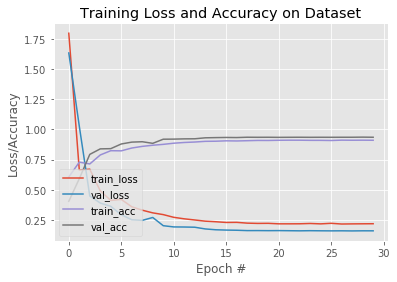

In [6]:
# make predictions on the test set
preds = model.predict(testX)
 
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),
	target_names=labelNames))
 
# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [7]:
print(confusion_matrix(testY.argmax(axis=1), preds.argmax(axis=1)))

[[1648    0    0    0    0    0    0]
 [   0 1689    7    0    0    0    0]
 [   0    9 1647    0    0    0    0]
 [   0    2    0 1359  104    0  197]
 [   1    2    0  306 1134    0   79]
 [   0    0    0    0    0 1674    0]
 [   0    0    0   28    5    0 1598]]
